# Inter-Track Group Project: Predicting Student's Academic Performance
*An Inter-Track Project by Group 4*

#### Introduction

Academic performance is the extent to which a student, teacher or institution has achieved their short or long-term educational goals. Cumulative GPA and completion of educational benchmarks such as secondary school diplomas and bachelor's degrees represent academic achievement -[Wikipedia](https://en.m.wikipedia.org/wiki/Academic_achievement).


Academic performance is the process of learning in an academic surroundings. Academic performance is seen to be the end result of the skills and intellectual abilities of a student in an academic surroundings. There is more to learning, it is more than Performance. Learning is defined as the expansion of a student’s knowledge and skills that result from instruction and experience in an academic environment. Performance also consist of a student’s ability to show that knowledge and skill in different settings and situations within and outside the classroom.
The Academic performance of students play an important role in the education system as well as the learning process. It is considered to be a major yardstick to judge one’s total potentialities and capacities Nuthana & Yenagi (2009), which are frequently measured by the examination results. It is used to pass judgment on the quality of education offered by academic institutions. 
Predicting students’ performance is mostly useful to help the educators and learners improving their learning and teaching process.


#### Data Description

The provided dataset was collected through the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success), the dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. 


#### Aims and Objectives

Student’s performance is an essential part in academic institutions. This is because one of the criteria for any academic institution is based on its excellent record of academic achievements.  The aim and objectives will be to create a platform *Prolego* to bridge some gaps

The solution *Prolego* provides is to contribute to the reduction of academic dropout and failure in educational institutes by predicting student's academic performance including drop off rate, academic success, to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place, in order to help academicals institutes not only to focus more on bright students but also to initially identify students with low academic achievement and find ways to support them.




In [1]:
# importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import missingno
import sklearn
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
warnings.filterwarnings('ignore')

In [2]:
# loading and reading the datasets
# Using Pandas read_csv function to load .csv files and perform operations on it.
df = pd.read_csv('data (1).csv', delimiter=';')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
# number of row in dataset
print("Student Perfomance Dataset Consists of {rows} rows".format(rows = len(df)))

Student Perfomance Dataset Consists of 4424 rows


In [4]:
# checking the number of rows and columns of dataset 
print("The Shape is: ", df.shape)

The Shape is:  (4424, 37)


#### What datatypes are in the datasets?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

In [5]:
# checking for the datatype of each feature of dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
# checking the complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### *The Target Feature is the only variable having a text (object) data type in the dataset, others are float and integers. As such, before we can actually train a machine learning model on this data set, we will need to convert the text columns into numerical columns by applying the encoding method.*

#### *Therefore, we will separate our numerical and categorical columns using the select_dtypes method in Pandas to see which is which.*

In [7]:
# checking for all numerical columns i.e for integers and float
df_numerical = df.select_dtypes(exclude='object')

df_numerical.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [8]:
# checking for all categorical columns
df_categorical = df.select_dtypes(include='object')

df_categorical.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [9]:
# displaying the names of all features of the dataset
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

#### Renaming Column

From the datasets, we can see that the names of the features are lenghty, hence need to be renamed for proper understanding and easy analysis.

In [10]:
# renaming column
df.columns = ['Marital_Status', 'Ap_Mode', 'Ap_Order', 'Course',
       'Attendance', 'Prev_Qua',
       'Prev_Qua_Grade', 'Nationality',
       'Mother_Qua', 'Father_Qua',
       'Mother_Occ', 'Father_Occ', 'Adm_Grade',
       'Displaced', 'Edu_Spec_Needs', 'Debtor',
       'Tui_Up_to_Date', 'Gender', 'S_Holder',
       'Age_at_Enroll', 'International',
       'Cur_U_1st_Sem_Credit',
       'Cur_U_1st_Sem_Enrol',
       'Cur_U_1st_Sem_Eva',
       'Cur_U_1st_Sem_Appr',
       'Cur_U_1st_Sem_Grade',
       'Cur_U_1st_Sem_no_Eva',
       'Cur_U_2nd_Sem_Credit',
       'Cur_U_2nd_Sem_Enrol',
       'Cur_U_2nd_Sem_Eva',
       'Cur_U_2nd_Sem_Approved',
       'Cur_U_2nd_Sem_Grade',
       'Cur_U_2nd_Sem_no_Eva', 'Unmp_R',
       'Inf_R', 'GDP', 'SAP']

In [11]:
# displaying the summary statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Ap_Mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Ap_Order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Prev_Qua,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Prev_Qua_Grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother_Qua,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father_Qua,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


#### What missing values are there?

Visualise missing values early is so important as it shows where the major holes in the dataset are. Knowing this information helps with EDA and also figuring out what kind of data cleaning and preprocessing is needed.

In [12]:
# checking for missing values
df.isnull().sum()

Marital_Status            0
Ap_Mode                   0
Ap_Order                  0
Course                    0
Attendance                0
Prev_Qua                  0
Prev_Qua_Grade            0
Nationality               0
Mother_Qua                0
Father_Qua                0
Mother_Occ                0
Father_Occ                0
Adm_Grade                 0
Displaced                 0
Edu_Spec_Needs            0
Debtor                    0
Tui_Up_to_Date            0
Gender                    0
S_Holder                  0
Age_at_Enroll             0
International             0
Cur_U_1st_Sem_Credit      0
Cur_U_1st_Sem_Enrol       0
Cur_U_1st_Sem_Eva         0
Cur_U_1st_Sem_Appr        0
Cur_U_1st_Sem_Grade       0
Cur_U_1st_Sem_no_Eva      0
Cur_U_2nd_Sem_Credit      0
Cur_U_2nd_Sem_Enrol       0
Cur_U_2nd_Sem_Eva         0
Cur_U_2nd_Sem_Approved    0
Cur_U_2nd_Sem_Grade       0
Cur_U_2nd_Sem_no_Eva      0
Unmp_R                    0
Inf_R                     0
GDP                 

<AxesSubplot:>

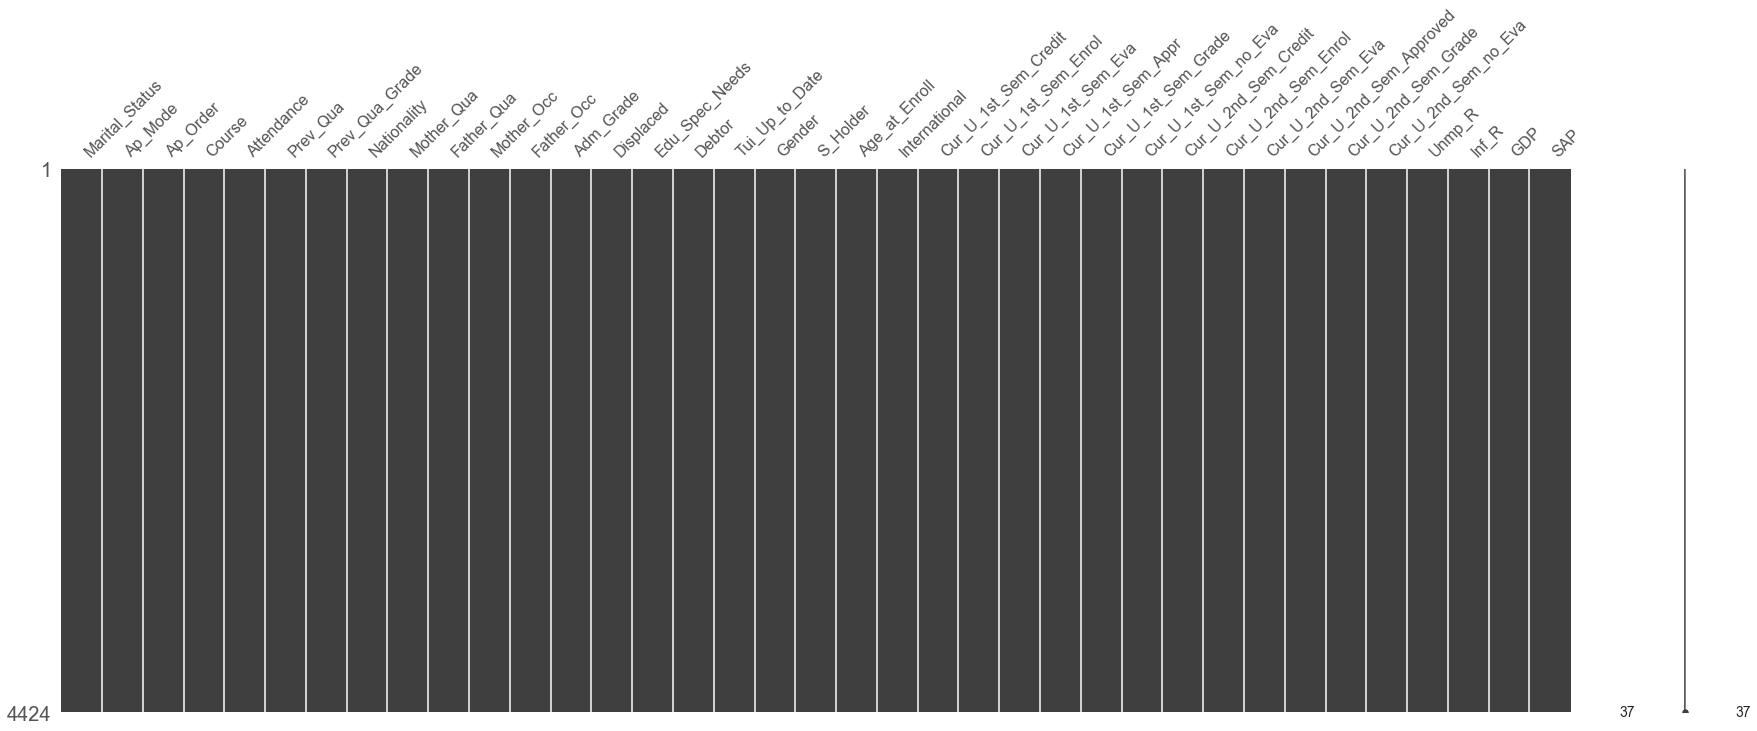

In [13]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

### Inference

There is no Missing data in the dataset.

In [14]:
# checking for duplicates in the dataset
df.duplicated().sum()

0

## *Univariate Analysis*

#### Target Feature: SAP = Student Academic Performance

Description: Whether the students Enrolled, Graduated or Dropout.

This is the variable we want our machine learning model to predict based off all the others.

In [15]:
# What kind of values are in Student Academic Performance?
df.SAP.value_counts() 

Graduate    2209
Dropout     1421
Enrolled     794
Name: SAP, dtype: int64

#### *Since we are only concerned about students who dropout and student who graduate, we do not need the Enrolled class hence it would be dropped.*

In [16]:
# we want to ommit the information from the SAP column that does not concern our analysis. 
df["SAP"] = df.SAP.apply(lambda x: 1 if x == "Dropout" else 0)

In [17]:
df.SAP.value_counts() 

0    3003
1    1421
Name: SAP, dtype: int64

where 0 represents students who are graduate, 1 represents students who dropout

Text(0.5, 1.0, 'Distribution of Student who are Graduates and Dropouts')

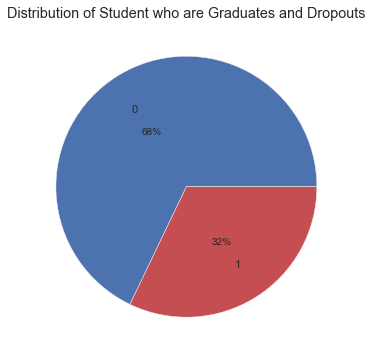

In [18]:
# How many Students Graduated or Dropout?
plt.figure(figsize=(6,6))
plt.pie(x=[3003, 1421], labels=['0','1'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Student who are Graduates and Dropouts')

### *Inference*

The distribution plot shows that students who are graduates are 68% and students who dropped out are 32%. Also the plot reveals tha the dataset is not unbalanced, so there would no need for any tecnique used to balance the dataset.

#### Feature: Marital_Status
Description: Marital Status of students.

In [19]:
# What kind of values are in Marital_Status?
df.Marital_Status.value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital_Status, dtype: int64

In [20]:
# what are the Marital Status categories?
df['Marital_Status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

*The Marital Status column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to unmarried and married. where 1 reps students who are unmarried and 2 reps students who are married.*

In [21]:
df['Marital_Status']=np.where(df['Marital_Status'] ==4, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==5, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==6, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==3, 2, df['Marital_Status'])

In [22]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

In [23]:
df.Marital_Status.value_counts()

1    3919
2     505
Name: Marital_Status, dtype: int64

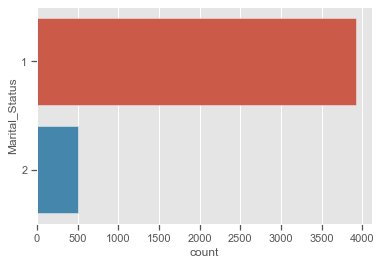

In [24]:
# What do the counts look like?
sns.countplot(y='Marital_Status', data=df);

### *Inference*

From the plot it is shown that Students with the unmarried class is more than Students who are married.

#### Feature: Ap_Mode = Application Mode
Description: the various means through which a candidate may be admitted into the degree programme. 

In [25]:
df.Ap_Mode.value_counts() 

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
57       1
27       1
Name: Ap_Mode, dtype: int64

*The Ap_Mode column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to popular and not popular. where 1 reps students with popular Ap_Mode and 2 reps students with unpolpular Ap_Mode*.

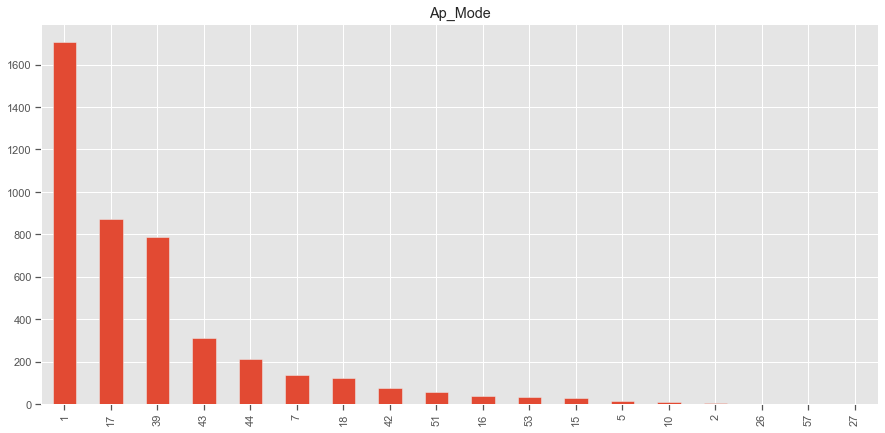

In [27]:
# ploting the bar chart for Ap_Mode
df['Ap_Mode'].value_counts().plot(kind = "bar", title = 'Ap_Mode', figsize=(15, 7))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Ap_Order = Application Order
Description: the various order through which a candidate may be admitted into the degree programme.

In [28]:
df.Ap_Order.value_counts() 

1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: Ap_Order, dtype: int64

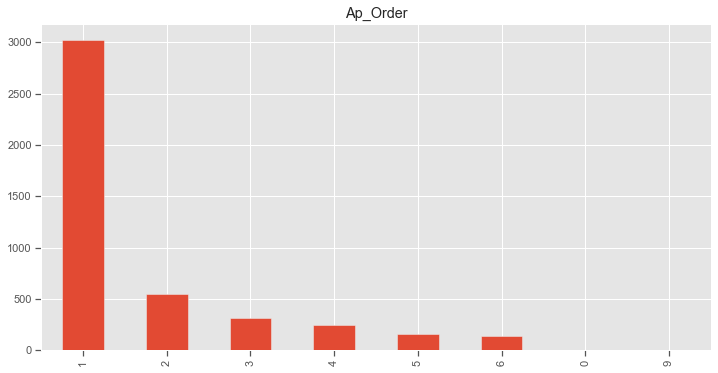

In [29]:
# ploting the bar chart for Ap_Order
df['Ap_Order'].value_counts().plot(kind = "bar", title = 'Ap_Order', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Course
Description: The program in which students are admitted to. For analysis sake, we assume that the course stands for the programme related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies, etc.

In [30]:
df.Course.value_counts() 

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

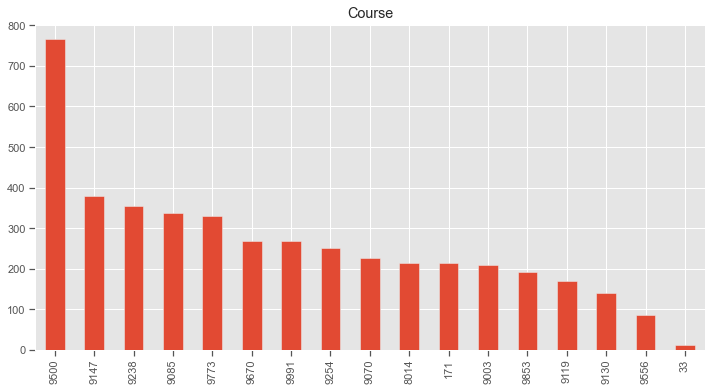

In [31]:
# ploting the bar chart for Course
df['Course'].value_counts().plot(kind = "bar", title = 'Course', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the bar chart, it is shown that the highest degree programme represented by 9500 has 766 students enrolled in it followed by the others. However, the course with the lowest number of of student is represented by 33, which have only 12 students enrolled in it.

#### Feature: Attendance = Day_evening_attendance
Description: Attendance taken for daytime students and evening students. For analysis sake, we assume that 1 represents the Day students and 0 represents the Evening students.

In [32]:
df.Attendance.value_counts() 

1    3941
0     483
Name: Attendance, dtype: int64

Text(0.5, 1.0, 'Distribution of Student for Daytime and Evening Attendance')

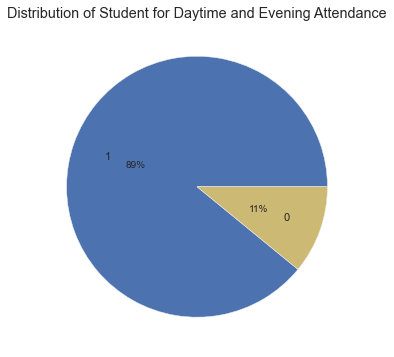

In [33]:
plt.figure(figsize=(6,6))
plt.pie(x=[3941, 483], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Student for Daytime and Evening Attendance')

### *Inference*

From the above pie plot, it is shown that students with Day attendance are more than those who attend in the evening. Where 89% of students are seen to be day attendance and 11% are Evening.

####  Feature: Prev_Qua = Previous_Qualification
Description: Previous Qualification of students.

In [34]:
df.Prev_Qua.value_counts() 

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: Prev_Qua, dtype: int64

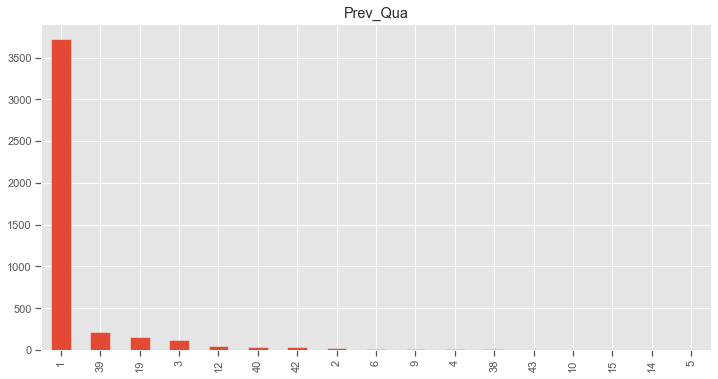

In [36]:
# ploting the bar chart for Prev_Qua
df['Prev_Qua'].value_counts().plot(kind = "bar", title = 'Prev_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from graph that 3717 are students who have the 1-class type of previous qualification and this is more compared to the rest.



##### Feature: Prev_Qua_Grade = Previous_Qualification_Grade
Description: Previous Qualification Grade of students.

In [37]:
df.Prev_Qua_Grade.value_counts() 

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
138.6      1
169.0      1
117.4      1
140.8      1
188.0      1
Name: Prev_Qua_Grade, Length: 101, dtype: int64

#### Feature: Nationality
Description: The country of students.

Where 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

In [38]:
df.Nationality.value_counts() 

1      4314
41       38
26       14
22       13
6        13
24        5
11        3
103       3
100       3
25        2
21        2
105       2
2         2
62        2
101       2
32        1
109       1
17        1
14        1
13        1
108       1
Name: Nationality, dtype: int64

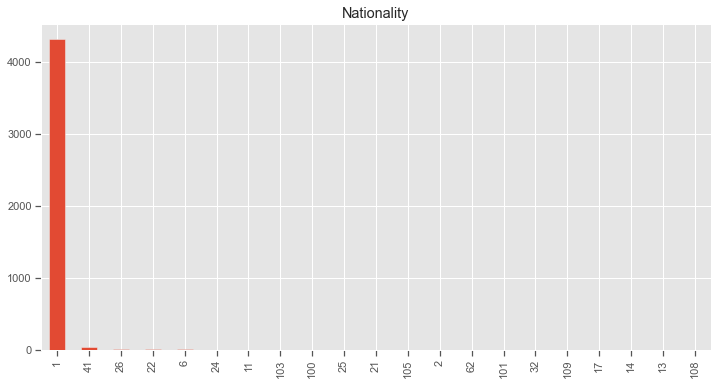

In [39]:
# ploting the bar chart for Nationality
df['Nationality'].value_counts().plot(kind = "bar", title = 'Nationality', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from the plot that students from 1 - Portuguese; are more than students from other nation.


#### Feature: Mother_Qua = Mother_Qualification
Description:  Mother's Qualification of students.

In [40]:
df.Mother_Qua.value_counts() 

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
39       8
9        8
41       6
42       4
43       4
6        4
30       3
10       3
29       3
11       3
35       3
36       3
14       2
22       1
26       1
18       1
44       1
27       1
Name: Mother_Qua, dtype: int64

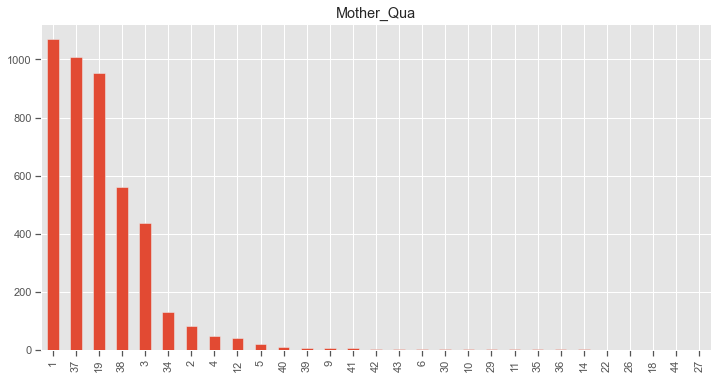

In [41]:
# ploting the bar chart for Mother_Qua
df['Mother_Qua'].value_counts().plot(kind = "bar", title = 'Mother_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Qua = Father_Qualification
Description:  Father's Qualification of students.

In [166]:
df.Father_Qua.value_counts() 

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
35       2
10       2
6        2
41       2
43       2
18       1
42       1
33       1
25       1
13       1
27       1
31       1
44       1
20       1
Name: Father_Qua, dtype: int64

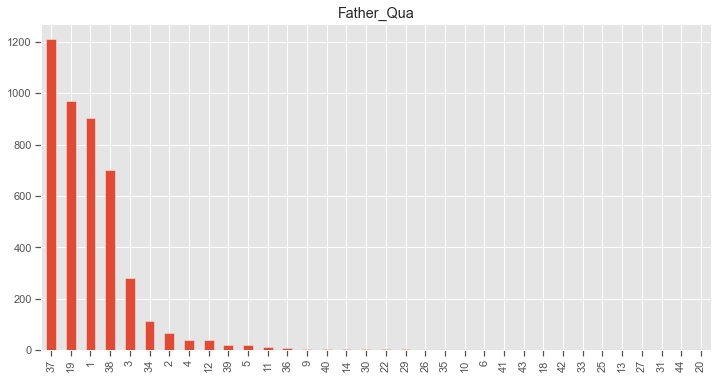

In [42]:
# ploting the bar chart for Father_Qua
df['Father_Qua'].value_counts().plot(kind = "bar", title = 'Father_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Mother_Occ =  Mother_Occupation
Description: The Mother's Occupation of students.

In [43]:
df.Mother_Occ.value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
10        4
193       4
134       4
132       3
143       3
151       3
122       2
152       2
153       2
125       1
173       1
131       1
171       1
Name: Mother_Occ, dtype: int64

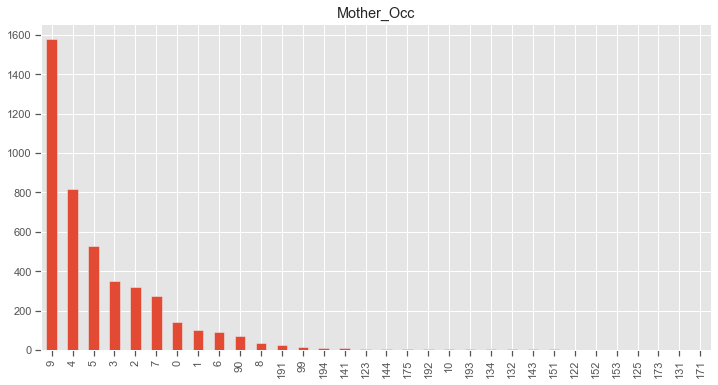

In [44]:
# ploting the bar chart for Mother_Occ
df['Mother_Occ'].value_counts().plot(kind = "bar", title = 'Mother_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Occ = Father_Occupation
Description: The Father's Occupation of students.

In [45]:
df.Father_Occ.value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
171       8
144       8
192       6
163       5
175       4
103       4
135       3
183       3
181       3
152       3
123       3
194       2
182       2
151       2
122       2
102       2
172       2
112       2
131       1
143       1
174       1
124       1
101       1
154       1
134       1
114       1
132       1
161       1
153       1
141       1
121       1
195       1
Name: Father_Occ, dtype: int64

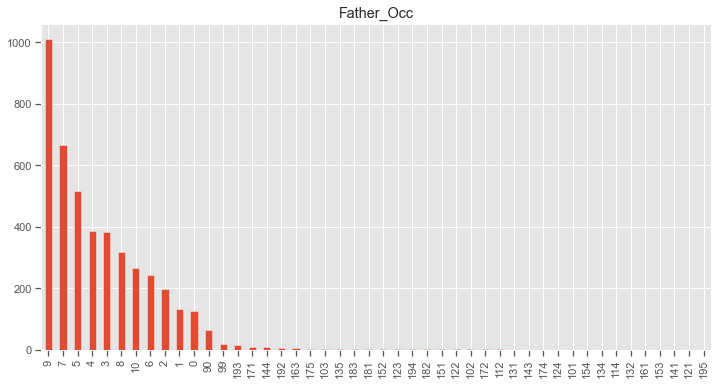

In [46]:
# ploting the bar chart for Father_Occ
df['Father_Occ'].value_counts().plot(kind = "bar", title = 'Father_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Adm_Grade = Admission_Grade
Description: The Admission_Grade of students.

In [47]:
df.Adm_Grade.value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
98.5       1
164.3      1
173.3      1
155.8      1
103.8      1
Name: Adm_Grade, Length: 620, dtype: int64

<AxesSubplot:xlabel='Adm_Grade', ylabel='Density'>

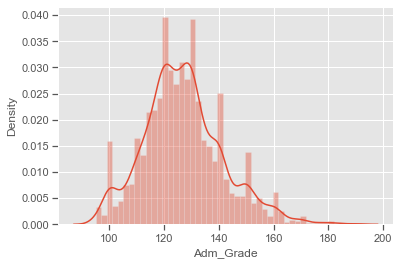

In [48]:
# ploting the distribution for Adm_Grade
sns.distplot(df.Adm_Grade)

#### Feature: Displaced
Description:  Students who are forced to flee their homes and consequently their schools for various reasons. For this analysis, we will assume 1 to represents students with the not-Displaced class and 0 to represents students with the Displaced class.

In [49]:
df.Displaced.value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

Text(0.5, 1.0, 'Distribution of Displaced Student')

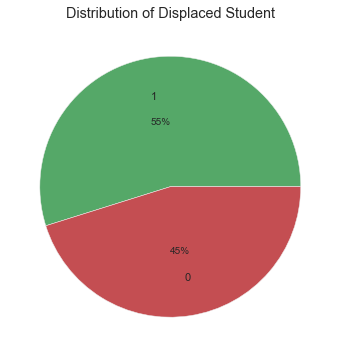

In [50]:
plt.figure(figsize=(6,6))
plt.pie(x=[2426, 1998], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Displaced Student')

### *Inference*

We can see from the plot that students who are not displaced is 56% and those who are is 45%


#### Feature: Edu_Spec_Needs = Educational_Special_Needs 
Description:  Students who have learning problems or disabilities. For this analysis, we will assume 0 to represents students with the special needs class and 1 to represents students with the non-special needs class.

In [51]:
df.Edu_Spec_Needs.value_counts()

0    4373
1      51
Name: Edu_Spec_Needs, dtype: int64

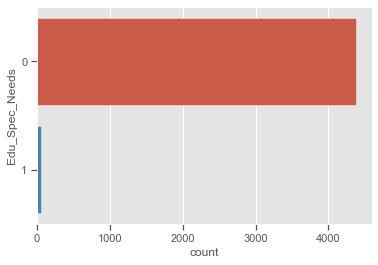

In [52]:
# What do the counts look like?
sns.countplot(y='Edu_Spec_Needs', data=df);

Text(0.5, 1.0, 'Distribution of Students with Special Needs')

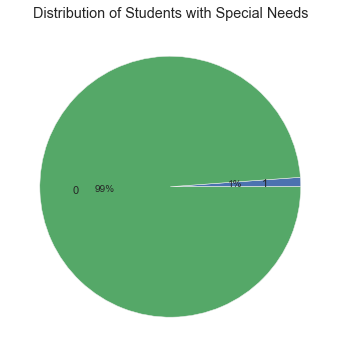

In [53]:
plt.figure(figsize=(6,6))
plt.pie(x=[51, 4373], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','g'])
plt.title('Distribution of Students with Special Needs')

### *Inference*

We can see from the plot that students who have special needs is 99% compared to those who do not have special needs


#### Feature: Debtor
Description:  Students who owes money. For easy analysis, we assume 0 to represents students who are not debtors and 1 to represents students who are debtors 

In [54]:
df.Debtor.value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

Text(0.5, 1.0, 'Distribution of Students in Debts')

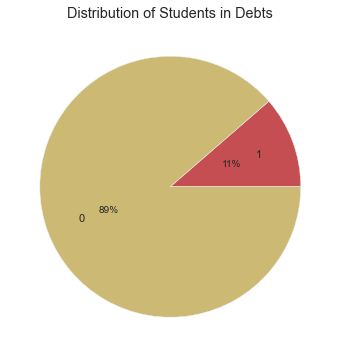

In [55]:
plt.figure(figsize=(6,6))
plt.pie(x=[503, 3921], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','y'])
plt.title('Distribution of Students in Debts')

 ### *Inference*

From the plot, it is shown that students who are not debtors is 89% which is more than those students who are debtors. 

#### Feature: Tui_Up_to_Date = Tuition_Fees_Up_to_Date 
Description:  Students who have their Tuition Fee up to date and those who do not have. For easy analysis, we assume that 0 represents students with Tuition fees not up to Date and 1 represents students with Tuition fees up to Date.

In [56]:
df.Tui_Up_to_Date.value_counts()

1    3896
0     528
Name: Tui_Up_to_Date, dtype: int64

Text(0.5, 1.0, 'Distribution of Students with Tuition Fees up to Date')

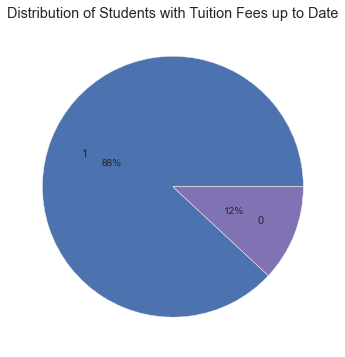

In [57]:
plt.figure(figsize=(6,6))
plt.pie(x=[3896, 528], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','m'])
plt.title('Distribution of Students with Tuition Fees up to Date')

### *Inference*

From the plot, it is shown that students with Tuition fees up to Date is more than students with Tuition fees not up to Date.



#### Feature: Gender 
Description:  The gender of Students, that is either Male or Female. For easy analysis we will assume that 0 represents female and 1 represents male.

In [58]:
df.Gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

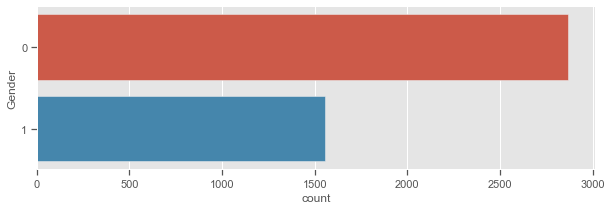

In [59]:
# Let's view the distribution of Gender
plt.figure(figsize=(10, 3))
sns.countplot(y="Gender", data=df);

### *Inference*

From the plot, it is shown that students who are female is more than students who are male.

####  Feature: S_Holder =  Scholarship_Holder 
Description: Student receiving financial aid to support their studies. For easy analysis, we will assume 0 represents non Scholarship Holder and 1 represents Scholarship Holder

In [60]:
df.S_Holder.value_counts()

0    3325
1    1099
Name: S_Holder, dtype: int64

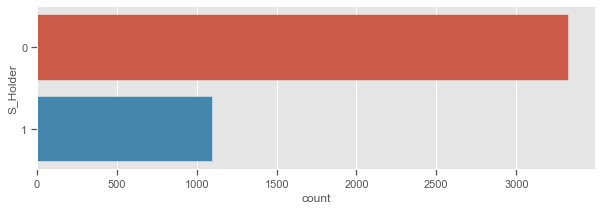

In [61]:
# Let's view the distribution of Scholarship_Holder?
plt.figure(figsize=(10, 3))
sns.countplot(y="S_Holder", data=df);

### *Inference*

From the plot, it is shown that students who are non Scholarship Holders are more than students who are Scholarship Holder.

#### Feature: Age_at_Enroll = Age_at_Enrollment 
Description:  The Age of Student at Enrollment.

In [62]:
df.Age_at_Enroll.value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
30      49
35      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
49      13
42      13
46      12
48      11
51       7
53       7
54       7
17       5
55       5
52       4
58       3
59       3
60       2
57       2
61       1
70       1
62       1
Name: Age_at_Enroll, dtype: int64

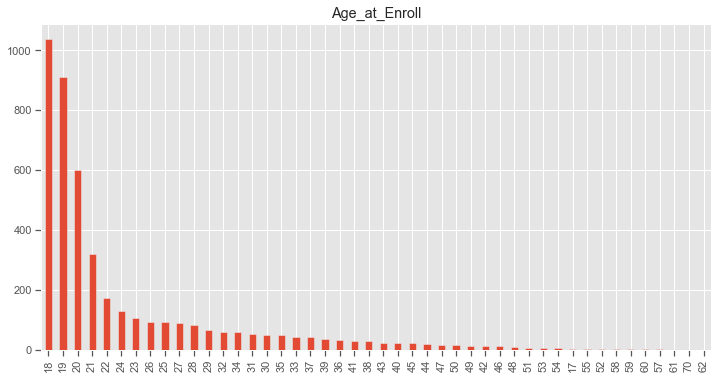

In [63]:
# ploting the bar chart for Age_at_Enroll
df['Age_at_Enroll'].value_counts().plot(kind = "bar", title = 'Age_at_Enroll', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the plot, it is shown that students who are age 18 are more followed age 19, and 20 compared to the rest. 

#### Feature: International  
Description: Students who come from other part of the world to study. For easy analysis, we assume that 0 represents  international student and 1 represents non-international students.

In [64]:
df.International.value_counts()

0    4314
1     110
Name: International, dtype: int64

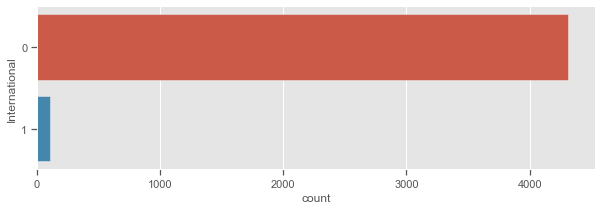

In [65]:
# Let's view the distribution of International Students?
plt.figure(figsize=(10, 3))
sns.countplot(y="International", data=df);

### *Inference*

From the plot, it is shown that international student is more the non-international students.

#### Feature: Cur_U_1st_Sem_Credit =  Curricular_Units_1st_Sem_Credited
Description: Curricular Credit units for Students in various course of study for the first semester

In [66]:
df.Cur_U_1st_Sem_Credit.value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
5       41
7       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
20       2
19       2
Name: Cur_U_1st_Sem_Credit, dtype: int64

#### Feature: Cur_U_1st_Sem_Enrol = Curricular_Units_1st_Sem_Enrolled
Description: Students enrolled in various units course of study for the first semester

In [67]:
df.Cur_U_1st_Sem_Enrol.value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Cur_U_1st_Sem_Enrol, dtype: int64

#### Feature: Cur_U_1st_Sem_Eva = Curricular_Units_1st_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the first semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the first semester.

In [68]:
df.Cur_U_1st_Sem_Eva.value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
24      6
3       6
26      4
25      3
27      2
29      2
45      2
33      1
36      1
32      1
28      1
31      1
Name: Cur_U_1st_Sem_Eva, dtype: int64

#### Feature: Cur_U_1st_Sem_Appr = Curricular_Units_1st_Sem_Approved
Description: The various unit courses approved for students taken in the first semester.

In [69]:
df.Cur_U_1st_Sem_Appr.value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Cur_U_1st_Sem_Appr, dtype: int64

#### Feature: Cur_U_1st_Sem_Grade = Curricular_Units_1st_Sem_Grade 
Description: The Grade in various unit courses for students taken in the first semester.

In [70]:
df.Cur_U_1st_Sem_Grade.value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
13.828571      1
13.271667      1
16.153846      1
15.675714      1
15.888889      1
Name: Cur_U_1st_Sem_Grade, Length: 805, dtype: int64

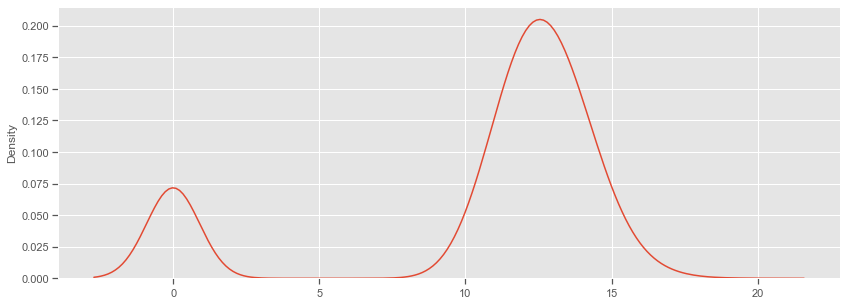

In [71]:
fig = plt.figure(figsize = (14,5))

sns.distplot(df[['Cur_U_1st_Sem_Grade']], hist = False)
plt.show()

#### Feature: Cur_U_1st_Sem_no_Eva = Curricular_Units_1st_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the first semester. 

In [72]:
df.Cur_U_1st_Sem_no_Eva.value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Cur_U_1st_Sem_no_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Credit = Curricular_Units_2nd_Sem_Credited 
Description: Curricular Credit units for Students in various course of study for the second semester

In [73]:
df.groupby('Cur_U_1st_Sem_Credit')['Cur_U_1st_Sem_Grade'].agg('count')

Cur_U_1st_Sem_Credit
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: Cur_U_1st_Sem_Grade, dtype: int64

In [74]:
df.Cur_U_2nd_Sem_Credit.value_counts()

0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
16       2
18       2
15       2
19       1
Name: Cur_U_2nd_Sem_Credit, dtype: int64

#### Feature: Cur_U_2nd_Sem_Enrol = Curricular_Units_2nd_Sem_Enrolled
Description: Students enrolled in various units course of study for the second semester

In [75]:
df.Cur_U_2nd_Sem_Enrol.value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
1        3
19       3
18       2
15       2
23       2
21       1
16       1
Name: Cur_U_2nd_Sem_Enrol, dtype: int64

#### Feature: Cur_U_2nd_Sem_Eva = Curricular_Units_2nd_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the second semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the second semester.

In [76]:
df.Cur_U_2nd_Sem_Eva.value_counts()

8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
22     10
4      10
21     10
20      8
2       4
23      4
24      3
1       3
26      3
27      2
3       2
25      1
28      1
33      1
Name: Cur_U_2nd_Sem_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Approved = Curricular_Units_2nd_Sem_Approved
Description: The various unit courses approved for students taken in the second semester.

In [77]:
df.Cur_U_2nd_Sem_Approved.value_counts()

6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
18      2
20      2
16      2
Name: Cur_U_2nd_Sem_Approved, dtype: int64

#### Feature: Cur_U_2nd_Sem_Grade =  Curricular_Units_2nd_Sem_Grade 
Description: The Grade in various unit courses for students taken in the second semester.

In [78]:
df.Cur_U_2nd_Sem_Grade.value_counts()

0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
12.330000      1
16.075000      1
13.183333      1
13.657143      1
11.550000      1
Name: Cur_U_2nd_Sem_Grade, Length: 786, dtype: int64

#### Feature: Cur_U_2nd_Sem_no_Eva = Curricular_Units_2nd_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the second semester. 

In [79]:
df.Cur_U_2nd_Sem_no_Eva.value_counts()

0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Cur_U_2nd_Sem_no_Eva, dtype: int64

#### Feature: Unmp_R = Unemployment_Rate
Description: It measures the share of workers in the labor force who do not currently have a job but are actively looking for work.

In [80]:
df.Unmp_R.value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unmp_R, dtype: int64

<AxesSubplot:xlabel='Unmp_R', ylabel='Density'>

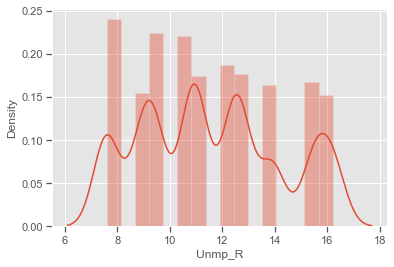

In [81]:
# ploting the distribution for Unmp_R
sns.distplot(df.Unmp_R)

#### Feature: Inf_R = Inflation_Rate
Description: The rate at which prices increase over time, resulting in a fall in the purchasing value of money.


In [82]:
df.Inf_R.value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inf_R, dtype: int64

<AxesSubplot:xlabel='Inf_R', ylabel='Density'>

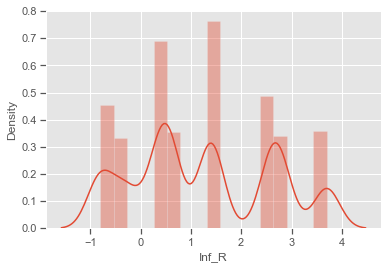

In [83]:
# ploting the distribution for Inf_R
sns.distplot(df.Inf_R)

#### Feature: GDP 
Description: The GDP measures the monetary value of goods and services produced within a country's borders in a given time period, usually a quarter or a year.

In [84]:
df.GDP.value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

<AxesSubplot:xlabel='GDP', ylabel='Density'>

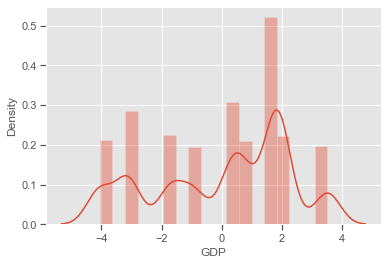

In [85]:
# ploting the distribution for GDP
sns.distplot(df.GDP)

### Bi-Variate Analysis

Text(0, 0.5, 'Frequency of Student Perfomance')

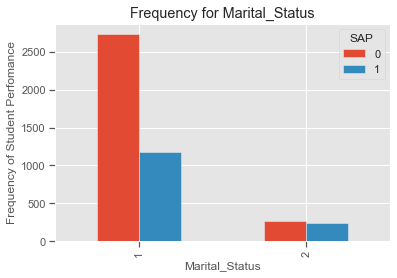

In [86]:
# Student performnce vs Marital Status
%matplotlib inline
pd.crosstab(df.Marital_Status,df.SAP).plot(kind='bar')
plt.title('Frequency for Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the single class will dropout and graduate more than those in the married class.

Text(0, 0.5, 'Proportion of Student Perfomance')

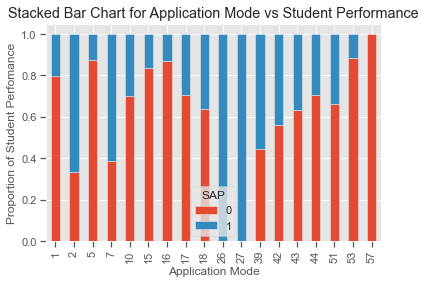

In [87]:
# Student performnce vs Ap_Mode
table=pd.crosstab(df.Ap_Mode,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Mode vs Student Performance')
plt.xlabel('Application Mode')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the 26-class and 27-class application mode will dropout than the rest. Also, those with the 57-class application mode are likely to graduate more than the rest. 

Text(0, 0.5, 'Proportion of Student Perfomance')

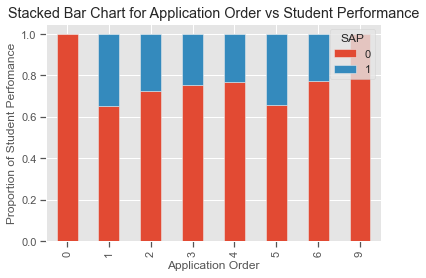

In [88]:
# Student performnce vs Ap_Order
table=pd.crosstab(df.Ap_Order,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Order vs Student Performance')
plt.xlabel('Application Order')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have the 0 and 9 Application Order would dropout. 

Text(0, 0.5, 'Proportion of Student Perfomance')

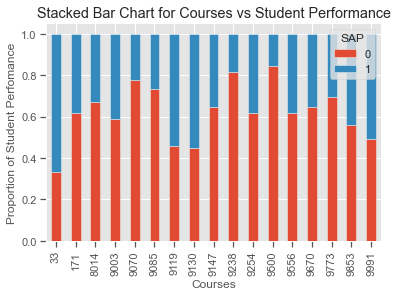

In [89]:
# Student performnce vs Course
table=pd.crosstab(df.Course,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Courses vs Student Performance')
plt.xlabel('Courses')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are enrolled into Course 33, 9119, and 9130 are likely to graduate more than the rest. However, students who are enrolled into Course 9600 and 9147 are likely to dropout than the rest.

Text(0, 0.5, 'Frequency of Student Perfomance')

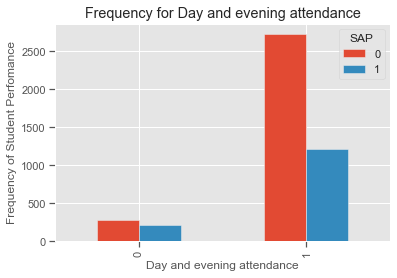

In [90]:
# Student performnce vs Attendance
%matplotlib inline
pd.crosstab(df.Attendance,df.SAP).plot(kind='bar')
plt.title('Frequency for Day and evening attendance')
plt.xlabel('Day and evening attendance')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are Day Attendance students are more than the evening attendance. Also, students who are Day Attendance students are more likely to dropout than graduate than those who are Evening Attendance students.


Text(0, 0.5, 'Proportion of Student Perfomance')

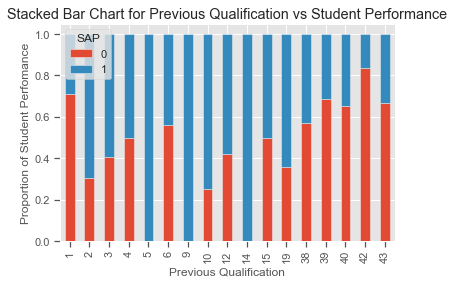

In [91]:
# Student performnce vs Prev_Qua
table=pd.crosstab(df.Prev_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Previous Qualification vs Student Performance')
plt.xlabel('Previous Qualification')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have the 40, 42 and 43 Previous Qualification are more likely to dropout than the rest. However, students who have the 5, 9 and 14 Previous Qualification are more likely to graduate than the rest.

Text(0, 0.5, 'Proportion of Student Perfomance')

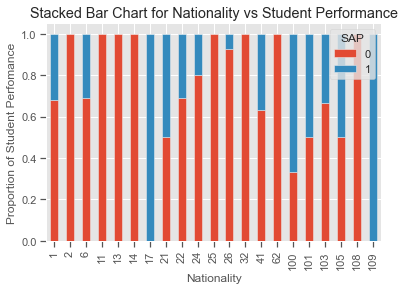

In [92]:
# Student performnce vs Nationality
table=pd.crosstab(df.Nationality,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Nationality vs Student Performance')
plt.xlabel('Nationality')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students with the 11, 13, 14, 25, 32 and 108 Nationality are more likely to dropout than the rest. However, students with the 17, and 109 Nationality are more likely to graduate than the rest.

Text(0, 0.5, 'Proportion of Student Perfomance')

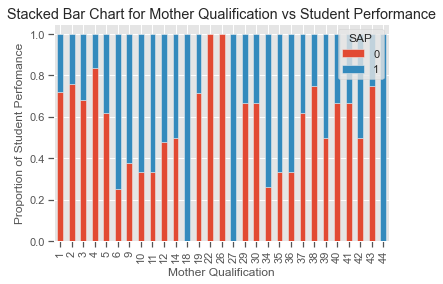

In [93]:
# Student performnce vs Mother_Qua
table=pd.crosstab(df.Mother_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Qualification vs Student Performance')
plt.xlabel('Mother Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

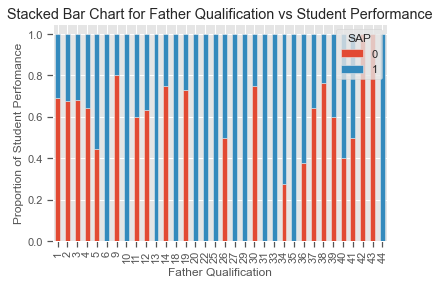

In [94]:
# Student performnce vs Father_Qua
table=pd.crosstab(df.Father_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Qualification vs Student Performance')
plt.xlabel('Father Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

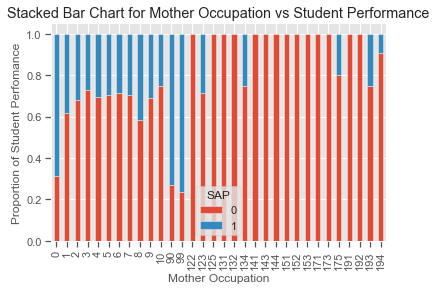

In [95]:
# Student performnce vs Mother_Occ
table=pd.crosstab(df.Mother_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Occupation vs Student Performance')
plt.xlabel('Mother Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

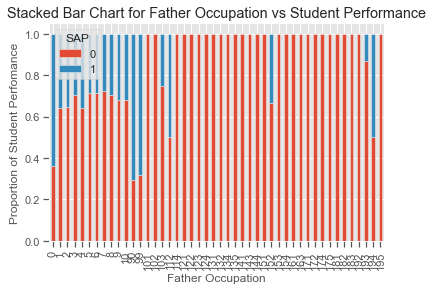

In [96]:
# Student performnce vs Father_Occ
table=pd.crosstab(df.Father_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Occupation vs Student Performance')
plt.xlabel('Father Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

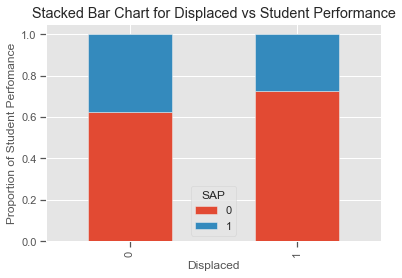

In [97]:
# Student performnce vs Displaced
table=pd.crosstab(df.Displaced,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Displaced vs Student Performance')
plt.xlabel('Displaced')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are Displaced are more likely to dropout than graduate than those who are not Displaced.

Text(0, 0.5, 'Proportion of Student Perfomance')

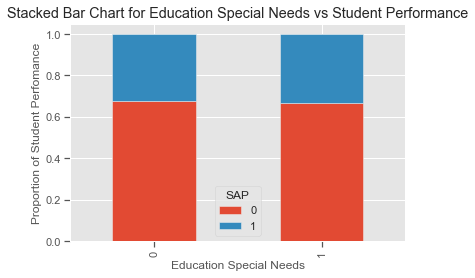

In [98]:
# Student performnce vs Edu_Spec_Needs
table=pd.crosstab(df.Edu_Spec_Needs,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Special Needs vs Student Performance')
plt.xlabel('Education Special Needs')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

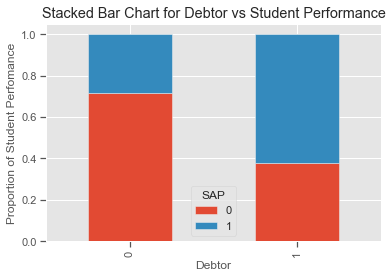

In [99]:
# Student performnce vs Debtor
table=pd.crosstab(df.Debtor,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Debtor vs Student Performance')
plt.xlabel('Debtor')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are debtors are more likely to dropout than graduate than those who are not.


Text(0, 0.5, 'Proportion of Student Perfomance')

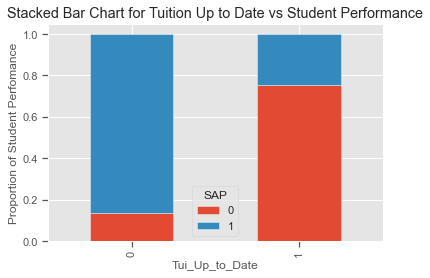

In [100]:
# Student performnce vs Tui_Up_to_Date
table=pd.crosstab(df.Tui_Up_to_Date,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Tuition Up to Date vs Student Performance')
plt.xlabel('Tui_Up_to_Date')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students whose Tuition is not Up to Date are more likely to dropout than graduate than those  whose Tuition is Up to Date.


Text(0, 0.5, 'Proportion of Student Perfomance')

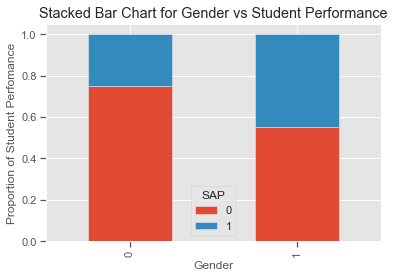

In [101]:
# Student performnce vs Gender
table=pd.crosstab(df.Gender,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Gender vs Student Performance')
plt.xlabel('Gender')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are male are more likely to dropout than graduate than those who are female.

Text(0, 0.5, 'Proportion of Student Perfomance')

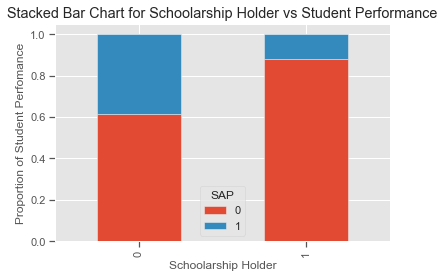

In [102]:
# Student performnce vs S_Holder
table=pd.crosstab(df.S_Holder,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Schoolarship Holder vs Student Performance')
plt.xlabel('Schoolarship Holder')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are non Schoolarship Holders are more likely to dropout than graduate than those who are Schoolarship Holders.

Text(0, 0.5, 'Proportion of Student Perfomance')

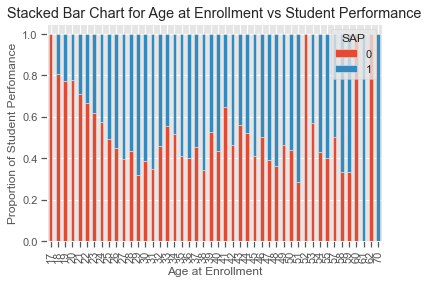

In [103]:
# Student performnce vs Age at Enrollment
table=pd.crosstab(df.Age_at_Enroll,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Age at Enrollment vs Student Performance')
plt.xlabel('Age at Enrollment')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

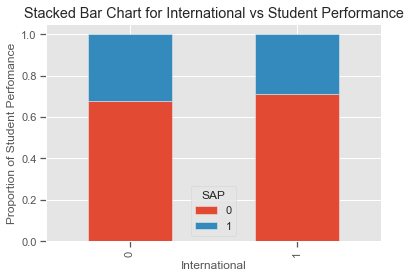

In [104]:
# Student performnce vs International
table=pd.crosstab(df.International,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for International vs Student Performance')
plt.xlabel('International')
plt.ylabel('Proportion of Student Perfomance')

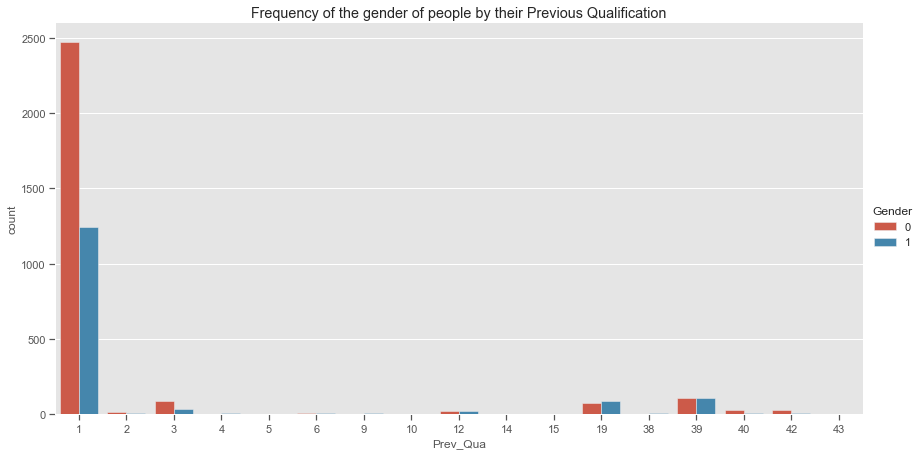

In [105]:
#Countplot showing the freqency of the gender of people by their Previous Qualification level
debtor_count = sns.catplot(x="Prev_Qua", hue = "Gender", kind="count", height=6, aspect=2, data = df)
plt.title("Frequency of the gender of people by their Previous Qualification")
plt.show()
debtor_count.savefig("debtor_count.png")

In [106]:
#The Gender level of those who are Dropout
df.groupby("SAP").get_group(0)["Gender"].value_counts()

0    2148
1     855
Name: Gender, dtype: int64

In [107]:
df.groupby('Cur_U_1st_Sem_Grade').count()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
9.800000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.000000,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
10.166667,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.200000,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.125000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.333333,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [108]:
df.groupby('Cur_U_1st_Sem_Grade').mean()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,1.153203,22.224234,1.582173,6976.500000,0.869081,4.743733,132.738162,1.871866,20.153203,21.923398,...,0.006964,4.252089,3.261838,0.108635,0.689674,0.254875,11.564763,1.302368,-0.212159,0.793872
9.800000,1.000000,7.000000,1.000000,9556.000000,1.000000,2.000000,130.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000,12.700000,3.700000,-1.700000,1.000000
10.000000,1.170732,22.878049,1.500000,9209.304878,0.817073,2.146341,128.231707,1.536585,23.414634,25.853659,...,0.012195,5.365854,9.024390,1.341463,7.560017,0.146341,10.904878,1.530488,-0.573659,0.719512
10.166667,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,122.000000,1.000000,1.000000,3.000000,...,0.000000,6.000000,10.000000,6.000000,10.500000,0.000000,12.700000,3.700000,-1.700000,0.000000
10.200000,1.250000,15.000000,1.750000,9271.750000,0.875000,3.250000,128.637500,1.000000,26.250000,21.375000,...,0.000000,5.250000,8.000000,4.000000,11.456250,0.000000,12.250000,1.137500,0.002500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1.000000,7.000000,1.000000,9003.000000,1.000000,3.000000,130.000000,1.000000,3.000000,3.000000,...,2.000000,6.000000,9.000000,6.000000,15.571429,0.000000,13.900000,-0.300000,0.790000,0.000000
17.125000,1.000000,18.000000,1.000000,9500.000000,1.000000,1.000000,178.000000,1.000000,19.000000,1.000000,...,0.000000,8.000000,8.000000,8.000000,17.587500,0.000000,13.900000,-0.300000,0.790000,0.000000
17.333333,1.000000,22.000000,1.000000,9119.000000,1.000000,1.000000,154.000000,1.000000,28.000000,28.500000,...,0.000000,5.000000,9.500000,3.000000,17.785714,0.000000,13.150000,0.100000,1.290000,0.500000


In [109]:
df.groupby('Cur_U_1st_Sem_Grade', as_index=False).agg({"Cur_U_2nd_Sem_Grade": "sum"})

,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Grade
0,0.000000,495.185714
1,9.800000,0.000000
2,10.000000,619.921429
3,10.166667,10.500000
4,10.200000,91.650000
...,...,...
800,17.111111,15.571429
801,17.125000,17.587500
802,17.333333,35.571429
803,18.000000,26.333333


In [110]:
df.groupby('Ap_Mode')['Course'].sum()

Ap_Mode
1     14760392
2        28147
5       140536
7      1256548
10       94083
15      261775
16      298149
17     7850433
18     1134858
26        9147
27        9070
39     7131778
42      709228
43     2785999
44     1871488
51      518423
53      311742
57        9991
Name: Course, dtype: int64

In [111]:
df.groupby('Age_at_Enroll')['Adm_Grade'].sum()

Age_at_Enroll
17       682.1
18    134988.7
19    114834.6
20     74892.4
21     40298.8
22     22078.7
23     13776.6
24     16457.4
25     11684.9
26     11870.6
27     11698.7
28     10467.8
29      8259.0
30      6203.3
31      7005.1
32      7526.8
33      5670.0
34      7598.1
35      6138.4
36      4402.8
37      5186.3
38      3578.2
39      4715.4
40      2901.7
41      3833.0
42      1554.4
43      3399.9
44      2734.3
45      2904.5
46      1443.0
47      2497.0
48      1300.2
49      1676.1
50      1998.1
51       954.0
52       491.8
53       917.0
54       877.2
55       608.4
57       274.0
58       375.5
59       401.9
60       240.0
61       135.1
62       103.0
70       116.4
Name: Adm_Grade, dtype: float64

### *Inference*

The average age of students who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

#### Feature selection
Feature selection is choosing the best set of features for predictions


<AxesSubplot:>

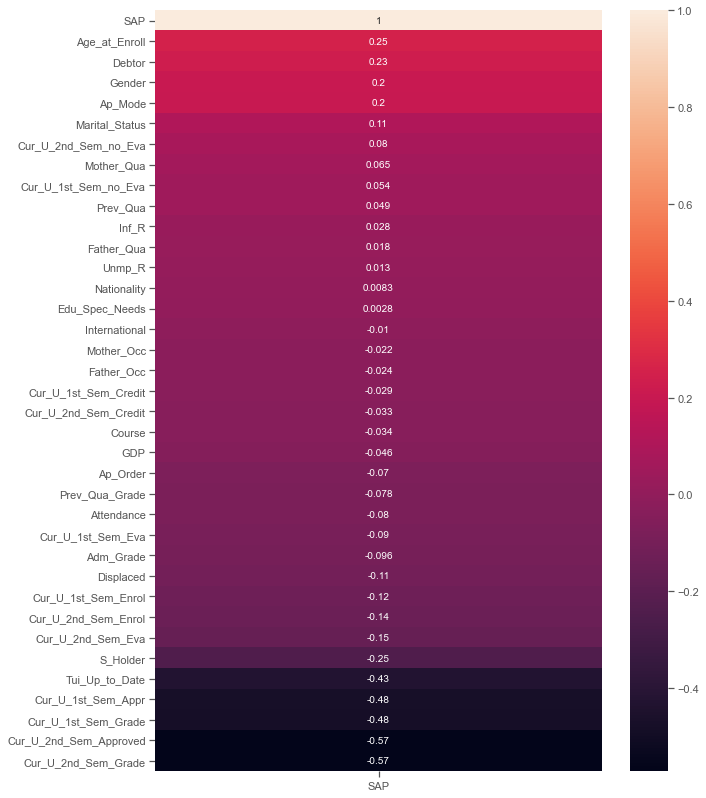

In [112]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
df_corr = df.corr()[['SAP']].sort_values(
    by='SAP', ascending=False)
sns.heatmap(df_corr, annot=True, ax=ax)

[0.01099323 0.05718522 0.03800383 0.07341837 0.01105186 0.02475148
 0.08089402 0.00782977 0.05908514 0.05728845 0.06839919 0.07243463
 0.0845046  0.02239656 0.00442886 0.02992358 0.136982   0.03105168
 0.03889373 0.09048381]


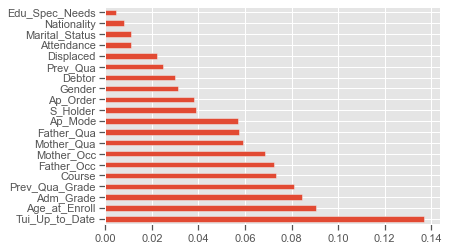

In [113]:
# Performing Feature Importance on each variable
# Feature importance gives a score for each feature in dataset, the higher the score the relevant is the feature.

data = df
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e Student Performance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [114]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = df.corr()

In [115]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [116]:
# checking the total length of correlated columns in our dataset
len(correlated_features)

9

In [117]:
# printing the names of the correlated features
print(correlated_features)

{'Cur_U_1st_Sem_Appr', 'Cur_U_2nd_Sem_Eva', 'Cur_U_1st_Sem_Enrol', 'Father_Occ', 'Cur_U_2nd_Sem_Enrol', 'Cur_U_2nd_Sem_Grade', 'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Approved', 'International'}


### *Model*

The modelling phase consists of applying different machine learning techniques to the dataset. The goal of the prediction is to create a model based on the students’ current activities and accomplishments that attempts to predict learner failure and future performance. It is a typical classification problem, which a multi classification model can solve in order to predict whether a student can complete the programe or not, that is, whether a student will graduate or not.

We will choose a model that is relevant to the task at hand. Since it is a classification problem, the model selected will be one suited for the categorical data.

In [118]:
# Selecting the features to be used for modelling
new_feature=['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Nationality', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Appr', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Approved', 'Cur_U_2nd_Sem_Grade','SAP'] 

In [119]:
# Importing Machine learning Library

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from time import sleep
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Split into input and output features
y = df["SAP"]
X = df[['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Nationality', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Appr', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Approved', 'Cur_U_2nd_Sem_Grade']]
X.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
0,1,171,1,1,122.0,1,19,12,127.3,1,1,0,20,0,0,0.000000,0,0,0.000000
1,1,9254,1,1,160.0,1,1,3,142.5,0,1,0,19,0,6,14.000000,0,6,13.666667
2,1,9070,1,1,122.0,1,37,37,124.8,0,1,0,19,0,0,0.000000,0,0,0.000000
3,1,9773,1,1,122.0,1,38,37,119.6,1,0,0,20,0,6,13.428571,0,5,12.400000
4,2,8014,0,1,100.0,1,37,38,141.5,1,0,0,45,0,5,12.333333,0,6,13.000000


In [121]:
# Splitting the data into train and test. 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((3539, 19), (885, 19))

In [122]:
X_train

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
3383,2,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0,0.000000,0,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,3,11.666667,0,2,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,6,14.166667,0,6,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0,0.000000,0,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,6,13.900000,0,6,13.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,9070,1,1,134.0,1,1,19,127.7,0,0,0,18,1,6,11.714286,0,4,11.333333
466,1,9853,1,1,133.0,1,1,38,131.3,1,0,0,20,0,5,14.333333,4,8,12.625000
3092,1,8014,0,1,100.0,1,38,19,112.8,1,0,1,23,0,6,14.166667,0,6,12.500000
3772,1,9238,1,1,127.0,1,1,38,120.4,1,0,1,19,0,6,13.500000,0,6,13.428571


In [123]:
X_test

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
1255,2,9130,1,1,133.1,1,3,1,110.0,1,0,1,30,0,0,0.000000,0,1,10.000000
3458,1,9238,1,1,125.0,1,4,3,119.8,1,0,0,18,0,5,11.571429,0,6,12.142857
3390,1,9853,1,1,133.0,1,38,38,127.4,1,0,1,18,0,7,12.714286,0,7,12.285714
1497,1,9670,1,1,110.0,1,1,1,115.3,1,1,0,19,0,6,13.857143,0,5,13.000000
1536,1,9500,1,1,130.0,1,37,19,106.2,1,0,0,27,0,0,0.000000,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,1,9500,1,1,136.0,1,19,38,123.0,1,0,0,19,0,7,14.328571,0,7,14.328571
3281,2,8014,0,3,130.0,1,35,35,140.0,0,0,0,59,10,12,13.333333,8,8,12.875000
436,1,9254,1,1,122.0,1,19,19,118.2,1,0,1,20,0,4,11.250000,0,6,10.500000
1434,1,9500,1,1,130.0,1,1,38,125.1,1,0,1,18,0,6,12.816667,0,6,12.875000


In [124]:
y_train

3383    1
2840    0
564     0
1786    1
3900    0
       ..
3444    1
466     0
3092    0
3772    0
860     1
Name: SAP, Length: 3539, dtype: int64

In [125]:
y_test

1255    1
3458    0
3390    0
1497    0
1536    1
       ..
3162    0
3281    1
436     0
1434    0
1361    0
Name: SAP, Length: 885, dtype: int64

## Implementing The Classification Models

We will build Six models and compare their accuracy scores.

In [126]:
# defining a function to fit our machine learning algorithms. 
# This will prevent writing of codes, we will functionise fitting the model and returning the accuracy scores.

# the Function that runs through the selected algorithm and returns the accuracy score
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # performing Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy score
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

###  1. Gaussian Naive Bayes

In [127]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 83.58
Accuracy CV 10-Fold: 83.39
Running Time: 0:00:12.909668


### *Inference*

The Accuracy Score gives 83.58 which means that the model has performed 84%

### 2. Linear SVC

In [128]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 70.75
Accuracy CV 10-Fold: 68.41
Running Time: 0:00:03.943998


### *Inference*

The Accuracy Score gives 70.75 which means that the model has performed 71%

### 3. Decision Tree Classifier

In [129]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 81.24
Running Time: 0:00:00.494011


### *Inference*


The Accuracy Score gives 100 which means that the model has performed really well. That is, it performed 100%

### 4. Logistic Regression

In [130]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.75
Accuracy CV 10-Fold: 83.58
Running Time: 0:00:00.923652


### *Inference*


The Accuracy Score gives 83.75 which means that the model has performed 84%

### 5. k-Nearest Neighbours

In [131]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.95
Accuracy CV 10-Fold: 78.04
Running Time: 0:00:01.601936


### *Inference*

The Accuracy Score gives 84.95 which means that the model has performed 84%

In [132]:
# View the data for the CatBoost model
X_train.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
3383,2,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0,0.000000,0,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,3,11.666667,0,2,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,6,14.166667,0,6,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0,0.000000,0,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,6,13.900000,0,6,13.900000


In [133]:
# View the labels for the CatBoost model
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [134]:
# Using the CatBoost Pool() function to pool together the training data and feature labels
train_pool = Pool(X_train, 
                  y_train)

In [135]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.017673
0:	learn: 0.6797571	total: 255ms	remaining: 4m 14s
1:	learn: 0.6667263	total: 265ms	remaining: 2m 12s
2:	learn: 0.6530804	total: 275ms	remaining: 1m 31s
3:	learn: 0.6403299	total: 285ms	remaining: 1m 10s
4:	learn: 0.6276127	total: 294ms	remaining: 58.5s
5:	learn: 0.6152641	total: 302ms	remaining: 50.1s
6:	learn: 0.6034503	total: 312ms	remaining: 44.2s
7:	learn: 0.5938627	total: 322ms	remaining: 39.9s
8:	learn: 0.5829904	total: 332ms	remaining: 36.5s
9:	learn: 0.5725741	total: 342ms	remaining: 33.8s
10:	learn: 0.5628395	total: 354ms	remaining: 31.9s
11:	learn: 0.5532947	total: 366ms	remaining: 30.2s
12:	learn: 0.5442272	total: 374ms	remaining: 28.4s
13:	learn: 0.5360118	total: 381ms	remaining: 26.9s
14:	learn: 0.5278278	total: 389ms	remaining: 25.6s
15:	learn: 0.5201267	total: 398ms	remaining: 24.5s
16:	learn: 0.5119255	total: 407ms	remaining: 23.5s
17:	learn: 0.5055303	total: 415ms	remaining: 22.6s
18:	learn: 0.4984094	total: 423ms	remaining: 21.9s
19:	lea

160:	learn: 0.2931848	total: 1.93s	remaining: 10s
161:	learn: 0.2929930	total: 1.94s	remaining: 10s
162:	learn: 0.2926722	total: 1.96s	remaining: 10s
163:	learn: 0.2924592	total: 1.97s	remaining: 10.1s
164:	learn: 0.2921785	total: 1.98s	remaining: 10s
165:	learn: 0.2917390	total: 2s	remaining: 10.1s
166:	learn: 0.2916210	total: 2.02s	remaining: 10.1s
167:	learn: 0.2914123	total: 2.03s	remaining: 10.1s
168:	learn: 0.2911901	total: 2.04s	remaining: 10.1s
169:	learn: 0.2908311	total: 2.05s	remaining: 10s
170:	learn: 0.2906590	total: 2.06s	remaining: 9.99s
171:	learn: 0.2904320	total: 2.07s	remaining: 9.96s
172:	learn: 0.2901170	total: 2.08s	remaining: 9.95s
173:	learn: 0.2898408	total: 2.09s	remaining: 9.92s
174:	learn: 0.2894708	total: 2.1s	remaining: 9.9s
175:	learn: 0.2893173	total: 2.11s	remaining: 9.87s
176:	learn: 0.2890236	total: 2.12s	remaining: 9.85s
177:	learn: 0.2886371	total: 2.14s	remaining: 9.87s
178:	learn: 0.2883633	total: 2.18s	remaining: 9.98s
179:	learn: 0.2881615	total

319:	learn: 0.2641551	total: 3.42s	remaining: 7.27s
320:	learn: 0.2638730	total: 3.43s	remaining: 7.26s
321:	learn: 0.2636837	total: 3.44s	remaining: 7.24s
322:	learn: 0.2635938	total: 3.45s	remaining: 7.23s
323:	learn: 0.2634510	total: 3.46s	remaining: 7.21s
324:	learn: 0.2634149	total: 3.47s	remaining: 7.2s
325:	learn: 0.2632018	total: 3.47s	remaining: 7.18s
326:	learn: 0.2630409	total: 3.49s	remaining: 7.19s
327:	learn: 0.2629020	total: 3.5s	remaining: 7.17s
328:	learn: 0.2627289	total: 3.51s	remaining: 7.16s
329:	learn: 0.2624957	total: 3.52s	remaining: 7.14s
330:	learn: 0.2624068	total: 3.53s	remaining: 7.13s
331:	learn: 0.2622300	total: 3.54s	remaining: 7.11s
332:	learn: 0.2620110	total: 3.54s	remaining: 7.1s
333:	learn: 0.2620058	total: 3.55s	remaining: 7.07s
334:	learn: 0.2619194	total: 3.56s	remaining: 7.06s
335:	learn: 0.2618089	total: 3.56s	remaining: 7.04s
336:	learn: 0.2616444	total: 3.57s	remaining: 7.03s
337:	learn: 0.2614317	total: 3.58s	remaining: 7.01s
338:	learn: 0.2

486:	learn: 0.2422225	total: 4.88s	remaining: 5.14s
487:	learn: 0.2420099	total: 4.91s	remaining: 5.15s
488:	learn: 0.2418758	total: 4.93s	remaining: 5.15s
489:	learn: 0.2417843	total: 4.94s	remaining: 5.14s
490:	learn: 0.2416655	total: 4.95s	remaining: 5.13s
491:	learn: 0.2414977	total: 4.97s	remaining: 5.13s
492:	learn: 0.2413301	total: 4.99s	remaining: 5.13s
493:	learn: 0.2413010	total: 5s	remaining: 5.12s
494:	learn: 0.2411054	total: 5.01s	remaining: 5.11s
495:	learn: 0.2410807	total: 5.02s	remaining: 5.1s
496:	learn: 0.2409019	total: 5.04s	remaining: 5.09s
497:	learn: 0.2407418	total: 5.04s	remaining: 5.08s
498:	learn: 0.2405150	total: 5.06s	remaining: 5.08s
499:	learn: 0.2404698	total: 5.07s	remaining: 5.07s
500:	learn: 0.2404179	total: 5.08s	remaining: 5.07s
501:	learn: 0.2403516	total: 5.1s	remaining: 5.06s
502:	learn: 0.2403156	total: 5.12s	remaining: 5.05s
503:	learn: 0.2402719	total: 5.13s	remaining: 5.04s
504:	learn: 0.2401694	total: 5.16s	remaining: 5.06s
505:	learn: 0.240

645:	learn: 0.2231996	total: 6.68s	remaining: 3.66s
646:	learn: 0.2230911	total: 6.68s	remaining: 3.65s
647:	learn: 0.2229885	total: 6.69s	remaining: 3.64s
648:	learn: 0.2228678	total: 6.7s	remaining: 3.63s
649:	learn: 0.2227624	total: 6.71s	remaining: 3.62s
650:	learn: 0.2227379	total: 6.72s	remaining: 3.6s
651:	learn: 0.2227270	total: 6.73s	remaining: 3.59s
652:	learn: 0.2226427	total: 6.74s	remaining: 3.58s
653:	learn: 0.2224854	total: 6.75s	remaining: 3.57s
654:	learn: 0.2223105	total: 6.76s	remaining: 3.56s
655:	learn: 0.2220916	total: 6.77s	remaining: 3.55s
656:	learn: 0.2220644	total: 6.78s	remaining: 3.54s
657:	learn: 0.2219277	total: 6.79s	remaining: 3.53s
658:	learn: 0.2217009	total: 6.79s	remaining: 3.52s
659:	learn: 0.2215587	total: 6.8s	remaining: 3.5s
660:	learn: 0.2214538	total: 6.82s	remaining: 3.5s
661:	learn: 0.2213245	total: 6.83s	remaining: 3.48s
662:	learn: 0.2212102	total: 6.83s	remaining: 3.47s
663:	learn: 0.2210367	total: 6.84s	remaining: 3.46s
664:	learn: 0.220

814:	learn: 0.2022672	total: 8.96s	remaining: 2.03s
815:	learn: 0.2021436	total: 8.97s	remaining: 2.02s
816:	learn: 0.2020494	total: 8.97s	remaining: 2.01s
817:	learn: 0.2019901	total: 8.98s	remaining: 2s
818:	learn: 0.2017602	total: 8.99s	remaining: 1.99s
819:	learn: 0.2016385	total: 9s	remaining: 1.98s
820:	learn: 0.2014986	total: 9.01s	remaining: 1.97s
821:	learn: 0.2013477	total: 9.02s	remaining: 1.95s
822:	learn: 0.2012380	total: 9.03s	remaining: 1.94s
823:	learn: 0.2012020	total: 9.04s	remaining: 1.93s
824:	learn: 0.2010689	total: 9.04s	remaining: 1.92s
825:	learn: 0.2010123	total: 9.05s	remaining: 1.91s
826:	learn: 0.2009433	total: 9.06s	remaining: 1.9s
827:	learn: 0.2008135	total: 9.07s	remaining: 1.88s
828:	learn: 0.2007126	total: 9.07s	remaining: 1.87s
829:	learn: 0.2005356	total: 9.08s	remaining: 1.86s
830:	learn: 0.2004408	total: 9.09s	remaining: 1.85s
831:	learn: 0.2003121	total: 9.1s	remaining: 1.84s
832:	learn: 0.2001620	total: 9.1s	remaining: 1.82s
833:	learn: 0.1999996

974:	learn: 0.1864466	total: 10.7s	remaining: 273ms
975:	learn: 0.1863200	total: 10.7s	remaining: 262ms
976:	learn: 0.1862245	total: 10.7s	remaining: 251ms
977:	learn: 0.1861091	total: 10.7s	remaining: 240ms
978:	learn: 0.1859825	total: 10.7s	remaining: 229ms
979:	learn: 0.1859090	total: 10.7s	remaining: 218ms
980:	learn: 0.1858944	total: 10.7s	remaining: 207ms
981:	learn: 0.1858833	total: 10.7s	remaining: 196ms
982:	learn: 0.1858702	total: 10.7s	remaining: 185ms
983:	learn: 0.1858569	total: 10.7s	remaining: 174ms
984:	learn: 0.1857289	total: 10.7s	remaining: 164ms
985:	learn: 0.1856672	total: 10.7s	remaining: 153ms
986:	learn: 0.1855271	total: 10.8s	remaining: 142ms
987:	learn: 0.1853822	total: 10.8s	remaining: 131ms
988:	learn: 0.1853575	total: 10.8s	remaining: 120ms
989:	learn: 0.1853321	total: 10.8s	remaining: 109ms
990:	learn: 0.1852172	total: 10.8s	remaining: 97.9ms
991:	learn: 0.1851831	total: 10.8s	remaining: 87ms
992:	learn: 0.1850756	total: 10.8s	remaining: 76.1ms
993:	learn:

In [136]:
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [137]:
 # Time taken?
start_time = time.time()

# params for cross-validation set same as the initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# Time taken?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6711694	test: 0.6706199	best: 0.6706199 (0)	total: 6.16ms	remaining: 6.16s
1:	learn: 0.6497080	test: 0.6497117	best: 0.6497117 (1)	total: 23.7ms	remaining: 11.8s
2:	learn: 0.6283441	test: 0.6267931	best: 0.6267931 (2)	total: 31.2ms	remaining: 10.4s
3:	learn: 0.6069028	test: 0.6065514	best: 0.6065514 (3)	total: 38.8ms	remaining: 9.67s
4:	learn: 0.5888444	test: 0.5887044	best: 0.5887044 (4)	total: 45.5ms	remaining: 9.06s
5:	learn: 0.5695974	test: 0.5696220	best: 0.5696220 (5)	total: 52.2ms	remaining: 8.65s
6:	learn: 0.5529617	test: 0.5532022	best: 0.5532022 (6)	total: 59.8ms	remaining: 8.48s
7:	learn: 0.5398699	test: 0.5399740	best: 0.5399740 (7)	total: 67.3ms	remaining: 8.34s
8:	learn: 0.5285178	test: 0.5288770	best: 0.5288770 (8)	total: 74.9ms	remaining: 8.25s
9:	learn: 0.5167210	test: 0.5167581	best: 0.5167581 (9)	total: 81.1ms	remaining: 8.03s
10:	learn: 0.5064957	test: 0.5067788	best: 0.5067788 (10)	total: 87.8ms	remaining: 7.9s
11:	learn: 0.49495

111:	learn: 0.2856962	test: 0.3080424	best: 0.3080370 (109)	total: 751ms	remaining: 5.96s
112:	learn: 0.2851764	test: 0.3077143	best: 0.3077143 (112)	total: 760ms	remaining: 5.96s
113:	learn: 0.2846489	test: 0.3078126	best: 0.3077143 (112)	total: 767ms	remaining: 5.96s
114:	learn: 0.2843556	test: 0.3077431	best: 0.3077143 (112)	total: 774ms	remaining: 5.96s
115:	learn: 0.2841260	test: 0.3075791	best: 0.3075791 (115)	total: 782ms	remaining: 5.96s
116:	learn: 0.2836736	test: 0.3076519	best: 0.3075791 (115)	total: 789ms	remaining: 5.96s
117:	learn: 0.2831666	test: 0.3077446	best: 0.3075791 (115)	total: 798ms	remaining: 5.96s
118:	learn: 0.2826889	test: 0.3076079	best: 0.3075791 (115)	total: 818ms	remaining: 6.05s
119:	learn: 0.2823527	test: 0.3073961	best: 0.3073961 (119)	total: 851ms	remaining: 6.24s
120:	learn: 0.2820121	test: 0.3072309	best: 0.3072309 (120)	total: 858ms	remaining: 6.23s
121:	learn: 0.2816526	test: 0.3071779	best: 0.3071779 (121)	total: 865ms	remaining: 6.23s
122:	learn

204:	learn: 0.2588528	test: 0.3028378	best: 0.3028378 (204)	total: 1.8s	remaining: 6.97s
205:	learn: 0.2586710	test: 0.3028227	best: 0.3028227 (205)	total: 1.8s	remaining: 6.95s
206:	learn: 0.2583208	test: 0.3026376	best: 0.3026376 (206)	total: 1.81s	remaining: 6.93s
207:	learn: 0.2579812	test: 0.3027366	best: 0.3026376 (206)	total: 1.81s	remaining: 6.91s
208:	learn: 0.2576184	test: 0.3025406	best: 0.3025406 (208)	total: 1.82s	remaining: 6.89s
209:	learn: 0.2573943	test: 0.3026152	best: 0.3025406 (208)	total: 1.83s	remaining: 6.88s
210:	learn: 0.2572109	test: 0.3026356	best: 0.3025406 (208)	total: 1.83s	remaining: 6.86s
211:	learn: 0.2567738	test: 0.3022608	best: 0.3022608 (211)	total: 1.87s	remaining: 6.95s
212:	learn: 0.2564070	test: 0.3020863	best: 0.3020863 (212)	total: 1.9s	remaining: 7.02s
213:	learn: 0.2562357	test: 0.3019293	best: 0.3019293 (213)	total: 1.91s	remaining: 7.02s
214:	learn: 0.2560040	test: 0.3018830	best: 0.3018830 (214)	total: 1.92s	remaining: 7.01s
215:	learn: 0

304:	learn: 0.2358549	test: 0.3028201	best: 0.3016706 (233)	total: 2.82s	remaining: 6.42s
305:	learn: 0.2354577	test: 0.3028917	best: 0.3016706 (233)	total: 2.83s	remaining: 6.41s
306:	learn: 0.2352060	test: 0.3029840	best: 0.3016706 (233)	total: 2.83s	remaining: 6.4s
307:	learn: 0.2348806	test: 0.3029383	best: 0.3016706 (233)	total: 2.84s	remaining: 6.39s
308:	learn: 0.2344710	test: 0.3028349	best: 0.3016706 (233)	total: 2.85s	remaining: 6.38s
309:	learn: 0.2343749	test: 0.3029169	best: 0.3016706 (233)	total: 2.86s	remaining: 6.37s
310:	learn: 0.2342940	test: 0.3029484	best: 0.3016706 (233)	total: 2.93s	remaining: 6.5s
311:	learn: 0.2342566	test: 0.3029837	best: 0.3016706 (233)	total: 2.94s	remaining: 6.49s
312:	learn: 0.2340546	test: 0.3031142	best: 0.3016706 (233)	total: 2.96s	remaining: 6.5s
313:	learn: 0.2336703	test: 0.3033197	best: 0.3016706 (233)	total: 2.97s	remaining: 6.5s
314:	learn: 0.2335211	test: 0.3035273	best: 0.3016706 (233)	total: 2.98s	remaining: 6.48s
315:	learn: 0.

402:	learn: 0.2133620	test: 0.3046715	best: 0.3016706 (233)	total: 3.81s	remaining: 5.64s
403:	learn: 0.2131116	test: 0.3043374	best: 0.3016706 (233)	total: 3.82s	remaining: 5.63s
404:	learn: 0.2128777	test: 0.3044678	best: 0.3016706 (233)	total: 3.82s	remaining: 5.62s
405:	learn: 0.2127061	test: 0.3044693	best: 0.3016706 (233)	total: 3.83s	remaining: 5.61s
406:	learn: 0.2122598	test: 0.3042803	best: 0.3016706 (233)	total: 3.84s	remaining: 5.6s
407:	learn: 0.2122354	test: 0.3043019	best: 0.3016706 (233)	total: 3.85s	remaining: 5.59s
408:	learn: 0.2120191	test: 0.3043611	best: 0.3016706 (233)	total: 3.86s	remaining: 5.57s
409:	learn: 0.2118772	test: 0.3044574	best: 0.3016706 (233)	total: 3.86s	remaining: 5.56s
410:	learn: 0.2116425	test: 0.3044386	best: 0.3016706 (233)	total: 3.87s	remaining: 5.55s
411:	learn: 0.2113865	test: 0.3043397	best: 0.3016706 (233)	total: 3.88s	remaining: 5.54s
412:	learn: 0.2113054	test: 0.3044055	best: 0.3016706 (233)	total: 3.89s	remaining: 5.52s
413:	learn:

498:	learn: 0.1942305	test: 0.3021207	best: 0.3016706 (233)	total: 4.67s	remaining: 4.69s
499:	learn: 0.1941598	test: 0.3020770	best: 0.3016706 (233)	total: 4.68s	remaining: 4.68s
500:	learn: 0.1939816	test: 0.3021452	best: 0.3016706 (233)	total: 4.69s	remaining: 4.67s
501:	learn: 0.1938283	test: 0.3021609	best: 0.3016706 (233)	total: 4.69s	remaining: 4.65s
502:	learn: 0.1936665	test: 0.3021884	best: 0.3016706 (233)	total: 4.7s	remaining: 4.64s
503:	learn: 0.1936203	test: 0.3022113	best: 0.3016706 (233)	total: 4.71s	remaining: 4.63s
504:	learn: 0.1934358	test: 0.3020835	best: 0.3016706 (233)	total: 4.71s	remaining: 4.62s
505:	learn: 0.1932103	test: 0.3022177	best: 0.3016706 (233)	total: 4.72s	remaining: 4.61s
506:	learn: 0.1930427	test: 0.3022443	best: 0.3016706 (233)	total: 4.73s	remaining: 4.59s
507:	learn: 0.1928061	test: 0.3020347	best: 0.3016706 (233)	total: 4.73s	remaining: 4.58s
508:	learn: 0.1925097	test: 0.3024392	best: 0.3016706 (233)	total: 4.74s	remaining: 4.57s
509:	learn:

591:	learn: 0.1783082	test: 0.3029386	best: 0.3016706 (233)	total: 5.44s	remaining: 3.75s
592:	learn: 0.1782007	test: 0.3028794	best: 0.3016706 (233)	total: 5.45s	remaining: 3.74s
593:	learn: 0.1781003	test: 0.3029655	best: 0.3016706 (233)	total: 5.45s	remaining: 3.73s
594:	learn: 0.1778813	test: 0.3029111	best: 0.3016706 (233)	total: 5.46s	remaining: 3.72s
595:	learn: 0.1776086	test: 0.3027683	best: 0.3016706 (233)	total: 5.47s	remaining: 3.71s
596:	learn: 0.1773627	test: 0.3026158	best: 0.3016706 (233)	total: 5.47s	remaining: 3.69s
597:	learn: 0.1771831	test: 0.3024594	best: 0.3016706 (233)	total: 5.48s	remaining: 3.68s
598:	learn: 0.1768978	test: 0.3025822	best: 0.3016706 (233)	total: 5.49s	remaining: 3.67s
599:	learn: 0.1767534	test: 0.3027716	best: 0.3016706 (233)	total: 5.5s	remaining: 3.66s
600:	learn: 0.1765998	test: 0.3026517	best: 0.3016706 (233)	total: 5.5s	remaining: 3.65s
601:	learn: 0.1764832	test: 0.3027122	best: 0.3016706 (233)	total: 5.51s	remaining: 3.64s
602:	learn: 

693:	learn: 0.1621940	test: 0.3048222	best: 0.3016706 (233)	total: 6.38s	remaining: 2.81s
694:	learn: 0.1620558	test: 0.3046521	best: 0.3016706 (233)	total: 6.39s	remaining: 2.81s
695:	learn: 0.1619059	test: 0.3047807	best: 0.3016706 (233)	total: 6.4s	remaining: 2.8s
696:	learn: 0.1617428	test: 0.3048340	best: 0.3016706 (233)	total: 6.41s	remaining: 2.79s
697:	learn: 0.1614679	test: 0.3047621	best: 0.3016706 (233)	total: 6.42s	remaining: 2.78s
698:	learn: 0.1613513	test: 0.3048442	best: 0.3016706 (233)	total: 6.43s	remaining: 2.77s
699:	learn: 0.1612221	test: 0.3048556	best: 0.3016706 (233)	total: 6.43s	remaining: 2.76s
700:	learn: 0.1611963	test: 0.3048834	best: 0.3016706 (233)	total: 6.44s	remaining: 2.75s
701:	learn: 0.1610575	test: 0.3048719	best: 0.3016706 (233)	total: 6.45s	remaining: 2.74s
702:	learn: 0.1610359	test: 0.3048067	best: 0.3016706 (233)	total: 6.46s	remaining: 2.73s
703:	learn: 0.1609097	test: 0.3048815	best: 0.3016706 (233)	total: 6.46s	remaining: 2.72s
704:	learn: 

793:	learn: 0.1485808	test: 0.3075558	best: 0.3016706 (233)	total: 7.09s	remaining: 1.84s
794:	learn: 0.1484883	test: 0.3077007	best: 0.3016706 (233)	total: 7.09s	remaining: 1.83s
795:	learn: 0.1483345	test: 0.3077358	best: 0.3016706 (233)	total: 7.1s	remaining: 1.82s
796:	learn: 0.1481690	test: 0.3077419	best: 0.3016706 (233)	total: 7.11s	remaining: 1.81s
797:	learn: 0.1479851	test: 0.3078372	best: 0.3016706 (233)	total: 7.12s	remaining: 1.8s
798:	learn: 0.1477921	test: 0.3078807	best: 0.3016706 (233)	total: 7.13s	remaining: 1.79s
799:	learn: 0.1476242	test: 0.3079118	best: 0.3016706 (233)	total: 7.14s	remaining: 1.78s
800:	learn: 0.1474705	test: 0.3079153	best: 0.3016706 (233)	total: 7.15s	remaining: 1.78s
801:	learn: 0.1474604	test: 0.3078978	best: 0.3016706 (233)	total: 7.16s	remaining: 1.77s
802:	learn: 0.1472970	test: 0.3078447	best: 0.3016706 (233)	total: 7.17s	remaining: 1.76s
803:	learn: 0.1471491	test: 0.3077807	best: 0.3016706 (233)	total: 7.17s	remaining: 1.75s
804:	learn: 

888:	learn: 0.1371541	test: 0.3101476	best: 0.3016706 (233)	total: 8.09s	remaining: 1.01s
889:	learn: 0.1369937	test: 0.3101989	best: 0.3016706 (233)	total: 8.09s	remaining: 1s
890:	learn: 0.1369365	test: 0.3103126	best: 0.3016706 (233)	total: 8.1s	remaining: 991ms
891:	learn: 0.1368515	test: 0.3102084	best: 0.3016706 (233)	total: 8.11s	remaining: 982ms
892:	learn: 0.1368452	test: 0.3102032	best: 0.3016706 (233)	total: 8.11s	remaining: 972ms
893:	learn: 0.1368094	test: 0.3102356	best: 0.3016706 (233)	total: 8.12s	remaining: 963ms
894:	learn: 0.1367522	test: 0.3102367	best: 0.3016706 (233)	total: 8.13s	remaining: 954ms
895:	learn: 0.1366748	test: 0.3103467	best: 0.3016706 (233)	total: 8.14s	remaining: 944ms
896:	learn: 0.1365454	test: 0.3101981	best: 0.3016706 (233)	total: 8.14s	remaining: 935ms
897:	learn: 0.1364298	test: 0.3101937	best: 0.3016706 (233)	total: 8.15s	remaining: 926ms
898:	learn: 0.1364106	test: 0.3102925	best: 0.3016706 (233)	total: 8.16s	remaining: 916ms
899:	learn: 0.

990:	learn: 0.1261626	test: 0.3124731	best: 0.3016706 (233)	total: 9.05s	remaining: 82.2ms
991:	learn: 0.1260027	test: 0.3124139	best: 0.3016706 (233)	total: 9.06s	remaining: 73.1ms
992:	learn: 0.1258853	test: 0.3123816	best: 0.3016706 (233)	total: 9.07s	remaining: 63.9ms
993:	learn: 0.1257343	test: 0.3127559	best: 0.3016706 (233)	total: 9.08s	remaining: 54.8ms
994:	learn: 0.1256094	test: 0.3126656	best: 0.3016706 (233)	total: 9.09s	remaining: 45.7ms
995:	learn: 0.1254245	test: 0.3124632	best: 0.3016706 (233)	total: 9.1s	remaining: 36.5ms
996:	learn: 0.1252250	test: 0.3125224	best: 0.3016706 (233)	total: 9.11s	remaining: 27.4ms
997:	learn: 0.1250794	test: 0.3122830	best: 0.3016706 (233)	total: 9.11s	remaining: 18.3ms
998:	learn: 0.1250581	test: 0.3122388	best: 0.3016706 (233)	total: 9.12s	remaining: 9.13ms
999:	learn: 0.1249078	test: 0.3122095	best: 0.3016706 (233)	total: 9.13s	remaining: 0us

bestTest = 0.3016705551
bestIteration = 233

Training on fold [1/10]
0:	learn: 0.6708761	test

101:	learn: 0.2894441	test: 0.3168193	best: 0.3168193 (101)	total: 1.03s	remaining: 9.07s
102:	learn: 0.2890061	test: 0.3167244	best: 0.3167244 (102)	total: 1.12s	remaining: 9.75s
103:	learn: 0.2886203	test: 0.3169026	best: 0.3167244 (102)	total: 1.13s	remaining: 9.72s
104:	learn: 0.2880872	test: 0.3167367	best: 0.3167244 (102)	total: 1.14s	remaining: 9.71s
105:	learn: 0.2877576	test: 0.3166593	best: 0.3166593 (105)	total: 1.15s	remaining: 9.66s
106:	learn: 0.2873644	test: 0.3163194	best: 0.3163194 (106)	total: 1.15s	remaining: 9.63s
107:	learn: 0.2871132	test: 0.3161047	best: 0.3161047 (107)	total: 1.16s	remaining: 9.58s
108:	learn: 0.2868573	test: 0.3158332	best: 0.3158332 (108)	total: 1.17s	remaining: 9.55s
109:	learn: 0.2863760	test: 0.3157766	best: 0.3157766 (109)	total: 1.17s	remaining: 9.5s
110:	learn: 0.2861325	test: 0.3155141	best: 0.3155141 (110)	total: 1.18s	remaining: 9.46s
111:	learn: 0.2858497	test: 0.3153382	best: 0.3153382 (111)	total: 1.19s	remaining: 9.42s
112:	learn:

209:	learn: 0.2568112	test: 0.3079249	best: 0.3079143 (208)	total: 2.54s	remaining: 9.57s
210:	learn: 0.2565736	test: 0.3081657	best: 0.3079143 (208)	total: 2.55s	remaining: 9.55s
211:	learn: 0.2564503	test: 0.3082102	best: 0.3079143 (208)	total: 2.56s	remaining: 9.52s
212:	learn: 0.2562466	test: 0.3081811	best: 0.3079143 (208)	total: 2.57s	remaining: 9.5s
213:	learn: 0.2559307	test: 0.3080011	best: 0.3079143 (208)	total: 2.59s	remaining: 9.51s
214:	learn: 0.2558079	test: 0.3079703	best: 0.3079143 (208)	total: 2.6s	remaining: 9.48s
215:	learn: 0.2555668	test: 0.3079721	best: 0.3079143 (208)	total: 2.61s	remaining: 9.47s
216:	learn: 0.2554506	test: 0.3080244	best: 0.3079143 (208)	total: 2.61s	remaining: 9.44s
217:	learn: 0.2553750	test: 0.3079202	best: 0.3079143 (208)	total: 2.62s	remaining: 9.41s
218:	learn: 0.2552677	test: 0.3078742	best: 0.3078742 (218)	total: 2.63s	remaining: 9.38s
219:	learn: 0.2548710	test: 0.3081524	best: 0.3078742 (218)	total: 2.64s	remaining: 9.36s
220:	learn: 

306:	learn: 0.2346087	test: 0.3071193	best: 0.3060391 (254)	total: 3.58s	remaining: 8.07s
307:	learn: 0.2345145	test: 0.3070375	best: 0.3060391 (254)	total: 3.58s	remaining: 8.06s
308:	learn: 0.2344585	test: 0.3070368	best: 0.3060391 (254)	total: 3.59s	remaining: 8.04s
309:	learn: 0.2343506	test: 0.3070925	best: 0.3060391 (254)	total: 3.6s	remaining: 8.01s
310:	learn: 0.2342031	test: 0.3071936	best: 0.3060391 (254)	total: 3.61s	remaining: 7.99s
311:	learn: 0.2341574	test: 0.3071953	best: 0.3060391 (254)	total: 3.61s	remaining: 7.97s
312:	learn: 0.2338554	test: 0.3073955	best: 0.3060391 (254)	total: 3.62s	remaining: 7.95s
313:	learn: 0.2335141	test: 0.3072903	best: 0.3060391 (254)	total: 3.63s	remaining: 7.92s
314:	learn: 0.2331862	test: 0.3070395	best: 0.3060391 (254)	total: 3.63s	remaining: 7.9s
315:	learn: 0.2328577	test: 0.3070885	best: 0.3060391 (254)	total: 3.64s	remaining: 7.88s
316:	learn: 0.2326288	test: 0.3072266	best: 0.3060391 (254)	total: 3.65s	remaining: 7.86s
317:	learn: 

410:	learn: 0.2105882	test: 0.3091831	best: 0.3060391 (254)	total: 4.74s	remaining: 6.79s
411:	learn: 0.2103532	test: 0.3091593	best: 0.3060391 (254)	total: 4.75s	remaining: 6.78s
412:	learn: 0.2100797	test: 0.3088535	best: 0.3060391 (254)	total: 4.77s	remaining: 6.78s
413:	learn: 0.2098451	test: 0.3086577	best: 0.3060391 (254)	total: 4.78s	remaining: 6.76s
414:	learn: 0.2097468	test: 0.3086642	best: 0.3060391 (254)	total: 4.79s	remaining: 6.75s
415:	learn: 0.2095874	test: 0.3086675	best: 0.3060391 (254)	total: 4.79s	remaining: 6.73s
416:	learn: 0.2092696	test: 0.3085181	best: 0.3060391 (254)	total: 4.8s	remaining: 6.71s
417:	learn: 0.2090551	test: 0.3085174	best: 0.3060391 (254)	total: 4.81s	remaining: 6.69s
418:	learn: 0.2088487	test: 0.3084298	best: 0.3060391 (254)	total: 4.82s	remaining: 6.68s
419:	learn: 0.2085919	test: 0.3087184	best: 0.3060391 (254)	total: 4.83s	remaining: 6.67s
420:	learn: 0.2085712	test: 0.3087246	best: 0.3060391 (254)	total: 4.83s	remaining: 6.65s
421:	learn:

516:	learn: 0.1891861	test: 0.3100684	best: 0.3060391 (254)	total: 5.85s	remaining: 5.46s
517:	learn: 0.1887693	test: 0.3099905	best: 0.3060391 (254)	total: 5.86s	remaining: 5.45s
518:	learn: 0.1885570	test: 0.3102295	best: 0.3060391 (254)	total: 5.87s	remaining: 5.44s
519:	learn: 0.1884685	test: 0.3103487	best: 0.3060391 (254)	total: 5.87s	remaining: 5.42s
520:	learn: 0.1883783	test: 0.3103970	best: 0.3060391 (254)	total: 5.89s	remaining: 5.41s
521:	learn: 0.1881613	test: 0.3103965	best: 0.3060391 (254)	total: 5.9s	remaining: 5.4s
522:	learn: 0.1881349	test: 0.3103881	best: 0.3060391 (254)	total: 5.9s	remaining: 5.38s
523:	learn: 0.1879587	test: 0.3105041	best: 0.3060391 (254)	total: 5.91s	remaining: 5.37s
524:	learn: 0.1877141	test: 0.3106639	best: 0.3060391 (254)	total: 5.92s	remaining: 5.35s
525:	learn: 0.1875163	test: 0.3105265	best: 0.3060391 (254)	total: 5.92s	remaining: 5.34s
526:	learn: 0.1872617	test: 0.3104367	best: 0.3060391 (254)	total: 5.93s	remaining: 5.32s
527:	learn: 0

608:	learn: 0.1737290	test: 0.3144777	best: 0.3060391 (254)	total: 6.76s	remaining: 4.34s
609:	learn: 0.1735999	test: 0.3146573	best: 0.3060391 (254)	total: 6.87s	remaining: 4.39s
610:	learn: 0.1735216	test: 0.3146811	best: 0.3060391 (254)	total: 6.87s	remaining: 4.38s
611:	learn: 0.1734051	test: 0.3148854	best: 0.3060391 (254)	total: 6.88s	remaining: 4.36s
612:	learn: 0.1732245	test: 0.3150625	best: 0.3060391 (254)	total: 6.91s	remaining: 4.36s
613:	learn: 0.1730347	test: 0.3149417	best: 0.3060391 (254)	total: 6.91s	remaining: 4.35s
614:	learn: 0.1729249	test: 0.3149413	best: 0.3060391 (254)	total: 6.92s	remaining: 4.33s
615:	learn: 0.1728191	test: 0.3151229	best: 0.3060391 (254)	total: 6.93s	remaining: 4.32s
616:	learn: 0.1726446	test: 0.3151569	best: 0.3060391 (254)	total: 6.93s	remaining: 4.3s
617:	learn: 0.1724719	test: 0.3152114	best: 0.3060391 (254)	total: 6.94s	remaining: 4.29s
618:	learn: 0.1722077	test: 0.3151431	best: 0.3060391 (254)	total: 6.95s	remaining: 4.28s
619:	learn:

705:	learn: 0.1594012	test: 0.3154415	best: 0.3060391 (254)	total: 7.65s	remaining: 3.18s
706:	learn: 0.1593540	test: 0.3155321	best: 0.3060391 (254)	total: 7.65s	remaining: 3.17s
707:	learn: 0.1590721	test: 0.3152362	best: 0.3060391 (254)	total: 7.66s	remaining: 3.16s
708:	learn: 0.1587984	test: 0.3152516	best: 0.3060391 (254)	total: 7.67s	remaining: 3.15s
709:	learn: 0.1586240	test: 0.3151197	best: 0.3060391 (254)	total: 7.67s	remaining: 3.13s
710:	learn: 0.1585113	test: 0.3150651	best: 0.3060391 (254)	total: 7.68s	remaining: 3.12s
711:	learn: 0.1583595	test: 0.3150380	best: 0.3060391 (254)	total: 7.69s	remaining: 3.11s
712:	learn: 0.1583093	test: 0.3150409	best: 0.3060391 (254)	total: 7.7s	remaining: 3.1s
713:	learn: 0.1581624	test: 0.3152036	best: 0.3060391 (254)	total: 7.7s	remaining: 3.08s
714:	learn: 0.1578571	test: 0.3150812	best: 0.3060391 (254)	total: 7.71s	remaining: 3.07s
715:	learn: 0.1577609	test: 0.3150819	best: 0.3060391 (254)	total: 7.71s	remaining: 3.06s
716:	learn: 0

803:	learn: 0.1475734	test: 0.3149066	best: 0.3060391 (254)	total: 8.53s	remaining: 2.08s
804:	learn: 0.1474494	test: 0.3150314	best: 0.3060391 (254)	total: 8.54s	remaining: 2.07s
805:	learn: 0.1472971	test: 0.3150862	best: 0.3060391 (254)	total: 8.54s	remaining: 2.06s
806:	learn: 0.1471408	test: 0.3149893	best: 0.3060391 (254)	total: 8.56s	remaining: 2.05s
807:	learn: 0.1469706	test: 0.3149860	best: 0.3060391 (254)	total: 8.56s	remaining: 2.04s
808:	learn: 0.1469213	test: 0.3150503	best: 0.3060391 (254)	total: 8.57s	remaining: 2.02s
809:	learn: 0.1468327	test: 0.3150604	best: 0.3060391 (254)	total: 8.58s	remaining: 2.01s
810:	learn: 0.1468202	test: 0.3150414	best: 0.3060391 (254)	total: 8.59s	remaining: 2s
811:	learn: 0.1467680	test: 0.3151227	best: 0.3060391 (254)	total: 8.6s	remaining: 1.99s
812:	learn: 0.1466820	test: 0.3154928	best: 0.3060391 (254)	total: 8.6s	remaining: 1.98s
813:	learn: 0.1464942	test: 0.3155846	best: 0.3060391 (254)	total: 8.61s	remaining: 1.97s
814:	learn: 0.1

895:	learn: 0.1359623	test: 0.3178029	best: 0.3060391 (254)	total: 9.56s	remaining: 1.11s
896:	learn: 0.1359090	test: 0.3177800	best: 0.3060391 (254)	total: 9.57s	remaining: 1.1s
897:	learn: 0.1357160	test: 0.3179365	best: 0.3060391 (254)	total: 9.58s	remaining: 1.09s
898:	learn: 0.1356541	test: 0.3179035	best: 0.3060391 (254)	total: 9.59s	remaining: 1.08s
899:	learn: 0.1355535	test: 0.3178644	best: 0.3060391 (254)	total: 9.59s	remaining: 1.07s
900:	learn: 0.1353888	test: 0.3178881	best: 0.3060391 (254)	total: 9.61s	remaining: 1.05s
901:	learn: 0.1351903	test: 0.3177417	best: 0.3060391 (254)	total: 9.61s	remaining: 1.04s
902:	learn: 0.1350425	test: 0.3177890	best: 0.3060391 (254)	total: 9.62s	remaining: 1.03s
903:	learn: 0.1349646	test: 0.3179548	best: 0.3060391 (254)	total: 9.63s	remaining: 1.02s
904:	learn: 0.1349410	test: 0.3179662	best: 0.3060391 (254)	total: 9.64s	remaining: 1.01s
905:	learn: 0.1348409	test: 0.3179946	best: 0.3060391 (254)	total: 9.65s	remaining: 1s
906:	learn: 0.

Training on fold [2/10]
0:	learn: 0.6702908	test: 0.6710813	best: 0.6710813 (0)	total: 8.43ms	remaining: 8.42s
1:	learn: 0.6487693	test: 0.6497043	best: 0.6497043 (1)	total: 21.4ms	remaining: 10.7s
2:	learn: 0.6268980	test: 0.6285754	best: 0.6285754 (2)	total: 33.6ms	remaining: 11.2s
3:	learn: 0.6067270	test: 0.6090619	best: 0.6090619 (3)	total: 46.1ms	remaining: 11.5s
4:	learn: 0.5881945	test: 0.5914441	best: 0.5914441 (4)	total: 52.8ms	remaining: 10.5s
5:	learn: 0.5691658	test: 0.5732526	best: 0.5732526 (5)	total: 62.8ms	remaining: 10.4s
6:	learn: 0.5531785	test: 0.5571727	best: 0.5571727 (6)	total: 69.5ms	remaining: 9.85s
7:	learn: 0.5400030	test: 0.5437064	best: 0.5437064 (7)	total: 78.6ms	remaining: 9.74s
8:	learn: 0.5257522	test: 0.5298741	best: 0.5298741 (8)	total: 84.5ms	remaining: 9.3s
9:	learn: 0.5139168	test: 0.5189298	best: 0.5189298 (9)	total: 92ms	remaining: 9.11s
10:	learn: 0.5023106	test: 0.5082210	best: 0.5082210 (10)	total: 98.1ms	remaining: 8.82s
11:	learn: 0.4901550

107:	learn: 0.2855937	test: 0.3287273	best: 0.3287273 (107)	total: 1.68s	remaining: 13.9s
108:	learn: 0.2854550	test: 0.3288465	best: 0.3287273 (107)	total: 1.69s	remaining: 13.8s
109:	learn: 0.2849938	test: 0.3289338	best: 0.3287273 (107)	total: 1.69s	remaining: 13.7s
110:	learn: 0.2847004	test: 0.3286639	best: 0.3286639 (110)	total: 1.7s	remaining: 13.6s
111:	learn: 0.2843587	test: 0.3285764	best: 0.3285764 (111)	total: 1.71s	remaining: 13.5s
112:	learn: 0.2839852	test: 0.3284078	best: 0.3284078 (112)	total: 1.71s	remaining: 13.4s
113:	learn: 0.2835981	test: 0.3282438	best: 0.3282438 (113)	total: 1.72s	remaining: 13.4s
114:	learn: 0.2828478	test: 0.3279517	best: 0.3279517 (114)	total: 1.73s	remaining: 13.3s
115:	learn: 0.2822281	test: 0.3279585	best: 0.3279517 (114)	total: 1.73s	remaining: 13.2s
116:	learn: 0.2821067	test: 0.3278907	best: 0.3278907 (116)	total: 1.74s	remaining: 13.1s
117:	learn: 0.2818587	test: 0.3275494	best: 0.3275494 (117)	total: 1.75s	remaining: 13.1s
118:	learn:

199:	learn: 0.2590525	test: 0.3207597	best: 0.3207597 (199)	total: 3.2s	remaining: 12.8s
200:	learn: 0.2586543	test: 0.3207065	best: 0.3207065 (200)	total: 3.21s	remaining: 12.7s
201:	learn: 0.2581689	test: 0.3204999	best: 0.3204999 (201)	total: 3.21s	remaining: 12.7s
202:	learn: 0.2580271	test: 0.3205295	best: 0.3204999 (201)	total: 3.22s	remaining: 12.7s
203:	learn: 0.2578804	test: 0.3203720	best: 0.3203720 (203)	total: 3.23s	remaining: 12.6s
204:	learn: 0.2575202	test: 0.3203324	best: 0.3203324 (204)	total: 3.24s	remaining: 12.6s
205:	learn: 0.2574510	test: 0.3201860	best: 0.3201860 (205)	total: 3.25s	remaining: 12.5s
206:	learn: 0.2574004	test: 0.3201745	best: 0.3201745 (206)	total: 3.26s	remaining: 12.5s
207:	learn: 0.2570242	test: 0.3201613	best: 0.3201613 (207)	total: 3.27s	remaining: 12.5s
208:	learn: 0.2569137	test: 0.3202391	best: 0.3201613 (207)	total: 3.28s	remaining: 12.4s
209:	learn: 0.2566211	test: 0.3201234	best: 0.3201234 (209)	total: 3.29s	remaining: 12.4s
210:	learn:

305:	learn: 0.2365853	test: 0.3162860	best: 0.3156456 (297)	total: 4.49s	remaining: 10.2s
306:	learn: 0.2364805	test: 0.3162638	best: 0.3156456 (297)	total: 4.5s	remaining: 10.1s
307:	learn: 0.2361146	test: 0.3160104	best: 0.3156456 (297)	total: 4.5s	remaining: 10.1s
308:	learn: 0.2359476	test: 0.3159282	best: 0.3156456 (297)	total: 4.51s	remaining: 10.1s
309:	learn: 0.2356067	test: 0.3157828	best: 0.3156456 (297)	total: 4.52s	remaining: 10.1s
310:	learn: 0.2354042	test: 0.3157881	best: 0.3156456 (297)	total: 4.52s	remaining: 10s
311:	learn: 0.2353036	test: 0.3159913	best: 0.3156456 (297)	total: 4.53s	remaining: 9.99s
312:	learn: 0.2350131	test: 0.3161654	best: 0.3156456 (297)	total: 4.54s	remaining: 9.96s
313:	learn: 0.2349438	test: 0.3162536	best: 0.3156456 (297)	total: 4.55s	remaining: 9.93s
314:	learn: 0.2347492	test: 0.3162627	best: 0.3156456 (297)	total: 4.55s	remaining: 9.9s
315:	learn: 0.2345017	test: 0.3161219	best: 0.3156456 (297)	total: 4.56s	remaining: 9.87s
316:	learn: 0.2

402:	learn: 0.2168820	test: 0.3137009	best: 0.3135189 (399)	total: 5.77s	remaining: 8.55s
403:	learn: 0.2164895	test: 0.3139708	best: 0.3135189 (399)	total: 5.78s	remaining: 8.52s
404:	learn: 0.2161915	test: 0.3140252	best: 0.3135189 (399)	total: 5.78s	remaining: 8.5s
405:	learn: 0.2159179	test: 0.3140805	best: 0.3135189 (399)	total: 5.79s	remaining: 8.48s
406:	learn: 0.2157984	test: 0.3141338	best: 0.3135189 (399)	total: 5.8s	remaining: 8.45s
407:	learn: 0.2154141	test: 0.3140244	best: 0.3135189 (399)	total: 5.81s	remaining: 8.43s
408:	learn: 0.2152290	test: 0.3139815	best: 0.3135189 (399)	total: 5.81s	remaining: 8.4s
409:	learn: 0.2149501	test: 0.3140445	best: 0.3135189 (399)	total: 5.82s	remaining: 8.38s
410:	learn: 0.2149327	test: 0.3140043	best: 0.3135189 (399)	total: 5.83s	remaining: 8.35s
411:	learn: 0.2148802	test: 0.3139515	best: 0.3135189 (399)	total: 5.84s	remaining: 8.33s
412:	learn: 0.2144681	test: 0.3138998	best: 0.3135189 (399)	total: 5.84s	remaining: 8.3s
413:	learn: 0.

511:	learn: 0.1950240	test: 0.3124152	best: 0.3114265 (487)	total: 7.08s	remaining: 6.75s
512:	learn: 0.1947821	test: 0.3125591	best: 0.3114265 (487)	total: 7.09s	remaining: 6.73s
513:	learn: 0.1945403	test: 0.3127253	best: 0.3114265 (487)	total: 7.1s	remaining: 6.71s
514:	learn: 0.1943566	test: 0.3125603	best: 0.3114265 (487)	total: 7.1s	remaining: 6.69s
515:	learn: 0.1941568	test: 0.3124747	best: 0.3114265 (487)	total: 7.11s	remaining: 6.67s
516:	learn: 0.1938992	test: 0.3122446	best: 0.3114265 (487)	total: 7.12s	remaining: 6.65s
517:	learn: 0.1937453	test: 0.3122373	best: 0.3114265 (487)	total: 7.13s	remaining: 6.63s
518:	learn: 0.1935260	test: 0.3125009	best: 0.3114265 (487)	total: 7.14s	remaining: 6.62s
519:	learn: 0.1934131	test: 0.3124610	best: 0.3114265 (487)	total: 7.15s	remaining: 6.6s
520:	learn: 0.1932629	test: 0.3124414	best: 0.3114265 (487)	total: 7.16s	remaining: 6.58s
521:	learn: 0.1930671	test: 0.3123850	best: 0.3114265 (487)	total: 7.17s	remaining: 6.57s
522:	learn: 0

617:	learn: 0.1760875	test: 0.3128103	best: 0.3114265 (487)	total: 8.36s	remaining: 5.17s
618:	learn: 0.1759736	test: 0.3127834	best: 0.3114265 (487)	total: 8.37s	remaining: 5.15s
619:	learn: 0.1758863	test: 0.3128099	best: 0.3114265 (487)	total: 8.38s	remaining: 5.14s
620:	learn: 0.1757867	test: 0.3127278	best: 0.3114265 (487)	total: 8.39s	remaining: 5.12s
621:	learn: 0.1756106	test: 0.3126605	best: 0.3114265 (487)	total: 8.4s	remaining: 5.1s
622:	learn: 0.1754511	test: 0.3125319	best: 0.3114265 (487)	total: 8.41s	remaining: 5.09s
623:	learn: 0.1753537	test: 0.3125816	best: 0.3114265 (487)	total: 8.42s	remaining: 5.07s
624:	learn: 0.1750039	test: 0.3123373	best: 0.3114265 (487)	total: 8.44s	remaining: 5.06s
625:	learn: 0.1747377	test: 0.3121147	best: 0.3114265 (487)	total: 8.45s	remaining: 5.05s
626:	learn: 0.1746412	test: 0.3121058	best: 0.3114265 (487)	total: 8.46s	remaining: 5.03s
627:	learn: 0.1745742	test: 0.3121468	best: 0.3114265 (487)	total: 8.46s	remaining: 5.01s
628:	learn: 

719:	learn: 0.1601707	test: 0.3121190	best: 0.3109978 (686)	total: 9.97s	remaining: 3.88s
720:	learn: 0.1600736	test: 0.3121211	best: 0.3109978 (686)	total: 9.98s	remaining: 3.86s
721:	learn: 0.1599308	test: 0.3120714	best: 0.3109978 (686)	total: 9.99s	remaining: 3.85s
722:	learn: 0.1598289	test: 0.3121041	best: 0.3109978 (686)	total: 10s	remaining: 3.83s
723:	learn: 0.1596806	test: 0.3120906	best: 0.3109978 (686)	total: 10s	remaining: 3.81s
724:	learn: 0.1594836	test: 0.3121513	best: 0.3109978 (686)	total: 10s	remaining: 3.8s
725:	learn: 0.1592906	test: 0.3122597	best: 0.3109978 (686)	total: 10s	remaining: 3.78s
726:	learn: 0.1591921	test: 0.3125297	best: 0.3109978 (686)	total: 10s	remaining: 3.77s
727:	learn: 0.1591120	test: 0.3125012	best: 0.3109978 (686)	total: 10s	remaining: 3.75s
728:	learn: 0.1590401	test: 0.3125111	best: 0.3109978 (686)	total: 10s	remaining: 3.73s
729:	learn: 0.1588030	test: 0.3123376	best: 0.3109978 (686)	total: 10.1s	remaining: 3.72s
730:	learn: 0.1585943	tes

821:	learn: 0.1461044	test: 0.3131159	best: 0.3109978 (686)	total: 10.8s	remaining: 2.35s
822:	learn: 0.1459657	test: 0.3132238	best: 0.3109978 (686)	total: 10.8s	remaining: 2.33s
823:	learn: 0.1458709	test: 0.3131577	best: 0.3109978 (686)	total: 10.9s	remaining: 2.32s
824:	learn: 0.1456832	test: 0.3132631	best: 0.3109978 (686)	total: 10.9s	remaining: 2.3s
825:	learn: 0.1454611	test: 0.3134697	best: 0.3109978 (686)	total: 10.9s	remaining: 2.29s
826:	learn: 0.1453404	test: 0.3132942	best: 0.3109978 (686)	total: 10.9s	remaining: 2.28s
827:	learn: 0.1451706	test: 0.3135517	best: 0.3109978 (686)	total: 10.9s	remaining: 2.26s
828:	learn: 0.1451460	test: 0.3135859	best: 0.3109978 (686)	total: 10.9s	remaining: 2.25s
829:	learn: 0.1449862	test: 0.3136172	best: 0.3109978 (686)	total: 10.9s	remaining: 2.23s
830:	learn: 0.1449080	test: 0.3135792	best: 0.3109978 (686)	total: 10.9s	remaining: 2.22s
831:	learn: 0.1446878	test: 0.3137456	best: 0.3109978 (686)	total: 10.9s	remaining: 2.21s
832:	learn:

925:	learn: 0.1337082	test: 0.3164892	best: 0.3109978 (686)	total: 12.4s	remaining: 992ms
926:	learn: 0.1334638	test: 0.3166720	best: 0.3109978 (686)	total: 12.4s	remaining: 978ms
927:	learn: 0.1334396	test: 0.3166742	best: 0.3109978 (686)	total: 12.4s	remaining: 965ms
928:	learn: 0.1333314	test: 0.3167941	best: 0.3109978 (686)	total: 12.4s	remaining: 951ms
929:	learn: 0.1332127	test: 0.3168921	best: 0.3109978 (686)	total: 12.5s	remaining: 938ms
930:	learn: 0.1331010	test: 0.3169268	best: 0.3109978 (686)	total: 12.5s	remaining: 924ms
931:	learn: 0.1329101	test: 0.3168725	best: 0.3109978 (686)	total: 12.5s	remaining: 910ms
932:	learn: 0.1328058	test: 0.3168530	best: 0.3109978 (686)	total: 12.5s	remaining: 896ms
933:	learn: 0.1326236	test: 0.3168164	best: 0.3109978 (686)	total: 12.5s	remaining: 883ms
934:	learn: 0.1325662	test: 0.3168914	best: 0.3109978 (686)	total: 12.5s	remaining: 869ms
935:	learn: 0.1325053	test: 0.3168926	best: 0.3109978 (686)	total: 12.5s	remaining: 855ms
936:	learn

30:	learn: 0.3693278	test: 0.3870693	best: 0.3870693 (30)	total: 250ms	remaining: 7.81s
31:	learn: 0.3653100	test: 0.3838618	best: 0.3838618 (31)	total: 257ms	remaining: 7.78s
32:	learn: 0.3614829	test: 0.3807972	best: 0.3807972 (32)	total: 263ms	remaining: 7.72s
33:	learn: 0.3585867	test: 0.3791375	best: 0.3791375 (33)	total: 271ms	remaining: 7.7s
34:	learn: 0.3557213	test: 0.3767566	best: 0.3767566 (34)	total: 277ms	remaining: 7.65s
35:	learn: 0.3530350	test: 0.3748706	best: 0.3748706 (35)	total: 285ms	remaining: 7.62s
36:	learn: 0.3502925	test: 0.3725120	best: 0.3725120 (36)	total: 291ms	remaining: 7.57s
37:	learn: 0.3475710	test: 0.3707383	best: 0.3707383 (37)	total: 298ms	remaining: 7.55s
38:	learn: 0.3448764	test: 0.3687704	best: 0.3687704 (38)	total: 305ms	remaining: 7.52s
39:	learn: 0.3431017	test: 0.3670976	best: 0.3670976 (39)	total: 313ms	remaining: 7.51s
40:	learn: 0.3407584	test: 0.3647585	best: 0.3647585 (40)	total: 320ms	remaining: 7.48s
41:	learn: 0.3392603	test: 0.3637

131:	learn: 0.2749651	test: 0.3348275	best: 0.3345328 (130)	total: 2.41s	remaining: 15.9s
132:	learn: 0.2748392	test: 0.3348305	best: 0.3345328 (130)	total: 2.42s	remaining: 15.8s
133:	learn: 0.2747344	test: 0.3347894	best: 0.3345328 (130)	total: 2.48s	remaining: 16s
134:	learn: 0.2745182	test: 0.3346623	best: 0.3345328 (130)	total: 2.48s	remaining: 15.9s
135:	learn: 0.2742940	test: 0.3345896	best: 0.3345328 (130)	total: 2.49s	remaining: 15.8s
136:	learn: 0.2737095	test: 0.3349040	best: 0.3345328 (130)	total: 2.5s	remaining: 15.7s
137:	learn: 0.2734541	test: 0.3347442	best: 0.3345328 (130)	total: 2.5s	remaining: 15.6s
138:	learn: 0.2732537	test: 0.3347070	best: 0.3345328 (130)	total: 2.51s	remaining: 15.5s
139:	learn: 0.2728564	test: 0.3347326	best: 0.3345328 (130)	total: 2.52s	remaining: 15.5s
140:	learn: 0.2724664	test: 0.3348748	best: 0.3345328 (130)	total: 2.53s	remaining: 15.4s
141:	learn: 0.2720728	test: 0.3345426	best: 0.3345328 (130)	total: 2.54s	remaining: 15.3s
142:	learn: 0.

242:	learn: 0.2491073	test: 0.3328147	best: 0.3325198 (228)	total: 4.37s	remaining: 13.6s
243:	learn: 0.2489948	test: 0.3329495	best: 0.3325198 (228)	total: 4.37s	remaining: 13.6s
244:	learn: 0.2485711	test: 0.3332454	best: 0.3325198 (228)	total: 4.38s	remaining: 13.5s
245:	learn: 0.2480717	test: 0.3334095	best: 0.3325198 (228)	total: 4.39s	remaining: 13.5s
246:	learn: 0.2478103	test: 0.3335103	best: 0.3325198 (228)	total: 4.53s	remaining: 13.8s
247:	learn: 0.2476872	test: 0.3334840	best: 0.3325198 (228)	total: 4.54s	remaining: 13.8s
248:	learn: 0.2473943	test: 0.3336131	best: 0.3325198 (228)	total: 4.55s	remaining: 13.7s
249:	learn: 0.2472339	test: 0.3336899	best: 0.3325198 (228)	total: 4.56s	remaining: 13.7s
250:	learn: 0.2470398	test: 0.3336346	best: 0.3325198 (228)	total: 4.57s	remaining: 13.6s
251:	learn: 0.2468585	test: 0.3336251	best: 0.3325198 (228)	total: 4.58s	remaining: 13.6s
252:	learn: 0.2466267	test: 0.3335556	best: 0.3325198 (228)	total: 4.59s	remaining: 13.5s
253:	learn

344:	learn: 0.2286418	test: 0.3344624	best: 0.3325198 (228)	total: 7s	remaining: 13.3s
345:	learn: 0.2282102	test: 0.3345432	best: 0.3325198 (228)	total: 7.01s	remaining: 13.2s
346:	learn: 0.2281868	test: 0.3345496	best: 0.3325198 (228)	total: 7.01s	remaining: 13.2s
347:	learn: 0.2279229	test: 0.3345404	best: 0.3325198 (228)	total: 7.19s	remaining: 13.5s
348:	learn: 0.2275348	test: 0.3345333	best: 0.3325198 (228)	total: 7.21s	remaining: 13.4s
349:	learn: 0.2272890	test: 0.3346123	best: 0.3325198 (228)	total: 7.21s	remaining: 13.4s
350:	learn: 0.2272799	test: 0.3346020	best: 0.3325198 (228)	total: 7.22s	remaining: 13.4s
351:	learn: 0.2269090	test: 0.3345974	best: 0.3325198 (228)	total: 7.23s	remaining: 13.3s
352:	learn: 0.2265576	test: 0.3349134	best: 0.3325198 (228)	total: 7.24s	remaining: 13.3s
353:	learn: 0.2262031	test: 0.3348072	best: 0.3325198 (228)	total: 7.25s	remaining: 13.2s
354:	learn: 0.2258531	test: 0.3351078	best: 0.3325198 (228)	total: 7.25s	remaining: 13.2s
355:	learn: 0

445:	learn: 0.2053559	test: 0.3399617	best: 0.3325198 (228)	total: 9.39s	remaining: 11.7s
446:	learn: 0.2052880	test: 0.3400055	best: 0.3325198 (228)	total: 9.4s	remaining: 11.6s
447:	learn: 0.2050514	test: 0.3401465	best: 0.3325198 (228)	total: 9.41s	remaining: 11.6s
448:	learn: 0.2047823	test: 0.3401189	best: 0.3325198 (228)	total: 9.41s	remaining: 11.6s
449:	learn: 0.2045278	test: 0.3401067	best: 0.3325198 (228)	total: 9.42s	remaining: 11.5s
450:	learn: 0.2044136	test: 0.3401733	best: 0.3325198 (228)	total: 9.43s	remaining: 11.5s
451:	learn: 0.2040261	test: 0.3405623	best: 0.3325198 (228)	total: 9.44s	remaining: 11.4s
452:	learn: 0.2037626	test: 0.3403823	best: 0.3325198 (228)	total: 9.44s	remaining: 11.4s
453:	learn: 0.2035162	test: 0.3402171	best: 0.3325198 (228)	total: 9.45s	remaining: 11.4s
454:	learn: 0.2032785	test: 0.3401391	best: 0.3325198 (228)	total: 9.65s	remaining: 11.6s
455:	learn: 0.2030714	test: 0.3400555	best: 0.3325198 (228)	total: 9.68s	remaining: 11.5s
456:	learn:

546:	learn: 0.1851464	test: 0.3454791	best: 0.3325198 (228)	total: 11.3s	remaining: 9.32s
547:	learn: 0.1849002	test: 0.3455338	best: 0.3325198 (228)	total: 11.3s	remaining: 9.31s
548:	learn: 0.1846878	test: 0.3454974	best: 0.3325198 (228)	total: 11.3s	remaining: 9.28s
549:	learn: 0.1846019	test: 0.3455404	best: 0.3325198 (228)	total: 11.3s	remaining: 9.25s
550:	learn: 0.1845005	test: 0.3454931	best: 0.3325198 (228)	total: 11.3s	remaining: 9.22s
551:	learn: 0.1843489	test: 0.3454195	best: 0.3325198 (228)	total: 11.3s	remaining: 9.19s
552:	learn: 0.1840880	test: 0.3454379	best: 0.3325198 (228)	total: 11.4s	remaining: 9.19s
553:	learn: 0.1838362	test: 0.3456333	best: 0.3325198 (228)	total: 11.4s	remaining: 9.16s
554:	learn: 0.1837596	test: 0.3456046	best: 0.3325198 (228)	total: 11.5s	remaining: 9.19s
555:	learn: 0.1835663	test: 0.3457985	best: 0.3325198 (228)	total: 11.6s	remaining: 9.25s
556:	learn: 0.1834242	test: 0.3459560	best: 0.3325198 (228)	total: 11.6s	remaining: 9.22s
557:	learn

648:	learn: 0.1680383	test: 0.3534568	best: 0.3325198 (228)	total: 13s	remaining: 7.06s
649:	learn: 0.1679008	test: 0.3535780	best: 0.3325198 (228)	total: 13.1s	remaining: 7.03s
650:	learn: 0.1677356	test: 0.3537983	best: 0.3325198 (228)	total: 13.1s	remaining: 7.02s
651:	learn: 0.1676859	test: 0.3538119	best: 0.3325198 (228)	total: 13.1s	remaining: 6.99s
652:	learn: 0.1675057	test: 0.3539536	best: 0.3325198 (228)	total: 13.1s	remaining: 6.96s
653:	learn: 0.1674347	test: 0.3539991	best: 0.3325198 (228)	total: 13.1s	remaining: 6.94s
654:	learn: 0.1674286	test: 0.3539972	best: 0.3325198 (228)	total: 13.1s	remaining: 6.91s
655:	learn: 0.1672523	test: 0.3541877	best: 0.3325198 (228)	total: 13.1s	remaining: 6.88s
656:	learn: 0.1671282	test: 0.3543362	best: 0.3325198 (228)	total: 13.1s	remaining: 6.86s
657:	learn: 0.1669255	test: 0.3542292	best: 0.3325198 (228)	total: 13.1s	remaining: 6.83s
658:	learn: 0.1668725	test: 0.3542152	best: 0.3325198 (228)	total: 13.1s	remaining: 6.8s
659:	learn: 0

749:	learn: 0.1515475	test: 0.3589734	best: 0.3325198 (228)	total: 14.8s	remaining: 4.95s
750:	learn: 0.1514491	test: 0.3590386	best: 0.3325198 (228)	total: 14.8s	remaining: 4.92s
751:	learn: 0.1512904	test: 0.3590291	best: 0.3325198 (228)	total: 14.9s	remaining: 4.9s
752:	learn: 0.1511995	test: 0.3591254	best: 0.3325198 (228)	total: 14.9s	remaining: 4.88s
753:	learn: 0.1510755	test: 0.3591018	best: 0.3325198 (228)	total: 14.9s	remaining: 4.85s
754:	learn: 0.1508582	test: 0.3592027	best: 0.3325198 (228)	total: 14.9s	remaining: 4.83s
755:	learn: 0.1507174	test: 0.3591969	best: 0.3325198 (228)	total: 14.9s	remaining: 4.81s
756:	learn: 0.1504195	test: 0.3594212	best: 0.3325198 (228)	total: 14.9s	remaining: 4.78s
757:	learn: 0.1504150	test: 0.3594215	best: 0.3325198 (228)	total: 14.9s	remaining: 4.76s
758:	learn: 0.1502670	test: 0.3593265	best: 0.3325198 (228)	total: 14.9s	remaining: 4.74s
759:	learn: 0.1501325	test: 0.3592989	best: 0.3325198 (228)	total: 14.9s	remaining: 4.71s
760:	learn:

848:	learn: 0.1377981	test: 0.3649764	best: 0.3325198 (228)	total: 16.4s	remaining: 2.92s
849:	learn: 0.1376768	test: 0.3649437	best: 0.3325198 (228)	total: 16.4s	remaining: 2.9s
850:	learn: 0.1376028	test: 0.3650244	best: 0.3325198 (228)	total: 16.4s	remaining: 2.87s
851:	learn: 0.1374391	test: 0.3652420	best: 0.3325198 (228)	total: 16.4s	remaining: 2.85s
852:	learn: 0.1372857	test: 0.3651844	best: 0.3325198 (228)	total: 16.4s	remaining: 2.83s
853:	learn: 0.1371595	test: 0.3652097	best: 0.3325198 (228)	total: 16.4s	remaining: 2.81s
854:	learn: 0.1370837	test: 0.3651586	best: 0.3325198 (228)	total: 16.5s	remaining: 2.79s
855:	learn: 0.1369985	test: 0.3652049	best: 0.3325198 (228)	total: 16.5s	remaining: 2.77s
856:	learn: 0.1367618	test: 0.3653732	best: 0.3325198 (228)	total: 16.5s	remaining: 2.75s
857:	learn: 0.1365647	test: 0.3653129	best: 0.3325198 (228)	total: 16.5s	remaining: 2.73s
858:	learn: 0.1365099	test: 0.3654080	best: 0.3325198 (228)	total: 16.5s	remaining: 2.71s
859:	learn:

945:	learn: 0.1247986	test: 0.3711723	best: 0.3325198 (228)	total: 18.1s	remaining: 1.03s
946:	learn: 0.1245791	test: 0.3714244	best: 0.3325198 (228)	total: 18.1s	remaining: 1.01s
947:	learn: 0.1244209	test: 0.3714257	best: 0.3325198 (228)	total: 18.1s	remaining: 992ms
948:	learn: 0.1244177	test: 0.3714266	best: 0.3325198 (228)	total: 18.1s	remaining: 973ms
949:	learn: 0.1242683	test: 0.3713024	best: 0.3325198 (228)	total: 18.1s	remaining: 953ms
950:	learn: 0.1241530	test: 0.3713129	best: 0.3325198 (228)	total: 18.1s	remaining: 934ms
951:	learn: 0.1240304	test: 0.3714575	best: 0.3325198 (228)	total: 18.1s	remaining: 915ms
952:	learn: 0.1239024	test: 0.3713920	best: 0.3325198 (228)	total: 18.2s	remaining: 896ms
953:	learn: 0.1238552	test: 0.3713900	best: 0.3325198 (228)	total: 18.2s	remaining: 876ms
954:	learn: 0.1237674	test: 0.3713447	best: 0.3325198 (228)	total: 18.2s	remaining: 857ms
955:	learn: 0.1236935	test: 0.3712140	best: 0.3325198 (228)	total: 18.2s	remaining: 838ms
956:	learn

41:	learn: 0.3429179	test: 0.3560697	best: 0.3560697 (41)	total: 1.1s	remaining: 25.2s
42:	learn: 0.3409475	test: 0.3543220	best: 0.3543220 (42)	total: 1.11s	remaining: 24.7s
43:	learn: 0.3396932	test: 0.3533877	best: 0.3533877 (43)	total: 1.38s	remaining: 30s
44:	learn: 0.3379306	test: 0.3519292	best: 0.3519292 (44)	total: 1.4s	remaining: 29.7s
45:	learn: 0.3358387	test: 0.3505185	best: 0.3505185 (45)	total: 1.44s	remaining: 29.9s
46:	learn: 0.3343620	test: 0.3491350	best: 0.3491350 (46)	total: 1.45s	remaining: 29.4s
47:	learn: 0.3325041	test: 0.3477984	best: 0.3477984 (47)	total: 1.46s	remaining: 28.9s
48:	learn: 0.3307933	test: 0.3466448	best: 0.3466448 (48)	total: 1.46s	remaining: 28.4s
49:	learn: 0.3290294	test: 0.3449763	best: 0.3449763 (49)	total: 1.47s	remaining: 27.9s
50:	learn: 0.3276086	test: 0.3445241	best: 0.3445241 (50)	total: 1.48s	remaining: 27.5s
51:	learn: 0.3259674	test: 0.3431244	best: 0.3431244 (51)	total: 1.49s	remaining: 27.1s
52:	learn: 0.3250165	test: 0.3423882

149:	learn: 0.2728582	test: 0.3197459	best: 0.3197459 (149)	total: 3.44s	remaining: 19.5s
150:	learn: 0.2724732	test: 0.3195742	best: 0.3195742 (150)	total: 3.45s	remaining: 19.4s
151:	learn: 0.2722603	test: 0.3196150	best: 0.3195742 (150)	total: 3.46s	remaining: 19.3s
152:	learn: 0.2720367	test: 0.3195541	best: 0.3195541 (152)	total: 3.47s	remaining: 19.2s
153:	learn: 0.2719120	test: 0.3194994	best: 0.3194994 (153)	total: 3.48s	remaining: 19.1s
154:	learn: 0.2717023	test: 0.3193550	best: 0.3193550 (154)	total: 3.48s	remaining: 19s
155:	learn: 0.2714169	test: 0.3191820	best: 0.3191820 (155)	total: 3.49s	remaining: 18.9s
156:	learn: 0.2711732	test: 0.3189453	best: 0.3189453 (156)	total: 3.5s	remaining: 18.8s
157:	learn: 0.2708515	test: 0.3186999	best: 0.3186999 (157)	total: 3.5s	remaining: 18.7s
158:	learn: 0.2706207	test: 0.3184486	best: 0.3184486 (158)	total: 3.51s	remaining: 18.6s
159:	learn: 0.2703284	test: 0.3182624	best: 0.3182624 (159)	total: 3.52s	remaining: 18.5s
160:	learn: 0.

250:	learn: 0.2471366	test: 0.3146529	best: 0.3145695 (249)	total: 5.35s	remaining: 16s
251:	learn: 0.2468471	test: 0.3145284	best: 0.3145284 (251)	total: 5.36s	remaining: 15.9s
252:	learn: 0.2467212	test: 0.3145677	best: 0.3145284 (251)	total: 5.37s	remaining: 15.8s
253:	learn: 0.2465026	test: 0.3145628	best: 0.3145284 (251)	total: 5.38s	remaining: 15.8s
254:	learn: 0.2463327	test: 0.3145497	best: 0.3145284 (251)	total: 5.39s	remaining: 15.7s
255:	learn: 0.2460988	test: 0.3143295	best: 0.3143295 (255)	total: 5.4s	remaining: 15.7s
256:	learn: 0.2459676	test: 0.3140540	best: 0.3140540 (256)	total: 5.4s	remaining: 15.6s
257:	learn: 0.2458389	test: 0.3139670	best: 0.3139670 (257)	total: 5.41s	remaining: 15.6s
258:	learn: 0.2456796	test: 0.3138071	best: 0.3138071 (258)	total: 5.42s	remaining: 15.5s
259:	learn: 0.2454295	test: 0.3138887	best: 0.3138071 (258)	total: 5.43s	remaining: 15.5s
260:	learn: 0.2450944	test: 0.3139215	best: 0.3138071 (258)	total: 5.44s	remaining: 15.4s
261:	learn: 0.

352:	learn: 0.2240258	test: 0.3099919	best: 0.3098915 (349)	total: 7.01s	remaining: 12.9s
353:	learn: 0.2237367	test: 0.3099574	best: 0.3098915 (349)	total: 7.03s	remaining: 12.8s
354:	learn: 0.2237012	test: 0.3099534	best: 0.3098915 (349)	total: 7.03s	remaining: 12.8s
355:	learn: 0.2234217	test: 0.3096896	best: 0.3096896 (355)	total: 7.04s	remaining: 12.7s
356:	learn: 0.2231738	test: 0.3097592	best: 0.3096896 (355)	total: 7.05s	remaining: 12.7s
357:	learn: 0.2229304	test: 0.3099605	best: 0.3096896 (355)	total: 7.06s	remaining: 12.7s
358:	learn: 0.2228303	test: 0.3099639	best: 0.3096896 (355)	total: 7.07s	remaining: 12.6s
359:	learn: 0.2225488	test: 0.3098134	best: 0.3096896 (355)	total: 7.07s	remaining: 12.6s
360:	learn: 0.2224679	test: 0.3098048	best: 0.3096896 (355)	total: 7.08s	remaining: 12.5s
361:	learn: 0.2222000	test: 0.3099203	best: 0.3096896 (355)	total: 7.09s	remaining: 12.5s
362:	learn: 0.2219443	test: 0.3101163	best: 0.3096896 (355)	total: 7.1s	remaining: 12.5s
363:	learn:

454:	learn: 0.2008992	test: 0.3109446	best: 0.3096896 (355)	total: 9.14s	remaining: 10.9s
455:	learn: 0.2008361	test: 0.3109273	best: 0.3096896 (355)	total: 9.15s	remaining: 10.9s
456:	learn: 0.2005470	test: 0.3109592	best: 0.3096896 (355)	total: 9.15s	remaining: 10.9s
457:	learn: 0.2003270	test: 0.3110038	best: 0.3096896 (355)	total: 9.16s	remaining: 10.8s
458:	learn: 0.2001265	test: 0.3110597	best: 0.3096896 (355)	total: 9.17s	remaining: 10.8s
459:	learn: 0.1999155	test: 0.3109595	best: 0.3096896 (355)	total: 9.18s	remaining: 10.8s
460:	learn: 0.1995926	test: 0.3109028	best: 0.3096896 (355)	total: 9.18s	remaining: 10.7s
461:	learn: 0.1993843	test: 0.3110852	best: 0.3096896 (355)	total: 9.19s	remaining: 10.7s
462:	learn: 0.1991427	test: 0.3108781	best: 0.3096896 (355)	total: 9.2s	remaining: 10.7s
463:	learn: 0.1988268	test: 0.3109444	best: 0.3096896 (355)	total: 9.21s	remaining: 10.6s
464:	learn: 0.1986089	test: 0.3111253	best: 0.3096896 (355)	total: 9.22s	remaining: 10.6s
465:	learn:

552:	learn: 0.1818200	test: 0.3129400	best: 0.3096896 (355)	total: 10.7s	remaining: 8.65s
553:	learn: 0.1816411	test: 0.3129860	best: 0.3096896 (355)	total: 10.7s	remaining: 8.62s
554:	learn: 0.1813946	test: 0.3129411	best: 0.3096896 (355)	total: 10.7s	remaining: 8.6s
555:	learn: 0.1811587	test: 0.3130763	best: 0.3096896 (355)	total: 10.7s	remaining: 8.57s
556:	learn: 0.1810294	test: 0.3131149	best: 0.3096896 (355)	total: 10.7s	remaining: 8.54s
557:	learn: 0.1809683	test: 0.3132923	best: 0.3096896 (355)	total: 10.8s	remaining: 8.52s
558:	learn: 0.1808146	test: 0.3133136	best: 0.3096896 (355)	total: 10.8s	remaining: 8.49s
559:	learn: 0.1806353	test: 0.3133885	best: 0.3096896 (355)	total: 10.8s	remaining: 8.47s
560:	learn: 0.1804851	test: 0.3134475	best: 0.3096896 (355)	total: 10.8s	remaining: 8.44s
561:	learn: 0.1802778	test: 0.3132769	best: 0.3096896 (355)	total: 10.8s	remaining: 8.41s
562:	learn: 0.1802604	test: 0.3131980	best: 0.3096896 (355)	total: 10.8s	remaining: 8.41s
563:	learn:

653:	learn: 0.1648824	test: 0.3170205	best: 0.3096896 (355)	total: 12.4s	remaining: 6.58s
654:	learn: 0.1648708	test: 0.3170224	best: 0.3096896 (355)	total: 12.4s	remaining: 6.55s
655:	learn: 0.1647766	test: 0.3171106	best: 0.3096896 (355)	total: 12.4s	remaining: 6.53s
656:	learn: 0.1646486	test: 0.3170935	best: 0.3096896 (355)	total: 12.5s	remaining: 6.5s
657:	learn: 0.1644211	test: 0.3173466	best: 0.3096896 (355)	total: 12.5s	remaining: 6.48s
658:	learn: 0.1643091	test: 0.3174261	best: 0.3096896 (355)	total: 12.5s	remaining: 6.45s
659:	learn: 0.1641690	test: 0.3174388	best: 0.3096896 (355)	total: 12.5s	remaining: 6.43s
660:	learn: 0.1639360	test: 0.3175493	best: 0.3096896 (355)	total: 12.5s	remaining: 6.4s
661:	learn: 0.1639252	test: 0.3175509	best: 0.3096896 (355)	total: 12.5s	remaining: 6.38s
662:	learn: 0.1637461	test: 0.3176603	best: 0.3096896 (355)	total: 12.5s	remaining: 6.35s
663:	learn: 0.1635426	test: 0.3176651	best: 0.3096896 (355)	total: 12.5s	remaining: 6.33s
664:	learn: 

749:	learn: 0.1512998	test: 0.3208401	best: 0.3096896 (355)	total: 14.2s	remaining: 4.74s
750:	learn: 0.1511331	test: 0.3207735	best: 0.3096896 (355)	total: 14.2s	remaining: 4.72s
751:	learn: 0.1509729	test: 0.3208148	best: 0.3096896 (355)	total: 14.2s	remaining: 4.69s
752:	learn: 0.1507678	test: 0.3208576	best: 0.3096896 (355)	total: 14.2s	remaining: 4.67s
753:	learn: 0.1505600	test: 0.3207965	best: 0.3096896 (355)	total: 14.2s	remaining: 4.65s
754:	learn: 0.1505502	test: 0.3207947	best: 0.3096896 (355)	total: 14.3s	remaining: 4.63s
755:	learn: 0.1503812	test: 0.3207974	best: 0.3096896 (355)	total: 14.3s	remaining: 4.6s
756:	learn: 0.1502428	test: 0.3205915	best: 0.3096896 (355)	total: 14.3s	remaining: 4.58s
757:	learn: 0.1500572	test: 0.3208488	best: 0.3096896 (355)	total: 14.3s	remaining: 4.56s
758:	learn: 0.1498092	test: 0.3210677	best: 0.3096896 (355)	total: 14.3s	remaining: 4.54s
759:	learn: 0.1497054	test: 0.3211676	best: 0.3096896 (355)	total: 14.3s	remaining: 4.51s
760:	learn:

844:	learn: 0.1400367	test: 0.3234684	best: 0.3096896 (355)	total: 16s	remaining: 2.94s
845:	learn: 0.1400150	test: 0.3234615	best: 0.3096896 (355)	total: 16s	remaining: 2.92s
846:	learn: 0.1399259	test: 0.3232562	best: 0.3096896 (355)	total: 16.1s	remaining: 2.9s
847:	learn: 0.1398436	test: 0.3234176	best: 0.3096896 (355)	total: 16.1s	remaining: 2.88s
848:	learn: 0.1396647	test: 0.3235571	best: 0.3096896 (355)	total: 16.1s	remaining: 2.86s
849:	learn: 0.1393967	test: 0.3237828	best: 0.3096896 (355)	total: 16.1s	remaining: 2.84s
850:	learn: 0.1393896	test: 0.3237820	best: 0.3096896 (355)	total: 16.1s	remaining: 2.82s
851:	learn: 0.1392180	test: 0.3236511	best: 0.3096896 (355)	total: 16.1s	remaining: 2.8s
852:	learn: 0.1390781	test: 0.3237815	best: 0.3096896 (355)	total: 16.1s	remaining: 2.78s
853:	learn: 0.1390218	test: 0.3238025	best: 0.3096896 (355)	total: 16.1s	remaining: 2.76s
854:	learn: 0.1388142	test: 0.3239117	best: 0.3096896 (355)	total: 16.2s	remaining: 2.74s
855:	learn: 0.13

946:	learn: 0.1284690	test: 0.3271733	best: 0.3096896 (355)	total: 18.5s	remaining: 1.04s
947:	learn: 0.1283373	test: 0.3273836	best: 0.3096896 (355)	total: 18.5s	remaining: 1.01s
948:	learn: 0.1281881	test: 0.3274811	best: 0.3096896 (355)	total: 18.5s	remaining: 996ms
949:	learn: 0.1281059	test: 0.3274693	best: 0.3096896 (355)	total: 18.5s	remaining: 976ms
950:	learn: 0.1279109	test: 0.3274029	best: 0.3096896 (355)	total: 18.6s	remaining: 956ms
951:	learn: 0.1279060	test: 0.3274037	best: 0.3096896 (355)	total: 18.6s	remaining: 937ms
952:	learn: 0.1277294	test: 0.3273991	best: 0.3096896 (355)	total: 18.6s	remaining: 917ms
953:	learn: 0.1276685	test: 0.3274033	best: 0.3096896 (355)	total: 18.6s	remaining: 897ms
954:	learn: 0.1276632	test: 0.3274014	best: 0.3096896 (355)	total: 18.6s	remaining: 877ms
955:	learn: 0.1274553	test: 0.3274159	best: 0.3096896 (355)	total: 18.6s	remaining: 857ms
956:	learn: 0.1273108	test: 0.3274266	best: 0.3096896 (355)	total: 18.6s	remaining: 837ms
957:	learn

57:	learn: 0.3179639	test: 0.3310826	best: 0.3310826 (57)	total: 2.94s	remaining: 47.7s
58:	learn: 0.3169059	test: 0.3302786	best: 0.3302786 (58)	total: 2.94s	remaining: 47s
59:	learn: 0.3158900	test: 0.3298299	best: 0.3298299 (59)	total: 2.95s	remaining: 46.2s
60:	learn: 0.3149781	test: 0.3290294	best: 0.3290294 (60)	total: 2.96s	remaining: 45.5s
61:	learn: 0.3141259	test: 0.3285212	best: 0.3285212 (61)	total: 2.96s	remaining: 44.8s
62:	learn: 0.3133845	test: 0.3278743	best: 0.3278743 (62)	total: 2.97s	remaining: 44.2s
63:	learn: 0.3127438	test: 0.3271390	best: 0.3271390 (63)	total: 2.98s	remaining: 43.5s
64:	learn: 0.3119230	test: 0.3261670	best: 0.3261670 (64)	total: 2.98s	remaining: 42.9s
65:	learn: 0.3109887	test: 0.3253560	best: 0.3253560 (65)	total: 2.99s	remaining: 42.3s
66:	learn: 0.3102547	test: 0.3246818	best: 0.3246818 (66)	total: 3s	remaining: 41.7s
67:	learn: 0.3093586	test: 0.3242297	best: 0.3242297 (67)	total: 3s	remaining: 41.2s
68:	learn: 0.3082450	test: 0.3235392	bes

154:	learn: 0.2719722	test: 0.3103590	best: 0.3103146 (153)	total: 5.61s	remaining: 30.6s
155:	learn: 0.2715956	test: 0.3102631	best: 0.3102631 (155)	total: 5.62s	remaining: 30.4s
156:	learn: 0.2713294	test: 0.3101724	best: 0.3101724 (156)	total: 5.62s	remaining: 30.2s
157:	learn: 0.2712114	test: 0.3103244	best: 0.3101724 (156)	total: 5.63s	remaining: 30s
158:	learn: 0.2710446	test: 0.3101709	best: 0.3101709 (158)	total: 5.64s	remaining: 29.8s
159:	learn: 0.2708740	test: 0.3102317	best: 0.3101709 (158)	total: 5.64s	remaining: 29.6s
160:	learn: 0.2706363	test: 0.3102817	best: 0.3101709 (158)	total: 5.67s	remaining: 29.6s
161:	learn: 0.2704265	test: 0.3101500	best: 0.3101500 (161)	total: 5.68s	remaining: 29.4s
162:	learn: 0.2699971	test: 0.3103184	best: 0.3101500 (161)	total: 5.69s	remaining: 29.2s
163:	learn: 0.2698833	test: 0.3103085	best: 0.3101500 (161)	total: 5.7s	remaining: 29s
164:	learn: 0.2695375	test: 0.3101827	best: 0.3101500 (161)	total: 5.7s	remaining: 28.9s
165:	learn: 0.26

254:	learn: 0.2486944	test: 0.3085489	best: 0.3084173 (240)	total: 7.79s	remaining: 22.8s
255:	learn: 0.2485741	test: 0.3085583	best: 0.3084173 (240)	total: 7.8s	remaining: 22.7s
256:	learn: 0.2481551	test: 0.3085104	best: 0.3084173 (240)	total: 7.81s	remaining: 22.6s
257:	learn: 0.2478760	test: 0.3086872	best: 0.3084173 (240)	total: 7.82s	remaining: 22.5s
258:	learn: 0.2477052	test: 0.3088124	best: 0.3084173 (240)	total: 7.82s	remaining: 22.4s
259:	learn: 0.2471798	test: 0.3089508	best: 0.3084173 (240)	total: 7.83s	remaining: 22.3s
260:	learn: 0.2468633	test: 0.3089663	best: 0.3084173 (240)	total: 7.84s	remaining: 22.2s
261:	learn: 0.2466643	test: 0.3090251	best: 0.3084173 (240)	total: 7.84s	remaining: 22.1s
262:	learn: 0.2462647	test: 0.3089395	best: 0.3084173 (240)	total: 7.85s	remaining: 22s
263:	learn: 0.2458218	test: 0.3089259	best: 0.3084173 (240)	total: 7.86s	remaining: 21.9s
264:	learn: 0.2456798	test: 0.3089988	best: 0.3084173 (240)	total: 7.86s	remaining: 21.8s
265:	learn: 0

359:	learn: 0.2253933	test: 0.3097683	best: 0.3084173 (240)	total: 9.49s	remaining: 16.9s
360:	learn: 0.2252549	test: 0.3096418	best: 0.3084173 (240)	total: 9.49s	remaining: 16.8s
361:	learn: 0.2247239	test: 0.3100121	best: 0.3084173 (240)	total: 9.5s	remaining: 16.7s
362:	learn: 0.2244672	test: 0.3101396	best: 0.3084173 (240)	total: 9.51s	remaining: 16.7s
363:	learn: 0.2242074	test: 0.3099643	best: 0.3084173 (240)	total: 9.52s	remaining: 16.6s
364:	learn: 0.2239025	test: 0.3099642	best: 0.3084173 (240)	total: 9.73s	remaining: 16.9s
365:	learn: 0.2238737	test: 0.3099583	best: 0.3084173 (240)	total: 9.73s	remaining: 16.9s
366:	learn: 0.2234563	test: 0.3100883	best: 0.3084173 (240)	total: 9.74s	remaining: 16.8s
367:	learn: 0.2233043	test: 0.3101015	best: 0.3084173 (240)	total: 9.75s	remaining: 16.7s
368:	learn: 0.2231294	test: 0.3102005	best: 0.3084173 (240)	total: 9.76s	remaining: 16.7s
369:	learn: 0.2229652	test: 0.3102442	best: 0.3084173 (240)	total: 9.76s	remaining: 16.6s
370:	learn:

457:	learn: 0.2018804	test: 0.3157632	best: 0.3084173 (240)	total: 11.6s	remaining: 13.7s
458:	learn: 0.2017009	test: 0.3157537	best: 0.3084173 (240)	total: 11.6s	remaining: 13.6s
459:	learn: 0.2016704	test: 0.3158395	best: 0.3084173 (240)	total: 11.6s	remaining: 13.6s
460:	learn: 0.2014713	test: 0.3158487	best: 0.3084173 (240)	total: 11.6s	remaining: 13.6s
461:	learn: 0.2012163	test: 0.3156992	best: 0.3084173 (240)	total: 11.6s	remaining: 13.5s
462:	learn: 0.2011060	test: 0.3156707	best: 0.3084173 (240)	total: 11.6s	remaining: 13.5s
463:	learn: 0.2009734	test: 0.3156013	best: 0.3084173 (240)	total: 11.6s	remaining: 13.4s
464:	learn: 0.2006859	test: 0.3157899	best: 0.3084173 (240)	total: 11.6s	remaining: 13.4s
465:	learn: 0.2006615	test: 0.3158903	best: 0.3084173 (240)	total: 11.6s	remaining: 13.3s
466:	learn: 0.2003894	test: 0.3156894	best: 0.3084173 (240)	total: 11.6s	remaining: 13.3s
467:	learn: 0.2000837	test: 0.3154960	best: 0.3084173 (240)	total: 11.6s	remaining: 13.2s
468:	learn

558:	learn: 0.1818283	test: 0.3163363	best: 0.3084173 (240)	total: 13.2s	remaining: 10.4s
559:	learn: 0.1817125	test: 0.3162871	best: 0.3084173 (240)	total: 13.2s	remaining: 10.4s
560:	learn: 0.1816383	test: 0.3162754	best: 0.3084173 (240)	total: 13.3s	remaining: 10.4s
561:	learn: 0.1813586	test: 0.3160977	best: 0.3084173 (240)	total: 13.3s	remaining: 10.3s
562:	learn: 0.1811787	test: 0.3159283	best: 0.3084173 (240)	total: 13.3s	remaining: 10.3s
563:	learn: 0.1809799	test: 0.3159777	best: 0.3084173 (240)	total: 13.3s	remaining: 10.3s
564:	learn: 0.1807517	test: 0.3162251	best: 0.3084173 (240)	total: 13.3s	remaining: 10.2s
565:	learn: 0.1805365	test: 0.3162787	best: 0.3084173 (240)	total: 13.3s	remaining: 10.2s
566:	learn: 0.1802569	test: 0.3161851	best: 0.3084173 (240)	total: 13.3s	remaining: 10.2s
567:	learn: 0.1801348	test: 0.3162065	best: 0.3084173 (240)	total: 13.3s	remaining: 10.1s
568:	learn: 0.1800140	test: 0.3160427	best: 0.3084173 (240)	total: 13.3s	remaining: 10.1s
569:	learn

653:	learn: 0.1652830	test: 0.3179320	best: 0.3084173 (240)	total: 14.3s	remaining: 7.58s
654:	learn: 0.1651378	test: 0.3180278	best: 0.3084173 (240)	total: 14.6s	remaining: 7.69s
655:	learn: 0.1649588	test: 0.3178407	best: 0.3084173 (240)	total: 15.2s	remaining: 7.96s
656:	learn: 0.1649135	test: 0.3178147	best: 0.3084173 (240)	total: 15.3s	remaining: 8s
657:	learn: 0.1647472	test: 0.3181042	best: 0.3084173 (240)	total: 15.3s	remaining: 7.97s
658:	learn: 0.1646438	test: 0.3183342	best: 0.3084173 (240)	total: 15.3s	remaining: 7.94s
659:	learn: 0.1644013	test: 0.3184943	best: 0.3084173 (240)	total: 15.3s	remaining: 7.91s
660:	learn: 0.1642739	test: 0.3183954	best: 0.3084173 (240)	total: 15.4s	remaining: 7.88s
661:	learn: 0.1641292	test: 0.3183615	best: 0.3084173 (240)	total: 15.4s	remaining: 7.84s
662:	learn: 0.1641207	test: 0.3183630	best: 0.3084173 (240)	total: 15.4s	remaining: 7.81s
663:	learn: 0.1639360	test: 0.3182290	best: 0.3084173 (240)	total: 15.4s	remaining: 7.78s
664:	learn: 0

748:	learn: 0.1502557	test: 0.3190228	best: 0.3084173 (240)	total: 16s	remaining: 5.36s
749:	learn: 0.1502205	test: 0.3190081	best: 0.3084173 (240)	total: 16s	remaining: 5.34s
750:	learn: 0.1501568	test: 0.3189531	best: 0.3084173 (240)	total: 16s	remaining: 5.31s
751:	learn: 0.1501308	test: 0.3188649	best: 0.3084173 (240)	total: 16s	remaining: 5.29s
752:	learn: 0.1500117	test: 0.3188273	best: 0.3084173 (240)	total: 16s	remaining: 5.26s
753:	learn: 0.1499534	test: 0.3188637	best: 0.3084173 (240)	total: 16s	remaining: 5.23s
754:	learn: 0.1497422	test: 0.3187125	best: 0.3084173 (240)	total: 16s	remaining: 5.21s
755:	learn: 0.1496208	test: 0.3188258	best: 0.3084173 (240)	total: 16.1s	remaining: 5.18s
756:	learn: 0.1495271	test: 0.3187411	best: 0.3084173 (240)	total: 16.1s	remaining: 5.16s
757:	learn: 0.1492614	test: 0.3188736	best: 0.3084173 (240)	total: 16.1s	remaining: 5.13s
758:	learn: 0.1491440	test: 0.3189766	best: 0.3084173 (240)	total: 16.1s	remaining: 5.1s
759:	learn: 0.1488957	tes

856:	learn: 0.1376178	test: 0.3214556	best: 0.3084173 (240)	total: 17.8s	remaining: 2.97s
857:	learn: 0.1374471	test: 0.3214294	best: 0.3084173 (240)	total: 17.8s	remaining: 2.95s
858:	learn: 0.1373687	test: 0.3215188	best: 0.3084173 (240)	total: 17.8s	remaining: 2.92s
859:	learn: 0.1371674	test: 0.3217090	best: 0.3084173 (240)	total: 17.8s	remaining: 2.9s
860:	learn: 0.1371577	test: 0.3217390	best: 0.3084173 (240)	total: 17.8s	remaining: 2.88s
861:	learn: 0.1370344	test: 0.3215858	best: 0.3084173 (240)	total: 17.8s	remaining: 2.85s
862:	learn: 0.1369357	test: 0.3215563	best: 0.3084173 (240)	total: 17.8s	remaining: 2.83s
863:	learn: 0.1366715	test: 0.3215216	best: 0.3084173 (240)	total: 17.9s	remaining: 2.81s
864:	learn: 0.1365506	test: 0.3215264	best: 0.3084173 (240)	total: 17.9s	remaining: 2.79s
865:	learn: 0.1363933	test: 0.3212895	best: 0.3084173 (240)	total: 17.9s	remaining: 2.76s
866:	learn: 0.1362678	test: 0.3211590	best: 0.3084173 (240)	total: 17.9s	remaining: 2.74s
867:	learn:

968:	learn: 0.1249201	test: 0.3233085	best: 0.3084173 (240)	total: 19.9s	remaining: 638ms
969:	learn: 0.1249062	test: 0.3232667	best: 0.3084173 (240)	total: 19.9s	remaining: 617ms
970:	learn: 0.1247453	test: 0.3232319	best: 0.3084173 (240)	total: 20s	remaining: 596ms
971:	learn: 0.1245665	test: 0.3234112	best: 0.3084173 (240)	total: 20s	remaining: 575ms
972:	learn: 0.1245202	test: 0.3235125	best: 0.3084173 (240)	total: 20s	remaining: 554ms
973:	learn: 0.1243374	test: 0.3234099	best: 0.3084173 (240)	total: 20s	remaining: 533ms
974:	learn: 0.1241330	test: 0.3235208	best: 0.3084173 (240)	total: 20s	remaining: 512ms
975:	learn: 0.1239610	test: 0.3238106	best: 0.3084173 (240)	total: 20s	remaining: 492ms
976:	learn: 0.1238967	test: 0.3236536	best: 0.3084173 (240)	total: 20s	remaining: 471ms
977:	learn: 0.1236957	test: 0.3236268	best: 0.3084173 (240)	total: 20s	remaining: 450ms
978:	learn: 0.1235247	test: 0.3239085	best: 0.3084173 (240)	total: 20s	remaining: 429ms
979:	learn: 0.1234719	test: 

63:	learn: 0.3136506	test: 0.3223460	best: 0.3223460 (63)	total: 2.67s	remaining: 39s
64:	learn: 0.3129425	test: 0.3217921	best: 0.3217921 (64)	total: 2.67s	remaining: 38.4s
65:	learn: 0.3120815	test: 0.3210757	best: 0.3210757 (65)	total: 2.68s	remaining: 37.9s
66:	learn: 0.3112708	test: 0.3203864	best: 0.3203864 (66)	total: 2.69s	remaining: 37.4s
67:	learn: 0.3103927	test: 0.3196082	best: 0.3196082 (67)	total: 2.69s	remaining: 36.9s
68:	learn: 0.3095500	test: 0.3189018	best: 0.3189018 (68)	total: 2.7s	remaining: 36.4s
69:	learn: 0.3086638	test: 0.3180585	best: 0.3180585 (69)	total: 2.71s	remaining: 36s
70:	learn: 0.3077090	test: 0.3173353	best: 0.3173353 (70)	total: 2.71s	remaining: 35.5s
71:	learn: 0.3065912	test: 0.3165056	best: 0.3165056 (71)	total: 2.72s	remaining: 35.1s
72:	learn: 0.3056040	test: 0.3159225	best: 0.3159225 (72)	total: 2.73s	remaining: 34.7s
73:	learn: 0.3049429	test: 0.3152839	best: 0.3152839 (73)	total: 2.74s	remaining: 34.2s
74:	learn: 0.3043535	test: 0.3152514	

161:	learn: 0.2684882	test: 0.2994689	best: 0.2993595 (160)	total: 4.36s	remaining: 22.6s
162:	learn: 0.2682447	test: 0.2993809	best: 0.2993595 (160)	total: 4.37s	remaining: 22.4s
163:	learn: 0.2680911	test: 0.2991115	best: 0.2991115 (163)	total: 4.38s	remaining: 22.3s
164:	learn: 0.2677562	test: 0.2988996	best: 0.2988996 (164)	total: 4.38s	remaining: 22.2s
165:	learn: 0.2673763	test: 0.2991455	best: 0.2988996 (164)	total: 4.39s	remaining: 22.1s
166:	learn: 0.2672500	test: 0.2989309	best: 0.2988996 (164)	total: 4.4s	remaining: 21.9s
167:	learn: 0.2668947	test: 0.2988116	best: 0.2988116 (167)	total: 4.4s	remaining: 21.8s
168:	learn: 0.2665401	test: 0.2985415	best: 0.2985415 (168)	total: 4.41s	remaining: 21.7s
169:	learn: 0.2662773	test: 0.2985677	best: 0.2985415 (168)	total: 4.42s	remaining: 21.6s
170:	learn: 0.2660791	test: 0.2983138	best: 0.2983138 (170)	total: 4.42s	remaining: 21.4s
171:	learn: 0.2658384	test: 0.2983619	best: 0.2983138 (170)	total: 4.43s	remaining: 21.3s
172:	learn: 

265:	learn: 0.2432417	test: 0.2944338	best: 0.2944041 (260)	total: 6.39s	remaining: 17.6s
266:	learn: 0.2432179	test: 0.2944386	best: 0.2944041 (260)	total: 6.39s	remaining: 17.6s
267:	learn: 0.2429509	test: 0.2944265	best: 0.2944041 (260)	total: 6.4s	remaining: 17.5s
268:	learn: 0.2427626	test: 0.2942092	best: 0.2942092 (268)	total: 6.41s	remaining: 17.4s
269:	learn: 0.2426709	test: 0.2942219	best: 0.2942092 (268)	total: 6.42s	remaining: 17.4s
270:	learn: 0.2425133	test: 0.2941091	best: 0.2941091 (270)	total: 6.42s	remaining: 17.3s
271:	learn: 0.2424824	test: 0.2941369	best: 0.2941091 (270)	total: 6.43s	remaining: 17.2s
272:	learn: 0.2423644	test: 0.2941286	best: 0.2941091 (270)	total: 6.44s	remaining: 17.1s
273:	learn: 0.2420313	test: 0.2941532	best: 0.2941091 (270)	total: 6.45s	remaining: 17.1s
274:	learn: 0.2417751	test: 0.2942436	best: 0.2941091 (270)	total: 6.46s	remaining: 17s
275:	learn: 0.2416564	test: 0.2942496	best: 0.2941091 (270)	total: 6.46s	remaining: 17s
276:	learn: 0.2

357:	learn: 0.2231932	test: 0.2915823	best: 0.2915622 (351)	total: 8.07s	remaining: 14.5s
358:	learn: 0.2230330	test: 0.2914727	best: 0.2914727 (358)	total: 8.23s	remaining: 14.7s
359:	learn: 0.2227672	test: 0.2914384	best: 0.2914384 (359)	total: 8.26s	remaining: 14.7s
360:	learn: 0.2224711	test: 0.2912685	best: 0.2912685 (360)	total: 8.27s	remaining: 14.6s
361:	learn: 0.2221208	test: 0.2915188	best: 0.2912685 (360)	total: 8.28s	remaining: 14.6s
362:	learn: 0.2218278	test: 0.2915648	best: 0.2912685 (360)	total: 8.29s	remaining: 14.5s
363:	learn: 0.2217532	test: 0.2915590	best: 0.2912685 (360)	total: 8.3s	remaining: 14.5s
364:	learn: 0.2214382	test: 0.2915083	best: 0.2912685 (360)	total: 8.31s	remaining: 14.4s
365:	learn: 0.2214000	test: 0.2914551	best: 0.2912685 (360)	total: 8.31s	remaining: 14.4s
366:	learn: 0.2210843	test: 0.2913615	best: 0.2912685 (360)	total: 8.32s	remaining: 14.4s
367:	learn: 0.2209505	test: 0.2913046	best: 0.2912685 (360)	total: 8.33s	remaining: 14.3s
368:	learn:

451:	learn: 0.2028302	test: 0.2903220	best: 0.2896763 (424)	total: 8.96s	remaining: 10.9s
452:	learn: 0.2025984	test: 0.2902714	best: 0.2896763 (424)	total: 8.97s	remaining: 10.8s
453:	learn: 0.2023194	test: 0.2901746	best: 0.2896763 (424)	total: 8.98s	remaining: 10.8s
454:	learn: 0.2020340	test: 0.2904119	best: 0.2896763 (424)	total: 8.98s	remaining: 10.8s
455:	learn: 0.2020129	test: 0.2903824	best: 0.2896763 (424)	total: 8.99s	remaining: 10.7s
456:	learn: 0.2019791	test: 0.2903511	best: 0.2896763 (424)	total: 9s	remaining: 10.7s
457:	learn: 0.2017692	test: 0.2904170	best: 0.2896763 (424)	total: 9s	remaining: 10.7s
458:	learn: 0.2015594	test: 0.2905523	best: 0.2896763 (424)	total: 9.01s	remaining: 10.6s
459:	learn: 0.2013765	test: 0.2904143	best: 0.2896763 (424)	total: 9.02s	remaining: 10.6s
460:	learn: 0.2010509	test: 0.2902557	best: 0.2896763 (424)	total: 9.02s	remaining: 10.5s
461:	learn: 0.2009224	test: 0.2902464	best: 0.2896763 (424)	total: 9.03s	remaining: 10.5s
462:	learn: 0.20

544:	learn: 0.1860534	test: 0.2879625	best: 0.2879625 (544)	total: 10.7s	remaining: 8.96s
545:	learn: 0.1858274	test: 0.2879304	best: 0.2879304 (545)	total: 10.7s	remaining: 8.93s
546:	learn: 0.1857277	test: 0.2878391	best: 0.2878391 (546)	total: 10.7s	remaining: 8.9s
547:	learn: 0.1854703	test: 0.2879336	best: 0.2878391 (546)	total: 10.8s	remaining: 8.87s
548:	learn: 0.1852776	test: 0.2879875	best: 0.2878391 (546)	total: 10.8s	remaining: 8.84s
549:	learn: 0.1850894	test: 0.2877919	best: 0.2877919 (549)	total: 10.8s	remaining: 8.81s
550:	learn: 0.1848478	test: 0.2877030	best: 0.2877030 (550)	total: 10.8s	remaining: 8.78s
551:	learn: 0.1846818	test: 0.2877984	best: 0.2877030 (550)	total: 10.8s	remaining: 8.75s
552:	learn: 0.1843613	test: 0.2875804	best: 0.2875804 (552)	total: 10.8s	remaining: 8.72s
553:	learn: 0.1841668	test: 0.2876880	best: 0.2875804 (552)	total: 10.8s	remaining: 8.69s
554:	learn: 0.1841466	test: 0.2876816	best: 0.2875804 (552)	total: 10.8s	remaining: 8.66s
555:	learn:

644:	learn: 0.1697214	test: 0.2873248	best: 0.2867624 (616)	total: 11.7s	remaining: 6.47s
645:	learn: 0.1694060	test: 0.2871883	best: 0.2867624 (616)	total: 12s	remaining: 6.59s
646:	learn: 0.1693395	test: 0.2871355	best: 0.2867624 (616)	total: 12.1s	remaining: 6.62s
647:	learn: 0.1692188	test: 0.2870283	best: 0.2867624 (616)	total: 12.4s	remaining: 6.74s
648:	learn: 0.1691792	test: 0.2869946	best: 0.2867624 (616)	total: 12.6s	remaining: 6.84s
649:	learn: 0.1691190	test: 0.2870100	best: 0.2867624 (616)	total: 12.7s	remaining: 6.81s
650:	learn: 0.1688226	test: 0.2868849	best: 0.2867624 (616)	total: 12.7s	remaining: 6.79s
651:	learn: 0.1688097	test: 0.2868853	best: 0.2867624 (616)	total: 12.7s	remaining: 6.76s
652:	learn: 0.1684967	test: 0.2870223	best: 0.2867624 (616)	total: 12.7s	remaining: 6.74s
653:	learn: 0.1682974	test: 0.2869283	best: 0.2867624 (616)	total: 12.7s	remaining: 6.71s
654:	learn: 0.1681370	test: 0.2868734	best: 0.2867624 (616)	total: 12.7s	remaining: 6.69s
655:	learn: 

752:	learn: 0.1537049	test: 0.2845811	best: 0.2845811 (752)	total: 13.5s	remaining: 4.43s
753:	learn: 0.1536963	test: 0.2845788	best: 0.2845788 (753)	total: 13.5s	remaining: 4.41s
754:	learn: 0.1534456	test: 0.2846689	best: 0.2845788 (753)	total: 13.5s	remaining: 4.38s
755:	learn: 0.1533124	test: 0.2845246	best: 0.2845246 (755)	total: 13.5s	remaining: 4.36s
756:	learn: 0.1532126	test: 0.2844267	best: 0.2844267 (756)	total: 13.5s	remaining: 4.34s
757:	learn: 0.1530968	test: 0.2844667	best: 0.2844267 (756)	total: 13.5s	remaining: 4.32s
758:	learn: 0.1529683	test: 0.2844579	best: 0.2844267 (756)	total: 13.5s	remaining: 4.3s
759:	learn: 0.1528776	test: 0.2844791	best: 0.2844267 (756)	total: 13.5s	remaining: 4.28s
760:	learn: 0.1525107	test: 0.2845736	best: 0.2844267 (756)	total: 13.6s	remaining: 4.26s
761:	learn: 0.1524818	test: 0.2845598	best: 0.2844267 (756)	total: 13.6s	remaining: 4.24s
762:	learn: 0.1524551	test: 0.2845775	best: 0.2844267 (756)	total: 13.6s	remaining: 4.21s
763:	learn:

861:	learn: 0.1404644	test: 0.2843322	best: 0.2839247 (817)	total: 16s	remaining: 2.56s
862:	learn: 0.1402458	test: 0.2841854	best: 0.2839247 (817)	total: 16s	remaining: 2.54s
863:	learn: 0.1400969	test: 0.2841777	best: 0.2839247 (817)	total: 16s	remaining: 2.52s
864:	learn: 0.1400642	test: 0.2841048	best: 0.2839247 (817)	total: 16s	remaining: 2.5s
865:	learn: 0.1398911	test: 0.2839268	best: 0.2839247 (817)	total: 16s	remaining: 2.48s
866:	learn: 0.1397792	test: 0.2838101	best: 0.2838101 (866)	total: 16.1s	remaining: 2.46s
867:	learn: 0.1396042	test: 0.2839087	best: 0.2838101 (866)	total: 16.1s	remaining: 2.44s
868:	learn: 0.1393868	test: 0.2840800	best: 0.2838101 (866)	total: 16.1s	remaining: 2.42s
869:	learn: 0.1393108	test: 0.2840833	best: 0.2838101 (866)	total: 16.1s	remaining: 2.4s
870:	learn: 0.1391794	test: 0.2841030	best: 0.2838101 (866)	total: 16.1s	remaining: 2.38s
871:	learn: 0.1389384	test: 0.2842591	best: 0.2838101 (866)	total: 16.1s	remaining: 2.36s
872:	learn: 0.1387582	

964:	learn: 0.1279375	test: 0.2844256	best: 0.2837443 (885)	total: 18.1s	remaining: 656ms
965:	learn: 0.1278564	test: 0.2845363	best: 0.2837443 (885)	total: 18.1s	remaining: 637ms
966:	learn: 0.1276916	test: 0.2844939	best: 0.2837443 (885)	total: 18.1s	remaining: 618ms
967:	learn: 0.1275416	test: 0.2846751	best: 0.2837443 (885)	total: 18.1s	remaining: 600ms
968:	learn: 0.1274916	test: 0.2847327	best: 0.2837443 (885)	total: 18.1s	remaining: 581ms
969:	learn: 0.1272060	test: 0.2847015	best: 0.2837443 (885)	total: 18.2s	remaining: 562ms
970:	learn: 0.1270579	test: 0.2846182	best: 0.2837443 (885)	total: 18.2s	remaining: 543ms
971:	learn: 0.1268827	test: 0.2848173	best: 0.2837443 (885)	total: 18.2s	remaining: 523ms
972:	learn: 0.1267708	test: 0.2850038	best: 0.2837443 (885)	total: 18.2s	remaining: 504ms
973:	learn: 0.1266933	test: 0.2848184	best: 0.2837443 (885)	total: 18.2s	remaining: 485ms
974:	learn: 0.1266069	test: 0.2846940	best: 0.2837443 (885)	total: 18.2s	remaining: 466ms
975:	learn

59:	learn: 0.3155646	test: 0.3475326	best: 0.3475326 (59)	total: 2.73s	remaining: 42.8s
60:	learn: 0.3146565	test: 0.3466517	best: 0.3466517 (60)	total: 2.74s	remaining: 42.2s
61:	learn: 0.3135439	test: 0.3453786	best: 0.3453786 (61)	total: 2.75s	remaining: 41.6s
62:	learn: 0.3124928	test: 0.3445754	best: 0.3445754 (62)	total: 2.76s	remaining: 41.1s
63:	learn: 0.3118396	test: 0.3437875	best: 0.3437875 (63)	total: 2.77s	remaining: 40.5s
64:	learn: 0.3110135	test: 0.3436689	best: 0.3436689 (64)	total: 2.78s	remaining: 39.9s
65:	learn: 0.3104121	test: 0.3432518	best: 0.3432518 (65)	total: 2.78s	remaining: 39.4s
66:	learn: 0.3096227	test: 0.3429020	best: 0.3429020 (66)	total: 2.79s	remaining: 38.9s
67:	learn: 0.3086646	test: 0.3424973	best: 0.3424973 (67)	total: 2.8s	remaining: 38.4s
68:	learn: 0.3075851	test: 0.3418710	best: 0.3418710 (68)	total: 2.81s	remaining: 37.9s
69:	learn: 0.3069834	test: 0.3413814	best: 0.3413814 (69)	total: 2.81s	remaining: 37.4s
70:	learn: 0.3063966	test: 0.3410

166:	learn: 0.2659508	test: 0.3286049	best: 0.3281096 (162)	total: 5.06s	remaining: 25.3s
167:	learn: 0.2656039	test: 0.3283070	best: 0.3281096 (162)	total: 5.07s	remaining: 25.1s
168:	learn: 0.2654291	test: 0.3282036	best: 0.3281096 (162)	total: 5.08s	remaining: 25s
169:	learn: 0.2651285	test: 0.3283501	best: 0.3281096 (162)	total: 5.09s	remaining: 24.8s
170:	learn: 0.2650165	test: 0.3282502	best: 0.3281096 (162)	total: 5.09s	remaining: 24.7s
171:	learn: 0.2649288	test: 0.3282146	best: 0.3281096 (162)	total: 5.1s	remaining: 24.6s
172:	learn: 0.2646106	test: 0.3281191	best: 0.3281096 (162)	total: 5.11s	remaining: 24.4s
173:	learn: 0.2643317	test: 0.3281869	best: 0.3281096 (162)	total: 5.12s	remaining: 24.3s
174:	learn: 0.2638924	test: 0.3281395	best: 0.3281096 (162)	total: 5.13s	remaining: 24.2s
175:	learn: 0.2635925	test: 0.3278322	best: 0.3278322 (175)	total: 5.14s	remaining: 24s
176:	learn: 0.2634363	test: 0.3276803	best: 0.3276803 (176)	total: 5.14s	remaining: 23.9s
177:	learn: 0.2

271:	learn: 0.2419975	test: 0.3247269	best: 0.3239836 (268)	total: 7.5s	remaining: 20.1s
272:	learn: 0.2418457	test: 0.3247801	best: 0.3239836 (268)	total: 7.5s	remaining: 20s
273:	learn: 0.2417174	test: 0.3247233	best: 0.3239836 (268)	total: 7.51s	remaining: 19.9s
274:	learn: 0.2416543	test: 0.3246694	best: 0.3239836 (268)	total: 7.52s	remaining: 19.8s
275:	learn: 0.2413453	test: 0.3248392	best: 0.3239836 (268)	total: 7.53s	remaining: 19.7s
276:	learn: 0.2411008	test: 0.3249883	best: 0.3239836 (268)	total: 7.54s	remaining: 19.7s
277:	learn: 0.2406795	test: 0.3249921	best: 0.3239836 (268)	total: 7.56s	remaining: 19.6s
278:	learn: 0.2403470	test: 0.3248758	best: 0.3239836 (268)	total: 7.57s	remaining: 19.6s
279:	learn: 0.2402606	test: 0.3248979	best: 0.3239836 (268)	total: 7.57s	remaining: 19.5s
280:	learn: 0.2399461	test: 0.3248018	best: 0.3239836 (268)	total: 7.58s	remaining: 19.4s
281:	learn: 0.2396019	test: 0.3249778	best: 0.3239836 (268)	total: 7.59s	remaining: 19.3s
282:	learn: 0.

363:	learn: 0.2225385	test: 0.3235537	best: 0.3226734 (347)	total: 9s	remaining: 15.7s
364:	learn: 0.2225235	test: 0.3235496	best: 0.3226734 (347)	total: 9.22s	remaining: 16s
365:	learn: 0.2223449	test: 0.3234556	best: 0.3226734 (347)	total: 9.3s	remaining: 16.1s
366:	learn: 0.2223107	test: 0.3234852	best: 0.3226734 (347)	total: 9.62s	remaining: 16.6s
367:	learn: 0.2220462	test: 0.3235025	best: 0.3226734 (347)	total: 9.64s	remaining: 16.6s
368:	learn: 0.2218523	test: 0.3235037	best: 0.3226734 (347)	total: 9.66s	remaining: 16.5s
369:	learn: 0.2216209	test: 0.3238012	best: 0.3226734 (347)	total: 9.67s	remaining: 16.5s
370:	learn: 0.2215959	test: 0.3238372	best: 0.3226734 (347)	total: 9.68s	remaining: 16.4s
371:	learn: 0.2213343	test: 0.3239967	best: 0.3226734 (347)	total: 9.68s	remaining: 16.3s
372:	learn: 0.2210683	test: 0.3240821	best: 0.3226734 (347)	total: 9.69s	remaining: 16.3s
373:	learn: 0.2210372	test: 0.3241151	best: 0.3226734 (347)	total: 9.7s	remaining: 16.2s
374:	learn: 0.220

477:	learn: 0.1980989	test: 0.3230517	best: 0.3223061 (451)	total: 10.5s	remaining: 11.5s
478:	learn: 0.1977547	test: 0.3230054	best: 0.3223061 (451)	total: 10.5s	remaining: 11.4s
479:	learn: 0.1974616	test: 0.3231442	best: 0.3223061 (451)	total: 10.5s	remaining: 11.4s
480:	learn: 0.1972332	test: 0.3232446	best: 0.3223061 (451)	total: 10.5s	remaining: 11.4s
481:	learn: 0.1970337	test: 0.3232231	best: 0.3223061 (451)	total: 10.5s	remaining: 11.3s
482:	learn: 0.1968441	test: 0.3231740	best: 0.3223061 (451)	total: 10.5s	remaining: 11.3s
483:	learn: 0.1966258	test: 0.3230881	best: 0.3223061 (451)	total: 10.6s	remaining: 11.3s
484:	learn: 0.1964778	test: 0.3231677	best: 0.3223061 (451)	total: 10.6s	remaining: 11.2s
485:	learn: 0.1963175	test: 0.3233956	best: 0.3223061 (451)	total: 10.6s	remaining: 11.2s
486:	learn: 0.1962123	test: 0.3233879	best: 0.3223061 (451)	total: 10.6s	remaining: 11.1s
487:	learn: 0.1960508	test: 0.3233317	best: 0.3223061 (451)	total: 10.6s	remaining: 11.1s
488:	learn

576:	learn: 0.1792673	test: 0.3240239	best: 0.3223061 (451)	total: 13.3s	remaining: 9.76s
577:	learn: 0.1792073	test: 0.3240018	best: 0.3223061 (451)	total: 13.4s	remaining: 9.78s
578:	learn: 0.1789801	test: 0.3241428	best: 0.3223061 (451)	total: 13.5s	remaining: 9.85s
579:	learn: 0.1788061	test: 0.3242270	best: 0.3223061 (451)	total: 13.6s	remaining: 9.82s
580:	learn: 0.1786783	test: 0.3241354	best: 0.3223061 (451)	total: 13.7s	remaining: 9.9s
581:	learn: 0.1783955	test: 0.3240011	best: 0.3223061 (451)	total: 14s	remaining: 10.1s
582:	learn: 0.1783785	test: 0.3239432	best: 0.3223061 (451)	total: 14.3s	remaining: 10.3s
583:	learn: 0.1783042	test: 0.3240093	best: 0.3223061 (451)	total: 14.4s	remaining: 10.2s
584:	learn: 0.1781966	test: 0.3239901	best: 0.3223061 (451)	total: 14.4s	remaining: 10.2s
585:	learn: 0.1779885	test: 0.3239241	best: 0.3223061 (451)	total: 14.5s	remaining: 10.3s
586:	learn: 0.1779371	test: 0.3239742	best: 0.3223061 (451)	total: 14.6s	remaining: 10.2s
587:	learn: 0

669:	learn: 0.1646538	test: 0.3262195	best: 0.3223061 (451)	total: 15.5s	remaining: 7.62s
670:	learn: 0.1644511	test: 0.3262616	best: 0.3223061 (451)	total: 15.5s	remaining: 7.58s
671:	learn: 0.1642917	test: 0.3262958	best: 0.3223061 (451)	total: 15.5s	remaining: 7.55s
672:	learn: 0.1641276	test: 0.3265028	best: 0.3223061 (451)	total: 15.5s	remaining: 7.52s
673:	learn: 0.1641167	test: 0.3264985	best: 0.3223061 (451)	total: 15.5s	remaining: 7.49s
674:	learn: 0.1640817	test: 0.3264847	best: 0.3223061 (451)	total: 15.5s	remaining: 7.46s
675:	learn: 0.1639231	test: 0.3269214	best: 0.3223061 (451)	total: 15.5s	remaining: 7.43s
676:	learn: 0.1637086	test: 0.3269062	best: 0.3223061 (451)	total: 15.5s	remaining: 7.41s
677:	learn: 0.1635822	test: 0.3268986	best: 0.3223061 (451)	total: 15.5s	remaining: 7.38s
678:	learn: 0.1634323	test: 0.3269667	best: 0.3223061 (451)	total: 15.7s	remaining: 7.4s
679:	learn: 0.1632718	test: 0.3270361	best: 0.3223061 (451)	total: 15.7s	remaining: 7.37s
680:	learn:

782:	learn: 0.1486516	test: 0.3280070	best: 0.3223061 (451)	total: 18.2s	remaining: 5.03s
783:	learn: 0.1485291	test: 0.3282475	best: 0.3223061 (451)	total: 18.2s	remaining: 5s
784:	learn: 0.1483837	test: 0.3283062	best: 0.3223061 (451)	total: 18.2s	remaining: 4.98s
785:	learn: 0.1482043	test: 0.3285317	best: 0.3223061 (451)	total: 18.2s	remaining: 4.95s
786:	learn: 0.1481939	test: 0.3285548	best: 0.3223061 (451)	total: 18.2s	remaining: 4.92s
787:	learn: 0.1480621	test: 0.3284029	best: 0.3223061 (451)	total: 18.2s	remaining: 4.89s
788:	learn: 0.1479077	test: 0.3284038	best: 0.3223061 (451)	total: 18.2s	remaining: 4.87s
789:	learn: 0.1477688	test: 0.3285502	best: 0.3223061 (451)	total: 18.2s	remaining: 4.84s
790:	learn: 0.1476147	test: 0.3286093	best: 0.3223061 (451)	total: 18.2s	remaining: 4.81s
791:	learn: 0.1473786	test: 0.3283373	best: 0.3223061 (451)	total: 18.2s	remaining: 4.78s
792:	learn: 0.1472897	test: 0.3283080	best: 0.3223061 (451)	total: 18.2s	remaining: 4.76s
793:	learn: 0

888:	learn: 0.1354948	test: 0.3309454	best: 0.3223061 (451)	total: 20.7s	remaining: 2.58s
889:	learn: 0.1353137	test: 0.3308956	best: 0.3223061 (451)	total: 20.7s	remaining: 2.56s
890:	learn: 0.1352992	test: 0.3309140	best: 0.3223061 (451)	total: 20.7s	remaining: 2.53s
891:	learn: 0.1352782	test: 0.3308387	best: 0.3223061 (451)	total: 20.7s	remaining: 2.51s
892:	learn: 0.1351647	test: 0.3308825	best: 0.3223061 (451)	total: 20.7s	remaining: 2.48s
893:	learn: 0.1350974	test: 0.3309232	best: 0.3223061 (451)	total: 20.7s	remaining: 2.46s
894:	learn: 0.1348388	test: 0.3311219	best: 0.3223061 (451)	total: 20.7s	remaining: 2.43s
895:	learn: 0.1346303	test: 0.3314512	best: 0.3223061 (451)	total: 20.7s	remaining: 2.41s
896:	learn: 0.1345138	test: 0.3314592	best: 0.3223061 (451)	total: 20.7s	remaining: 2.38s
897:	learn: 0.1343779	test: 0.3313116	best: 0.3223061 (451)	total: 20.8s	remaining: 2.36s
898:	learn: 0.1342634	test: 0.3313582	best: 0.3223061 (451)	total: 20.8s	remaining: 2.33s
899:	learn


bestTest = 0.3223061248
bestIteration = 451

Training on fold [8/10]
0:	learn: 0.6691131	test: 0.6695654	best: 0.6695654 (0)	total: 75.6ms	remaining: 1m 15s
1:	learn: 0.6476559	test: 0.6479917	best: 0.6479917 (1)	total: 82ms	remaining: 40.9s
2:	learn: 0.6262095	test: 0.6259900	best: 0.6259900 (2)	total: 88.2ms	remaining: 29.3s
3:	learn: 0.6063507	test: 0.6052078	best: 0.6052078 (3)	total: 94.6ms	remaining: 23.5s
4:	learn: 0.5881412	test: 0.5870343	best: 0.5870343 (4)	total: 101ms	remaining: 20.1s
5:	learn: 0.5693463	test: 0.5685044	best: 0.5685044 (5)	total: 107ms	remaining: 17.7s
6:	learn: 0.5529755	test: 0.5531971	best: 0.5531971 (6)	total: 113ms	remaining: 16.1s
7:	learn: 0.5398494	test: 0.5397507	best: 0.5397507 (7)	total: 119ms	remaining: 14.8s
8:	learn: 0.5275072	test: 0.5274867	best: 0.5274867 (8)	total: 126ms	remaining: 13.8s
9:	learn: 0.5144537	test: 0.5137652	best: 0.5137652 (9)	total: 132ms	remaining: 13.1s
10:	learn: 0.5042272	test: 0.5035607	best: 0.5035607 (10)	total: 13

94:	learn: 0.2917773	test: 0.3135437	best: 0.3135437 (94)	total: 968ms	remaining: 9.22s
95:	learn: 0.2910861	test: 0.3131396	best: 0.3131396 (95)	total: 1.7s	remaining: 16s
96:	learn: 0.2906957	test: 0.3127147	best: 0.3127147 (96)	total: 1.79s	remaining: 16.7s
97:	learn: 0.2901017	test: 0.3118899	best: 0.3118899 (97)	total: 1.8s	remaining: 16.6s
98:	learn: 0.2896239	test: 0.3116687	best: 0.3116687 (98)	total: 1.99s	remaining: 18.1s
99:	learn: 0.2892480	test: 0.3113304	best: 0.3113304 (99)	total: 2.21s	remaining: 19.9s
100:	learn: 0.2886230	test: 0.3106929	best: 0.3106929 (100)	total: 2.58s	remaining: 23s
101:	learn: 0.2880719	test: 0.3102739	best: 0.3102739 (101)	total: 2.63s	remaining: 23.2s
102:	learn: 0.2874974	test: 0.3103908	best: 0.3102739 (101)	total: 2.64s	remaining: 23s
103:	learn: 0.2870557	test: 0.3102876	best: 0.3102739 (101)	total: 2.65s	remaining: 22.8s
104:	learn: 0.2867610	test: 0.3101221	best: 0.3101221 (104)	total: 2.65s	remaining: 22.6s
105:	learn: 0.2863658	test: 0.

186:	learn: 0.2631289	test: 0.3053193	best: 0.3053109 (185)	total: 5.04s	remaining: 21.9s
187:	learn: 0.2628399	test: 0.3048794	best: 0.3048794 (187)	total: 5.05s	remaining: 21.8s
188:	learn: 0.2625461	test: 0.3048916	best: 0.3048794 (187)	total: 5.06s	remaining: 21.7s
189:	learn: 0.2624034	test: 0.3049401	best: 0.3048794 (187)	total: 5.07s	remaining: 21.6s
190:	learn: 0.2621831	test: 0.3050607	best: 0.3048794 (187)	total: 5.07s	remaining: 21.5s
191:	learn: 0.2620086	test: 0.3051931	best: 0.3048794 (187)	total: 5.08s	remaining: 21.4s
192:	learn: 0.2618048	test: 0.3051608	best: 0.3048794 (187)	total: 5.09s	remaining: 21.3s
193:	learn: 0.2616131	test: 0.3051223	best: 0.3048794 (187)	total: 5.09s	remaining: 21.2s
194:	learn: 0.2615101	test: 0.3050332	best: 0.3048794 (187)	total: 5.1s	remaining: 21.1s
195:	learn: 0.2612705	test: 0.3049916	best: 0.3048794 (187)	total: 5.11s	remaining: 21s
196:	learn: 0.2611392	test: 0.3049340	best: 0.3048794 (187)	total: 5.12s	remaining: 20.9s
197:	learn: 0

278:	learn: 0.2432251	test: 0.3074003	best: 0.3038293 (227)	total: 7.17s	remaining: 18.5s
279:	learn: 0.2431979	test: 0.3074001	best: 0.3038293 (227)	total: 7.18s	remaining: 18.5s
280:	learn: 0.2431364	test: 0.3074150	best: 0.3038293 (227)	total: 7.19s	remaining: 18.4s
281:	learn: 0.2427548	test: 0.3072579	best: 0.3038293 (227)	total: 7.2s	remaining: 18.3s
282:	learn: 0.2424479	test: 0.3069867	best: 0.3038293 (227)	total: 7.24s	remaining: 18.3s
283:	learn: 0.2423508	test: 0.3069470	best: 0.3038293 (227)	total: 7.27s	remaining: 18.3s
284:	learn: 0.2421882	test: 0.3069035	best: 0.3038293 (227)	total: 7.28s	remaining: 18.3s
285:	learn: 0.2417508	test: 0.3068178	best: 0.3038293 (227)	total: 7.29s	remaining: 18.2s
286:	learn: 0.2415233	test: 0.3070245	best: 0.3038293 (227)	total: 7.3s	remaining: 18.1s
287:	learn: 0.2411960	test: 0.3071501	best: 0.3038293 (227)	total: 7.32s	remaining: 18.1s
288:	learn: 0.2410355	test: 0.3071638	best: 0.3038293 (227)	total: 7.32s	remaining: 18s
289:	learn: 0.

372:	learn: 0.2228641	test: 0.3073026	best: 0.3038293 (227)	total: 9.26s	remaining: 15.6s
373:	learn: 0.2225785	test: 0.3070614	best: 0.3038293 (227)	total: 9.28s	remaining: 15.5s
374:	learn: 0.2223009	test: 0.3069330	best: 0.3038293 (227)	total: 9.28s	remaining: 15.5s
375:	learn: 0.2221123	test: 0.3068135	best: 0.3038293 (227)	total: 9.29s	remaining: 15.4s
376:	learn: 0.2218887	test: 0.3068433	best: 0.3038293 (227)	total: 9.3s	remaining: 15.4s
377:	learn: 0.2216933	test: 0.3065863	best: 0.3038293 (227)	total: 9.31s	remaining: 15.3s
378:	learn: 0.2216194	test: 0.3065510	best: 0.3038293 (227)	total: 9.32s	remaining: 15.3s
379:	learn: 0.2212342	test: 0.3066972	best: 0.3038293 (227)	total: 9.32s	remaining: 15.2s
380:	learn: 0.2210837	test: 0.3067200	best: 0.3038293 (227)	total: 9.34s	remaining: 15.2s
381:	learn: 0.2210004	test: 0.3068737	best: 0.3038293 (227)	total: 9.34s	remaining: 15.1s
382:	learn: 0.2206062	test: 0.3065762	best: 0.3038293 (227)	total: 9.35s	remaining: 15.1s
383:	learn:

467:	learn: 0.2018008	test: 0.3097678	best: 0.3038293 (227)	total: 11.4s	remaining: 12.9s
468:	learn: 0.2016116	test: 0.3098297	best: 0.3038293 (227)	total: 11.4s	remaining: 12.9s
469:	learn: 0.2012997	test: 0.3099903	best: 0.3038293 (227)	total: 11.4s	remaining: 12.9s
470:	learn: 0.2010846	test: 0.3102029	best: 0.3038293 (227)	total: 11.4s	remaining: 12.8s
471:	learn: 0.2009127	test: 0.3102884	best: 0.3038293 (227)	total: 11.4s	remaining: 12.8s
472:	learn: 0.2007073	test: 0.3103450	best: 0.3038293 (227)	total: 11.4s	remaining: 12.7s
473:	learn: 0.2004857	test: 0.3102150	best: 0.3038293 (227)	total: 11.4s	remaining: 12.7s
474:	learn: 0.2002332	test: 0.3101173	best: 0.3038293 (227)	total: 11.4s	remaining: 12.6s
475:	learn: 0.1999614	test: 0.3101790	best: 0.3038293 (227)	total: 11.4s	remaining: 12.6s
476:	learn: 0.1997839	test: 0.3101896	best: 0.3038293 (227)	total: 11.4s	remaining: 12.6s
477:	learn: 0.1995677	test: 0.3103580	best: 0.3038293 (227)	total: 11.5s	remaining: 12.5s
478:	learn

559:	learn: 0.1844292	test: 0.3162180	best: 0.3038293 (227)	total: 13.7s	remaining: 10.8s
560:	learn: 0.1843335	test: 0.3160977	best: 0.3038293 (227)	total: 13.7s	remaining: 10.7s
561:	learn: 0.1841239	test: 0.3160182	best: 0.3038293 (227)	total: 13.7s	remaining: 10.7s
562:	learn: 0.1839732	test: 0.3160673	best: 0.3038293 (227)	total: 13.7s	remaining: 10.7s
563:	learn: 0.1838437	test: 0.3159268	best: 0.3038293 (227)	total: 13.7s	remaining: 10.6s
564:	learn: 0.1835618	test: 0.3158437	best: 0.3038293 (227)	total: 13.7s	remaining: 10.6s
565:	learn: 0.1832483	test: 0.3161251	best: 0.3038293 (227)	total: 13.8s	remaining: 10.5s
566:	learn: 0.1830999	test: 0.3161580	best: 0.3038293 (227)	total: 13.8s	remaining: 10.5s
567:	learn: 0.1827350	test: 0.3164991	best: 0.3038293 (227)	total: 13.8s	remaining: 10.5s
568:	learn: 0.1825280	test: 0.3166392	best: 0.3038293 (227)	total: 13.8s	remaining: 10.4s
569:	learn: 0.1823095	test: 0.3167784	best: 0.3038293 (227)	total: 13.8s	remaining: 10.4s
570:	learn

659:	learn: 0.1680663	test: 0.3166535	best: 0.3038293 (227)	total: 14.4s	remaining: 7.42s
660:	learn: 0.1678764	test: 0.3166651	best: 0.3038293 (227)	total: 14.4s	remaining: 7.39s
661:	learn: 0.1677006	test: 0.3168546	best: 0.3038293 (227)	total: 14.4s	remaining: 7.36s
662:	learn: 0.1675122	test: 0.3171188	best: 0.3038293 (227)	total: 14.4s	remaining: 7.33s
663:	learn: 0.1673752	test: 0.3171937	best: 0.3038293 (227)	total: 14.4s	remaining: 7.3s
664:	learn: 0.1673576	test: 0.3171493	best: 0.3038293 (227)	total: 14.4s	remaining: 7.27s
665:	learn: 0.1671478	test: 0.3172081	best: 0.3038293 (227)	total: 14.4s	remaining: 7.24s
666:	learn: 0.1668976	test: 0.3169376	best: 0.3038293 (227)	total: 14.4s	remaining: 7.21s
667:	learn: 0.1667559	test: 0.3168125	best: 0.3038293 (227)	total: 14.5s	remaining: 7.18s
668:	learn: 0.1667118	test: 0.3168050	best: 0.3038293 (227)	total: 14.5s	remaining: 7.15s
669:	learn: 0.1665751	test: 0.3169290	best: 0.3038293 (227)	total: 14.5s	remaining: 7.15s
670:	learn:

773:	learn: 0.1515383	test: 0.3210243	best: 0.3038293 (227)	total: 17s	remaining: 4.97s
774:	learn: 0.1515252	test: 0.3209661	best: 0.3038293 (227)	total: 17s	remaining: 4.95s
775:	learn: 0.1512619	test: 0.3214358	best: 0.3038293 (227)	total: 17.1s	remaining: 4.93s
776:	learn: 0.1511169	test: 0.3215074	best: 0.3038293 (227)	total: 17.1s	remaining: 4.91s
777:	learn: 0.1509837	test: 0.3214735	best: 0.3038293 (227)	total: 17.2s	remaining: 4.91s
778:	learn: 0.1508659	test: 0.3214495	best: 0.3038293 (227)	total: 17.2s	remaining: 4.89s
779:	learn: 0.1508333	test: 0.3215750	best: 0.3038293 (227)	total: 17.2s	remaining: 4.86s
780:	learn: 0.1506546	test: 0.3216331	best: 0.3038293 (227)	total: 17.2s	remaining: 4.84s
781:	learn: 0.1505154	test: 0.3217790	best: 0.3038293 (227)	total: 17.3s	remaining: 4.81s
782:	learn: 0.1503441	test: 0.3220252	best: 0.3038293 (227)	total: 17.3s	remaining: 4.79s
783:	learn: 0.1502498	test: 0.3221088	best: 0.3038293 (227)	total: 17.3s	remaining: 4.76s
784:	learn: 0.

866:	learn: 0.1400762	test: 0.3238750	best: 0.3038293 (227)	total: 19.9s	remaining: 3.06s
867:	learn: 0.1399218	test: 0.3238956	best: 0.3038293 (227)	total: 19.9s	remaining: 3.03s
868:	learn: 0.1397568	test: 0.3238785	best: 0.3038293 (227)	total: 19.9s	remaining: 3.01s
869:	learn: 0.1394934	test: 0.3238233	best: 0.3038293 (227)	total: 20s	remaining: 2.98s
870:	learn: 0.1392884	test: 0.3238816	best: 0.3038293 (227)	total: 20s	remaining: 2.96s
871:	learn: 0.1391466	test: 0.3238298	best: 0.3038293 (227)	total: 20s	remaining: 2.93s
872:	learn: 0.1391028	test: 0.3238965	best: 0.3038293 (227)	total: 20s	remaining: 2.91s
873:	learn: 0.1389888	test: 0.3241002	best: 0.3038293 (227)	total: 20s	remaining: 2.88s
874:	learn: 0.1388143	test: 0.3243594	best: 0.3038293 (227)	total: 20s	remaining: 2.85s
875:	learn: 0.1386829	test: 0.3243860	best: 0.3038293 (227)	total: 20s	remaining: 2.83s
876:	learn: 0.1384842	test: 0.3241416	best: 0.3038293 (227)	total: 20s	remaining: 2.81s
877:	learn: 0.1383763	test

975:	learn: 0.1274380	test: 0.3283523	best: 0.3038293 (227)	total: 22.2s	remaining: 546ms
976:	learn: 0.1272947	test: 0.3283905	best: 0.3038293 (227)	total: 22.2s	remaining: 523ms
977:	learn: 0.1271186	test: 0.3284780	best: 0.3038293 (227)	total: 22.2s	remaining: 500ms
978:	learn: 0.1269448	test: 0.3286923	best: 0.3038293 (227)	total: 22.2s	remaining: 476ms
979:	learn: 0.1268252	test: 0.3286693	best: 0.3038293 (227)	total: 22.2s	remaining: 453ms
980:	learn: 0.1266383	test: 0.3287556	best: 0.3038293 (227)	total: 22.2s	remaining: 430ms
981:	learn: 0.1265663	test: 0.3287498	best: 0.3038293 (227)	total: 22.2s	remaining: 408ms
982:	learn: 0.1264806	test: 0.3287754	best: 0.3038293 (227)	total: 22.2s	remaining: 385ms
983:	learn: 0.1263225	test: 0.3287495	best: 0.3038293 (227)	total: 22.2s	remaining: 362ms
984:	learn: 0.1262737	test: 0.3288650	best: 0.3038293 (227)	total: 22.3s	remaining: 339ms
985:	learn: 0.1261595	test: 0.3287662	best: 0.3038293 (227)	total: 22.3s	remaining: 316ms
986:	learn

81:	learn: 0.2984686	test: 0.3514832	best: 0.3514832 (81)	total: 2.48s	remaining: 27.7s
82:	learn: 0.2978084	test: 0.3512350	best: 0.3512350 (82)	total: 2.49s	remaining: 27.5s
83:	learn: 0.2973220	test: 0.3510061	best: 0.3510061 (83)	total: 2.5s	remaining: 27.2s
84:	learn: 0.2967531	test: 0.3506161	best: 0.3506161 (84)	total: 2.5s	remaining: 27s
85:	learn: 0.2962127	test: 0.3501362	best: 0.3501362 (85)	total: 2.51s	remaining: 26.7s
86:	learn: 0.2957100	test: 0.3498154	best: 0.3498154 (86)	total: 2.52s	remaining: 26.5s
87:	learn: 0.2952082	test: 0.3496321	best: 0.3496321 (87)	total: 2.53s	remaining: 26.2s
88:	learn: 0.2945860	test: 0.3492091	best: 0.3492091 (88)	total: 2.54s	remaining: 26s
89:	learn: 0.2939785	test: 0.3492486	best: 0.3492091 (88)	total: 2.55s	remaining: 25.8s
90:	learn: 0.2935092	test: 0.3491284	best: 0.3491284 (90)	total: 2.55s	remaining: 25.5s
91:	learn: 0.2929241	test: 0.3488372	best: 0.3488372 (91)	total: 2.56s	remaining: 25.3s
92:	learn: 0.2924564	test: 0.3487196	b

173:	learn: 0.2650184	test: 0.3408260	best: 0.3404659 (172)	total: 3.25s	remaining: 15.4s
174:	learn: 0.2648421	test: 0.3409940	best: 0.3404659 (172)	total: 3.31s	remaining: 15.6s
175:	learn: 0.2645033	test: 0.3408870	best: 0.3404659 (172)	total: 3.31s	remaining: 15.5s
176:	learn: 0.2641327	test: 0.3408440	best: 0.3404659 (172)	total: 3.39s	remaining: 15.8s
177:	learn: 0.2638310	test: 0.3409753	best: 0.3404659 (172)	total: 3.56s	remaining: 16.5s
178:	learn: 0.2637154	test: 0.3409610	best: 0.3404659 (172)	total: 3.88s	remaining: 17.8s
179:	learn: 0.2635414	test: 0.3410730	best: 0.3404659 (172)	total: 4.11s	remaining: 18.7s
180:	learn: 0.2633576	test: 0.3409296	best: 0.3404659 (172)	total: 4.39s	remaining: 19.9s
181:	learn: 0.2631381	test: 0.3407777	best: 0.3404659 (172)	total: 4.76s	remaining: 21.4s
182:	learn: 0.2630025	test: 0.3407979	best: 0.3404659 (172)	total: 4.77s	remaining: 21.3s
183:	learn: 0.2627315	test: 0.3409378	best: 0.3404659 (172)	total: 4.78s	remaining: 21.2s
184:	learn

274:	learn: 0.2413398	test: 0.3393908	best: 0.3389073 (265)	total: 5.47s	remaining: 14.4s
275:	learn: 0.2411912	test: 0.3394557	best: 0.3389073 (265)	total: 5.48s	remaining: 14.4s
276:	learn: 0.2409285	test: 0.3393493	best: 0.3389073 (265)	total: 5.49s	remaining: 14.3s
277:	learn: 0.2406435	test: 0.3393088	best: 0.3389073 (265)	total: 5.5s	remaining: 14.3s
278:	learn: 0.2404605	test: 0.3392874	best: 0.3389073 (265)	total: 5.5s	remaining: 14.2s
279:	learn: 0.2401669	test: 0.3392606	best: 0.3389073 (265)	total: 5.51s	remaining: 14.2s
280:	learn: 0.2401267	test: 0.3392495	best: 0.3389073 (265)	total: 5.51s	remaining: 14.1s
281:	learn: 0.2399008	test: 0.3393776	best: 0.3389073 (265)	total: 5.52s	remaining: 14.1s
282:	learn: 0.2398099	test: 0.3394117	best: 0.3389073 (265)	total: 5.53s	remaining: 14s
283:	learn: 0.2396638	test: 0.3395022	best: 0.3389073 (265)	total: 5.53s	remaining: 14s
284:	learn: 0.2392894	test: 0.3396132	best: 0.3389073 (265)	total: 5.54s	remaining: 13.9s
285:	learn: 0.23

371:	learn: 0.2172536	test: 0.3373620	best: 0.3373620 (371)	total: 7.65s	remaining: 12.9s
372:	learn: 0.2170203	test: 0.3372542	best: 0.3372542 (372)	total: 7.66s	remaining: 12.9s
373:	learn: 0.2167068	test: 0.3371930	best: 0.3371930 (373)	total: 7.67s	remaining: 12.8s
374:	learn: 0.2163736	test: 0.3374465	best: 0.3371930 (373)	total: 7.67s	remaining: 12.8s
375:	learn: 0.2162207	test: 0.3374558	best: 0.3371930 (373)	total: 7.68s	remaining: 12.7s
376:	learn: 0.2160503	test: 0.3373128	best: 0.3371930 (373)	total: 7.69s	remaining: 12.7s
377:	learn: 0.2160091	test: 0.3373779	best: 0.3371930 (373)	total: 7.69s	remaining: 12.7s
378:	learn: 0.2158303	test: 0.3373752	best: 0.3371930 (373)	total: 7.7s	remaining: 12.6s
379:	learn: 0.2157408	test: 0.3372911	best: 0.3371930 (373)	total: 7.71s	remaining: 12.6s
380:	learn: 0.2155644	test: 0.3373390	best: 0.3371930 (373)	total: 7.71s	remaining: 12.5s
381:	learn: 0.2153346	test: 0.3373816	best: 0.3371930 (373)	total: 7.72s	remaining: 12.5s
382:	learn:

464:	learn: 0.1987252	test: 0.3387117	best: 0.3371930 (373)	total: 8.36s	remaining: 9.61s
465:	learn: 0.1985530	test: 0.3389013	best: 0.3371930 (373)	total: 8.36s	remaining: 9.58s
466:	learn: 0.1983958	test: 0.3389659	best: 0.3371930 (373)	total: 8.37s	remaining: 9.55s
467:	learn: 0.1981441	test: 0.3386667	best: 0.3371930 (373)	total: 8.87s	remaining: 10.1s
468:	learn: 0.1979177	test: 0.3384110	best: 0.3371930 (373)	total: 9.01s	remaining: 10.2s
469:	learn: 0.1977198	test: 0.3383760	best: 0.3371930 (373)	total: 9.38s	remaining: 10.6s
470:	learn: 0.1973577	test: 0.3384683	best: 0.3371930 (373)	total: 9.38s	remaining: 10.5s
471:	learn: 0.1973450	test: 0.3384654	best: 0.3371930 (373)	total: 9.4s	remaining: 10.5s
472:	learn: 0.1970618	test: 0.3380385	best: 0.3371930 (373)	total: 9.41s	remaining: 10.5s
473:	learn: 0.1967725	test: 0.3378455	best: 0.3371930 (373)	total: 9.42s	remaining: 10.4s
474:	learn: 0.1965394	test: 0.3381533	best: 0.3371930 (373)	total: 9.42s	remaining: 10.4s
475:	learn:

579:	learn: 0.1773408	test: 0.3379561	best: 0.3371930 (373)	total: 10.1s	remaining: 7.32s
580:	learn: 0.1770598	test: 0.3379643	best: 0.3371930 (373)	total: 10.1s	remaining: 7.3s
581:	learn: 0.1769623	test: 0.3379597	best: 0.3371930 (373)	total: 10.1s	remaining: 7.27s
582:	learn: 0.1767891	test: 0.3378861	best: 0.3371930 (373)	total: 10.1s	remaining: 7.25s
583:	learn: 0.1765636	test: 0.3377687	best: 0.3371930 (373)	total: 10.1s	remaining: 7.22s
584:	learn: 0.1763876	test: 0.3378586	best: 0.3371930 (373)	total: 10.1s	remaining: 7.2s
585:	learn: 0.1763575	test: 0.3379035	best: 0.3371930 (373)	total: 10.2s	remaining: 7.17s
586:	learn: 0.1760976	test: 0.3378729	best: 0.3371930 (373)	total: 10.2s	remaining: 7.15s
587:	learn: 0.1758828	test: 0.3378043	best: 0.3371930 (373)	total: 10.2s	remaining: 7.12s
588:	learn: 0.1756001	test: 0.3377988	best: 0.3371930 (373)	total: 10.2s	remaining: 7.1s
589:	learn: 0.1753830	test: 0.3378622	best: 0.3371930 (373)	total: 10.2s	remaining: 7.07s
590:	learn: 0

688:	learn: 0.1584780	test: 0.3409625	best: 0.3371930 (373)	total: 12.1s	remaining: 5.45s
689:	learn: 0.1584666	test: 0.3409861	best: 0.3371930 (373)	total: 12.1s	remaining: 5.43s
690:	learn: 0.1582867	test: 0.3412060	best: 0.3371930 (373)	total: 12.1s	remaining: 5.41s
691:	learn: 0.1581136	test: 0.3412346	best: 0.3371930 (373)	total: 12.1s	remaining: 5.39s
692:	learn: 0.1580940	test: 0.3412336	best: 0.3371930 (373)	total: 12.1s	remaining: 5.36s
693:	learn: 0.1578276	test: 0.3412642	best: 0.3371930 (373)	total: 12.1s	remaining: 5.34s
694:	learn: 0.1575912	test: 0.3412361	best: 0.3371930 (373)	total: 12.1s	remaining: 5.32s
695:	learn: 0.1573602	test: 0.3409658	best: 0.3371930 (373)	total: 12.1s	remaining: 5.3s
696:	learn: 0.1571713	test: 0.3410323	best: 0.3371930 (373)	total: 12.1s	remaining: 5.27s
697:	learn: 0.1569766	test: 0.3408064	best: 0.3371930 (373)	total: 12.1s	remaining: 5.25s
698:	learn: 0.1568832	test: 0.3408090	best: 0.3371930 (373)	total: 12.1s	remaining: 5.23s
699:	learn:

781:	learn: 0.1460406	test: 0.3417487	best: 0.3371930 (373)	total: 13.5s	remaining: 3.78s
782:	learn: 0.1459434	test: 0.3417006	best: 0.3371930 (373)	total: 13.6s	remaining: 3.75s
783:	learn: 0.1459325	test: 0.3417597	best: 0.3371930 (373)	total: 13.6s	remaining: 3.73s
784:	learn: 0.1457897	test: 0.3415260	best: 0.3371930 (373)	total: 13.6s	remaining: 3.71s
785:	learn: 0.1455956	test: 0.3414225	best: 0.3371930 (373)	total: 13.6s	remaining: 3.69s
786:	learn: 0.1454459	test: 0.3414378	best: 0.3371930 (373)	total: 13.6s	remaining: 3.67s
787:	learn: 0.1453104	test: 0.3413396	best: 0.3371930 (373)	total: 13.6s	remaining: 3.65s
788:	learn: 0.1451621	test: 0.3413701	best: 0.3371930 (373)	total: 13.6s	remaining: 3.63s
789:	learn: 0.1450301	test: 0.3415052	best: 0.3371930 (373)	total: 13.6s	remaining: 3.61s
790:	learn: 0.1449719	test: 0.3415097	best: 0.3371930 (373)	total: 13.6s	remaining: 3.59s
791:	learn: 0.1448332	test: 0.3413815	best: 0.3371930 (373)	total: 13.6s	remaining: 3.57s
792:	learn

886:	learn: 0.1337114	test: 0.3415820	best: 0.3371930 (373)	total: 14.2s	remaining: 1.81s
887:	learn: 0.1335589	test: 0.3415461	best: 0.3371930 (373)	total: 14.2s	remaining: 1.79s
888:	learn: 0.1334989	test: 0.3415505	best: 0.3371930 (373)	total: 14.2s	remaining: 1.78s
889:	learn: 0.1334103	test: 0.3414689	best: 0.3371930 (373)	total: 14.2s	remaining: 1.76s
890:	learn: 0.1332936	test: 0.3416743	best: 0.3371930 (373)	total: 14.3s	remaining: 1.74s
891:	learn: 0.1332858	test: 0.3417295	best: 0.3371930 (373)	total: 14.3s	remaining: 1.73s
892:	learn: 0.1331551	test: 0.3416558	best: 0.3371930 (373)	total: 14.3s	remaining: 1.71s
893:	learn: 0.1329951	test: 0.3416947	best: 0.3371930 (373)	total: 14.3s	remaining: 1.69s
894:	learn: 0.1329203	test: 0.3416197	best: 0.3371930 (373)	total: 14.3s	remaining: 1.68s
895:	learn: 0.1329131	test: 0.3416739	best: 0.3371930 (373)	total: 14.3s	remaining: 1.66s
896:	learn: 0.1327687	test: 0.3418363	best: 0.3371930 (373)	total: 14.3s	remaining: 1.64s
897:	learn

993:	learn: 0.1220247	test: 0.3429765	best: 0.3371930 (373)	total: 16.2s	remaining: 97.9ms
994:	learn: 0.1219886	test: 0.3428936	best: 0.3371930 (373)	total: 16.2s	remaining: 81.5ms
995:	learn: 0.1219218	test: 0.3428876	best: 0.3371930 (373)	total: 16.2s	remaining: 65.2ms
996:	learn: 0.1218347	test: 0.3427214	best: 0.3371930 (373)	total: 16.2s	remaining: 48.9ms
997:	learn: 0.1217797	test: 0.3428204	best: 0.3371930 (373)	total: 16.2s	remaining: 32.6ms
998:	learn: 0.1215785	test: 0.3429953	best: 0.3371930 (373)	total: 16.3s	remaining: 16.3ms
999:	learn: 0.1214318	test: 0.3431506	best: 0.3371930 (373)	total: 16.3s	remaining: 0us

bestTest = 0.3371930339
bestIteration = 373



In [138]:
# Printing out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 93.81
Accuracy cross-validation 10-Fold: 88.08
Running Time: 0:03:18.255239


#### *Inference*

For our model, we have got 93.42 which means our model is approximately 93% accurate.

### *Model Results*

Which model had the best accuracy?

Which model had the best cross-validation accuracy?

In [139]:
# Regular accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree','CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_dt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
5,CatBoost,93.81
0,KNN,83.95
1,Logistic Regression,83.75
2,Naive Bayes,83.58
3,Linear SVC,70.75


### *Inference*

From the above model results, we can conclude the following:

The Decision Tree classifier  has the highest score.

The Linear SVC has the lowest score among all classifiers.

In [140]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree',  'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian,  
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,CatBoost,88.08
1,Logistic Regression,83.58
2,Naive Bayes,83.39
4,Decision Tree,81.24
0,KNN,78.04
3,Linear SVC,68.41


### *Inference*

From the above model results, we can conclude the following:

The CatBoost has the highest cross-validation accuracy score.

The Linear SVC has the lowest cross-validation accuracy among all classifiers.

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

In [141]:
# checking for feature importance
def feature_importance(model, df):
    """
    Function that shows the most important features in the model.
    ::param_model:: model to use?
    ::param_data:: data to use?
    """
    feat_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': df.columns})
    feat_imp = feat_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = feat_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return feat_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
0,0.353069,Marital_Status
5,0.480256,Nationality
2,0.870346,Attendance
3,1.595421,Prev_Qua
10,1.756598,Gender
11,1.836414,S_Holder
13,1.851432,Cur_U_1st_Sem_Credit
16,2.319062,Cur_U_2nd_Sem_Credit
6,3.824523,Mother_Qua
7,5.072319,Father_Qua


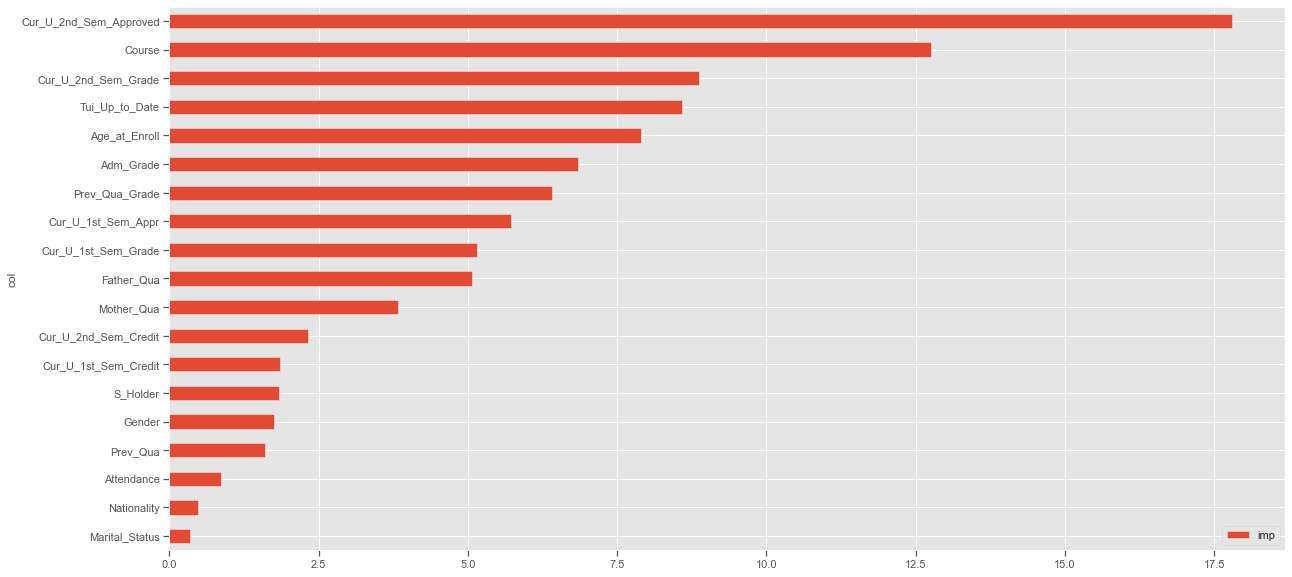

In [142]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

### *Inference*

from the Feature importance plot, we can see the features of the data that are most important or that contribuite more to our machine learing model. 

## Evaluating the Model Performance

Understanding how well a machine learning model will perform is the main purpose behind working with evaluation metrics. Metrics like accuracy, precision, recall will be used to evaluate classification models for our balanced datasets and help it perform better in evaluating the model performance.

In [143]:
 metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9129451347052325
Recall: 0.7827882352941177
F1: 0.8426995341584997


### *Inference*

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all Student that that labeled as Graduated, how many actually Graduated? High precision relates to the low false positive rate. We have got 0.913 precision which is good enough.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the Student that truly are Graduate, how many did we label? We have got recall of 0.782 which is good for this model as it’s above 0.5.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account, F1 is usually more useful than accuracy, especially if you have an uneven class distribution. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.843.

### Saving The Model Using Joblib

Training a machine learning model can take so much time when the  training dataset is very large. This is the reason it is good to train a model and save it to a file so that later on while making predictions you can just load that model from a file and you don't need to train it every time. Joblib seems to fit in that role, Joblib is more efficient with big numpy arrays hence it is preferred when you have many numpy objects involved in your training step.

In [144]:
# importing required libary

import joblib

In [145]:
# saving the catboost model to a file
joblib.dump(catboost_model, "model_joblib.pkl")

['model_joblib.pkl']

In [146]:
# loading the model into a model object mj
mj = joblib.load("model_joblib.pkl")

In [147]:
# using the model object mj to make prediction

mj.predict([[2, 9130, 1, 3, 136.0, 1, 3, 38, 119.8, 1, 1, 0, 18, 10, 12, 11.571429, 0, 6, 12.142857]])

array([0], dtype=int64)

### *Inference*

where 0 stand for Students who will graduate and 1 stands for students who will dropout. we see from the prediction that it gave 0, which predicts student who will graduate based on the information. 